## FEC Campaign Finance: 

### Contributions from committees to candidates & independent expenditures

In [1]:
import pandas as pd
import numpy as np
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from copy import deepcopy
from matplotlib import font_manager as fm, rcParams
from matplotlib.colors import LogNorm
from matplotlib.lines import Line2D
from matplotlib.offsetbox import (
    AnnotationBbox,
    OffsetImage, 
)

%matplotlib inline

In [2]:
year = '2018'

In [3]:
cm = pd.read_csv('data/04aii_pas_cleaned.csv')
cm['cmte_name'].fillna('(cmte_name missing)', inplace = True)
cm.head()

,cmte_id,cmte_name,entity_tp,name,other_id,other_name,transaction_amt,cand_id,cand_name,transaction_dt,...,rpt_tp,image_num,transaction_tp,city,state,zip_code,employer,file_num,memo_cd,cmte_tres
0,C00390633,comm3__SCHOOLSFIRST FEDERAL CREDIT UNION EMPLO...,enttp_Candidate Committee,comm2__PETE AGUILAR FOR CONGRESS (nonaffiliated),C00510461,PETE AGUILAR FOR CONGRESS,2500,H2CA31125,"AGUILAR, PETE",2017-12-18,...,Year end,201801249090614097,Contribution made to nonaffiliated committee,SAN BERNARDINO,CA,92423,NaN,1199694,NaN,CARY DAVIDSON
1,C00392464,comm3__UNIVERSAL MUSIC GROUP PAC,enttp_Candidate Committee,comm2__RATCLIFFE FOR CONGRESS (nonaffiliated),C00554113,RATCLIFFE FOR CONGRESS,500,H4TX04153,"RATCLIFFE, JOHN L",2017-12-12,...,Year end,201801249090614162,Contribution made to nonaffiliated committee,ROCKWALL,TX,75032,NaN,1199696,NaN,CARY DAVIDSON
2,C00392464,comm3__UNIVERSAL MUSIC GROUP PAC,enttp_Candidate Committee,comm2__TED DEUTCH FOR CONGRESS COMMITTEE (nona...,C00469163,TED DEUTCH FOR CONGRESS COMMITTEE,2000,H0FL19080,"DEUTCH, THEODORE ELIOT",2017-12-13,...,Year end,201801249090614162,Contribution made to nonaffiliated committee,WASHINGTON,DC,20036,NaN,1199696,NaN,CARY DAVIDSON
3,C00368993,comm3__WINNING STRATEGIES WASHINGTON PAC,enttp_Candidate Committee,comm2__DONALD M PAYNE JR FOR CONGRESS (nonaffi...,C00519355,DONALD M PAYNE JR FOR CONGRESS,1300,H2NJ10154,"PAYNE, DONALD M., JR.",2017-12-12,...,Year end,201801249090614336,Contribution made to nonaffiliated committee,NEWARK,NJ,07114,NaN,1199704,NaN,MICHAEL MEROLA
4,C00368993,comm3__WINNING STRATEGIES WASHINGTON PAC,enttp_Candidate Committee,comm2__FRIENDS OF DON BEYER (nonaffiliated),C00555888,FRIENDS OF DON BEYER,500,H4VA08224,"BEYER, DONALD STERNOFF HONORABLE JR.",2017-10-31,...,Year end,201801249090614337,Contribution made to nonaffiliated committee,ALEXANDRIA,VA,22314,NaN,1199704,NaN,MICHAEL MEROLA


In [4]:
spent = pd.read_csv('data/04aii_committee_stats.csv')
spent.index = list(spent['cmte_name'].values)

cand = pd.read_csv('data/04aii_cand_cleaned.csv')
cand_dict = dict(zip(cand['cand_id'], cand['cand_name']))
cols = [x for x in list(spent.columns) if x in list(cand_dict.keys())]
cols.extend(['total', 'count', 'distinct', 'entity_tps'])
spent = spent[['cmte_name'] + cols]
print(len(spent))
spent.head(2)

3159


,cmte_name,H0AL02087,H0AL05163,H0AL07086,H0AR01083,H0AR03055,H0AZ01259,H0CA03078,H0CA10073,H0CA10149,...,S8VT00141,S8WA00194,S8WA00319,S8WI00224,S8WV00143,S8WY00189,total,count,distinct,entity_tps
comm3__CONGRESSIONAL LEADERSHIP FUND,comm3__CONGRESSIONAL LEADERSHIP FUND,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,124708177,1211,100,['enttp_Organization (not a committee and not ...
comm3__SMP,comm3__SMP,0,0,0,0,0,0,0,0,0,...,0,0,0,0,8418619,0,107503012,352,20,['enttp_Organization (not a committee and not ...


In [5]:
for col in spent.columns:
    if spent[col].sum() == 0:
        spent.drop([col], axis = 1, inplace = True)
        print(cand_dict[col])

SANDMAN, RAY HENRY JOHN (SKIP)
SCHAUPP, CHARLES EUGENE
GOLDSTEIN, BEVERLY A.
REMMER, LISA
WELLS, LAURA
PETERS, RUDY PETERS
VALIENTE, CHRISTIAN
BARRINGTON, MARK
ARORA, HARRY
ELDER, PATRICK J.
WADKINS, RANDY MACK DR.
MOXLEY, DIANE
MUNIZ, JOHN R
PRINCETON, LLOYD JOSEPH
GAYOT, LUTCHI
PIEGZA, LAWRENCE MARK
DAVIS, ADAM
ELIASON, ERIC R
OH, THOMAS
TYNIO, NATASHA ANYA
COREY, MATTHEW MCKINNON
O''DEAR, CRAIG S
WATERS, MATT
ZUPAN, LAWRENCE


In [6]:
counts = spent.drop([
    'cmte_name', 
    'total', 
    'count', 
    'distinct', 
    'entity_tps',
], axis = 1)

for col in counts.columns:
    counts[col] = [1 if x > 0 else 0 for x in counts[col]]
    
print(len(counts.columns))
counts = counts.sum().sort_values(ascending = False)
counts.index = [cand_dict[x] for x in list(counts.index)]
counts[:20]

809


ROSKAM, PETER             773
HELLER, DEAN              766
HEITKAMP, HEIDI           724
PAULSEN, ERIK MR.         701
DONNELLY, JOSEPH S        672
WALDEN, GREGORY P. MR.    668
STABENOW, DEBBIE          662
CASEY, ROBERT P JR        655
BRADY, KEVIN              628
CURBELO, CARLOS MR.       625
BARRASSO, JOHN A          625
NELSON, BILL              623
DENHAM, JEFF              618
NEAL, RICHARD E MR.       613
MCCARTHY, KEVIN           609
TESTER, JON               604
DAVIS, RODNEY L           589
BROWN, SHERROD            574
YODER, KEVIN              573
WALTERS, MIMI             539
dtype: int64

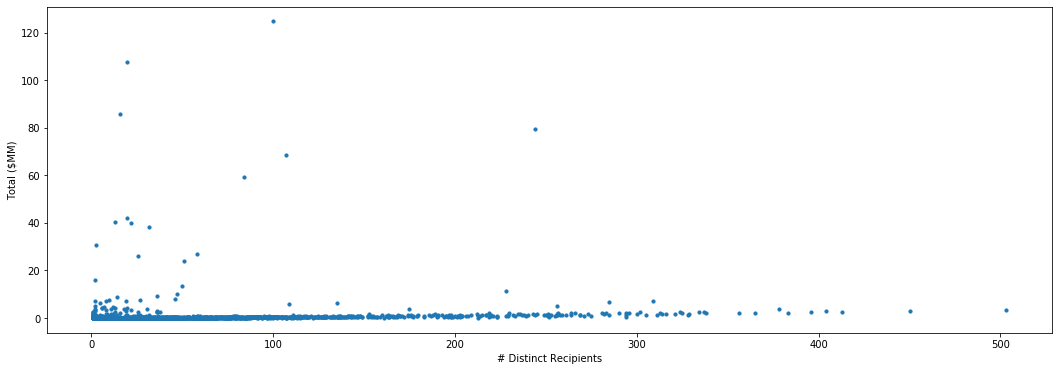

In [7]:
plt.figure(figsize = (18, 6))

plt.scatter(
    spent['distinct'], 
    spent['total']/1.0E6, 
    s = 10,
)
plt.xlabel('# Distinct Recipients')
plt.ylabel('Total ($MM)')
plt.show();

In [8]:
# rows = []
# for comm in list(spent.index):
#     lil_row = []
#     lil_cand = cand[cand[comm] > 0]
#     for which in ['Republican', 'Democrat', 'Third party']:    
#         liller_cand = lil_cand[lil_cand['cand_pty_affiliation'] == which]
#         lil_row.append(liller_cand[comm].sum())
#         lil_row.append(len(liller_cand.drop_duplicates(['cand_id'], keep = 'first')))
#     rows.append(lil_row)
    
# rows = pd.DataFrame(
#     rows, 
#     columns = [
#         'r_amt', 
#         'r_count', 
#         'd_amt', 
#         'd_count',
#         't_amt',
#         't_count',
#     ], 
#     index = list(spent['cmte_name'].values), 
# )

# rows.sort_index(inplace = True)
# rows.head()

In [9]:
# rows.to_csv('data/04bii_rows.csv') # index = True

In [10]:
rows = pd.read_csv('data/04bii_rows.csv')
rows.index = list(rows['Unnamed: 0'])
rows.drop(['Unnamed: 0'], axis = 1, inplace = True)
rows['total'] = rows['r_amt'] + rows['d_amt'] + rows['t_amt']
rows.head()

,r_amt,r_count,d_amt,d_count,t_amt,t_count,total
comm3__(cmte_name missing),2492499.0,251,966413.0,249,4000.0,1,3462912.0
"comm3__1-800 CONTACTS, INC. PAC",22400.0,7,5500.0,6,0.0,0,27900.0
comm3__150PAC.ORG,5000.0,4,12500.0,11,0.0,0,17500.0
comm3__21ST CENTURY MAJORITY FUND,115000.0,16,0.0,0,0.0,0,115000.0
comm3__314 ACTION FUND,522238.0,3,620681.0,24,0.0,0,1142919.0


In [11]:
cm.loc[cm['cmte_name'] == 'comm3__(cmte_name missing)', 'name'].value_counts()

comm2__BALDERSON FOR CONGRESS (nonaffiliated)                    16
comm2__DONNELLY FOR INDIANA (nonaffiliated)                      14
comm2__CULBERSON FOR CONGRESS (nonaffiliated)                    13
comm2__BILL NELSON FOR U S SENATE (nonaffiliated)                13
comm2__MARTHA ROBY FOR CONGRESS (nonaffiliated)                  13
                                                                 ..
comm2__SCHAKOWSKY FOR CONGRESS (nonaffiliated)                    1
comm2__WILLIAM TIMMONS FOR CONGRESS (nonaffiliated)               1
comm2__comm2__MIKIE SHERRILL FOR CONGRESS (in-kind) (in-kind)     1
comm2__NAPOLITANO FOR CONGRESS (nonaffiliated)                    1
comm2__comm2__AMY MCGRATH FOR CONGRESS (in-kind) (in-kind)        1
Name: name, Length: 633, dtype: int64

In [12]:
cm.loc[cm['name'] == 'comm2__BALDERSON FOR CONGRESS (nonaffiliated)', 'cmte_name'].value_counts().head()

comm3__(cmte_name missing)                                 16
comm3__SHEET METAL AND AIR CONDITIONING CONTRACTORS PAC     8
comm3__KEYCORP ADVOCATES FUND                               7
comm3__KPMG PARTNERS/PRINCIPALS AND EMPLOYEES PAC           7
comm3__HUNTINGTON BANCSHARES INC. PAC  (HBI-PAC)            6
Name: cmte_name, dtype: int64

In [13]:
cm.loc[cm['name'] == 'comm2__DONNELLY FOR INDIANA (nonaffiliated)', 'cmte_name'].value_counts().head()

comm3__(cmte_name missing)                                                              14
comm3__LOCKHEED MARTIN CORP EMPLOYEES' PAC                                               8
comm3__INTERNATIONAL ASSOCIATION OF HEAT AND FROST INSULATORS AND ALLIED WORKERS PAC     8
comm3__KPMG PARTNERS/PRINCIPALS AND EMPLOYEES PAC                                        8
comm3__IT STARTS TODAY                                                                   7
Name: cmte_name, dtype: int64

In [14]:
cm.loc[cm['name'] == 'comm2__MONTANANS FOR TESTER (nonaffiliated)', 'cmte_name'].value_counts().head()

comm3__COUNCIL FOR A LIVABLE WORLD CANDIDATE FUND                                                    71
comm3__(cmte_name missing)                                                                           13
comm3__NATIONAL ACTIVE AND RETIRED FEDERAL EMPLOYEES ASSOCIATION POLITICAL ACTION COM (NARFE-PAC)     8
comm3__ALTRIA GROUP, INC. PAC (ALTRIAPAC)                                                             8
comm3__LOCKHEED MARTIN CORP EMPLOYEES' PAC                                                            8
Name: cmte_name, dtype: int64

In [15]:
cm.loc[cm['name'] == 'comm2__DENHAM FOR CONGRESS (nonaffiliated)', 'cmte_name'].value_counts().head()

comm3__(cmte_name missing)                                                               13
comm3__NATIONAL ASSOCIATION OF INSURANCE AND FINANCIAL ADVISORS POLITICAL ACTION COMM    11
comm3__REPUBLICAN MAINSTREET PARTNERSHIP PAC                                              9
comm3__GENERAL ELECTRIC COMPANY PAC (GEPAC)                                               8
comm3__NATIONAL AIR TRAFFIC CONTROLLERS ASSOCIATION PAC                                   8
Name: cmte_name, dtype: int64

In [16]:
rows[(rows['r_amt'] != 0) & (rows['d_amt'] != 0)].sort_values(['total'], ascending = False)

,r_amt,r_count,d_amt,d_count,t_amt,t_count,total
comm3__CONGRESSIONAL LEADERSHIP FUND,14535986.0,49,110172191.0,51,0.0,0,124708177.0
comm3__SMP,89548284.0,11,17954728.0,9,0.0,0,107503012.0
comm3__SENATE LEADERSHIP FUND,8329075.0,7,77462802.0,9,0.0,0,85791877.0
comm3__DCCC,61312298.0,55,18057222.0,189,0.0,0,79369520.0
comm3__NRCC,7024351.0,71,61538949.0,36,0.0,0,68563300.0
...,...,...,...,...,...,...,...
comm3__HEALTH EDUCATION AND LEARNING PAC (HEALPAC)-FEDERAL,1800.0,5,100.0,1,0.0,0,1900.0
comm3__VISION BLUE PAC,720.0,1,139.0,1,0.0,0,859.0
comm3__PLANNED PARENTHOOD OF MN ACTION FUND,201.0,2,201.0,2,0.0,0,402.0
comm3__DEFEND OUR PARKS,50.0,1,280.0,4,0.0,0,330.0


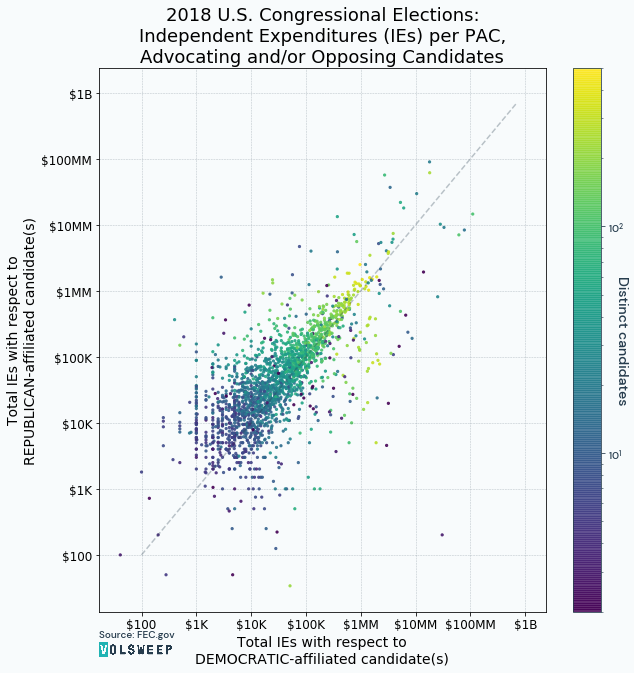

In [17]:
vol_light = '#f8fbfc'
vol_dark = '#263C4D'

fig = plt.figure(figsize = (10, 10))

# face/axis colors
fig.patch.set_facecolor(vol_light)
ax = fig.add_subplot(111)
ax.patch.set_facecolor(vol_light)

vol_dark_rcparams = [
    'patch.edgecolor',
    'grid.color',
    'text.color',
    'axes.labelcolor',
    'xtick.color',
    'ytick.color',
    'axes.edgecolor'
]

for which in vol_dark_rcparams:
    plt.rcParams[which] = vol_dark

font_dirs = ['../../css/fonts/for_matplotlib/', ]
font_files = fm.findSystemFonts(fontpaths=font_dirs)
font_list = fm.createFontList(font_files)
fm.fontManager.ttflist.extend(font_list)

plt.rcParams['font.family'] = 'DM Sans Medium'  

for i in range(2, 10):
    plt.axvline(i, color = vol_dark, alpha = 0.3, ls = '--', lw = 0.5)
    plt.axhline(i, color = vol_dark, alpha = 0.3, ls = '--', lw = 0.5)

sc = plt.scatter(
    np.log10(rows['d_amt']),
    np.log10(rows['r_amt']),
    alpha = 0.85,
    s = 5,
    c = rows['r_count'] + rows['d_count'],
    norm = LogNorm(),
)

cb = plt.colorbar(sc)
cb.ax.set_ylabel(
    'Distinct candidates', 
    fontsize = 14, 
    rotation = 270, 
    x = 0.05,
)

max_amt = max(rows['d_amt'].max(), rows['r_amt'].max())

plt.title(f'{year} U.S. Congressional Elections:\nIndependent Expenditures (IEs) per PAC,\nAdvocating and/or Opposing Candidates', fontsize = 18)
plt.xlabel('Total IEs with respect to\nDEMOCRATIC-affiliated candidate(s)', fontsize = 14)
locs = range(2, int(np.log10(max_amt)) + 10)
vals = ['${:,}'.format(10**x) for x in locs]
vals = [x.replace(',000,000,000', '')+'B' if (',000,000,000' in x) else x for x in vals]
vals = [x.replace(',000,000', '')+'MM' if (',000,000' in x) else x for x in vals]
vals = [x.replace(',000', '')+'K' if (',000' in x) else x for x in vals]
plt.xticks(locs, vals, fontsize = 12)
plt.ylabel('Total IEs with respect to\nREPUBLICAN-affiliated candidate(s)', fontsize = 14)
plt.yticks(locs,vals, fontsize = 12)

plt.plot(
    [2, 1.1*np.log10(max_amt)], 
    [2, 1.1*np.log10(max_amt)], 
    ls = '--', 
    alpha = 0.3, 
    color = vol_dark,
)
    
x = ax.annotate('Source: FEC.gov', 
                xy=(0.0, 0.0), 
                xytext=(38.0, -28.0), 
                ha='center', 
                va='bottom', 
                textcoords='axes pixels', 
                xycoords='axes pixels',
               )
# logo
arr_img = plt.imread('../../assets/VOL_Logo_Color_Light_Green.png')
imagebox = OffsetImage(arr_img, zoom=0.07)
imagebox.image.axes = ax
xy = (0.0, -45.0)
ab = AnnotationBbox(imagebox, 
                    xy,
                    xybox=(xy[0], xy[1]),
                    xycoords='axes pixels',
                    boxcoords=('axes pixels'),
                    box_alignment=(0., 0.),
                    frameon=False,
                   )
ax.add_artist(ab)
plt.show();

In [18]:
rows[rows['total'] > 10.0E6].sort_values(['total'], ascending = False)

,r_amt,r_count,d_amt,d_count,t_amt,t_count,total
comm3__CONGRESSIONAL LEADERSHIP FUND,14535986.0,49,110172191.0,51,0.0,0,124708177.0
comm3__SMP,89548284.0,11,17954728.0,9,0.0,0,107503012.0
comm3__SENATE LEADERSHIP FUND,8329075.0,7,77462802.0,9,0.0,0,85791877.0
comm3__DCCC,61312298.0,55,18057222.0,189,0.0,0,79369520.0
comm3__NRCC,7024351.0,71,61538949.0,36,0.0,0,68563300.0
comm3__HOUSE MAJORITY PAC,56660337.0,66,2719778.0,18,0.0,0,59380115.0
comm3__NRSC,9125397.0,12,32925459.0,8,0.0,0,42050856.0
comm3__MAJORITY FORWARD,36848588.0,9,3424644.0,4,0.0,0,40273232.0
comm3__DSCC,29621146.0,7,10452088.0,15,0.0,0,40073234.0
comm3__INDEPENDENCE USA PAC,10201038.0,10,28183006.0,22,0.0,0,38384044.0


In [19]:
spentest = pd.concat([spent, rows.drop(['total'], axis = 1)], axis = 1)
spentest['cmte_name'] = [x.replace('comm3__', '') for x in spentest['cmte_name']]
spentest.reset_index(drop = True, inplace = True)
spentest['r_amt:total'] = spentest['r_amt']/(spentest['r_amt'] + spentest['d_amt'])
spentest['r_count:total'] = spentest['r_count']/(spentest['r_count'] + spentest['d_count'])
print(len(spentest))
spentest.head()

3159


,cmte_name,H0AL02087,H0AL05163,H0AL07086,H0AR01083,H0AR03055,H0AZ01259,H0CA03078,H0CA10073,H0CA10149,...,distinct,entity_tps,r_amt,r_count,d_amt,d_count,t_amt,t_count,r_amt:total,r_count:total
0,(cmte_name missing),21000,5700,500,0,7000,2000,0,1000,0,...,503,"[nan, 'enttp_Candidate', 'enttp_Organization (...",2492499.0,251.0,966413.0,249.0,4000.0,1.0,0.720602,0.502000
1,"1-800 CONTACTS, INC. PAC",0,0,0,0,0,0,0,0,0,...,13,"['enttp_Candidate Committee', 'enttp_Political...",22400.0,7.0,5500.0,6.0,0.0,0.0,0.802867,0.538462
2,150PAC.ORG,0,0,0,0,0,0,0,0,0,...,15,['enttp_Candidate Committee'],5000.0,4.0,12500.0,11.0,0.0,0.0,0.285714,0.266667
3,21ST CENTURY MAJORITY FUND,0,0,0,0,0,0,0,0,0,...,17,['enttp_Organization (not a committee and not ...,115000.0,16.0,0.0,0.0,0.0,0.0,1.000000,1.000000
4,314 ACTION FUND,0,0,0,0,0,0,6000,0,0,...,27,['enttp_Organization (not a committee and not ...,522238.0,3.0,620681.0,24.0,0.0,0.0,0.456934,0.111111


In [20]:
spentest.to_csv('data/04bii_committee3_stats.csv', index = False)

In [21]:
# get subset of column names containing 'comm3__'
comms = [x for x in cand.columns if 'comm3__' in x]

# remove the 'comm3__'
comms = [x.replace('comm3__', '') for x in comms]

# keep committee columns that appear in 'name' column
comms = [x for x in comms if x in list(spentest['cmte_name'])]

# add the 'comm3__' back on
comms = sorted(['comm3__' + x for x in comms])

# get the non-'comm3__' columns
notcomm_cols = [x for x in cand.columns if 'comm3__' not in x]

# non-'comm3__' dataframe subset
cand_notcomm = cand[notcomm_cols]

# concatenate 'comm3__' and non-'comm3__' dataframes
cand = pd.concat([cand_notcomm, cand[comms]], axis = 1)

cand.head(2)

,cand_id,cand_name,cand_ici,cand_pty_affiliation,ttl_receipts,trans_from_auth,ttl_disb,trans_to_auth,coh_bop,coh_cop,...,comm3__YRC WORLDWIDE INC. PAC,comm3__YUM BRANDS INC. GOOD GOVERNMENT FUND,comm3__ZACHRY CORP PAC (ZACOPAC),"comm3__ZB, N.A. DBA AMEGY BANK PAC",comm3__ZENECA. INC. PAC (AZMEDIPAC),"comm3__ZIMMER BIOMET HOLDINGS, INC. PAC (A.K.A. 'ZIMMER BIOMET PAC')",comm3__ZIONS BANCORP PAC,comm3__ZOETIS GOOD GOVERNMENT FUND,comm3__ZUFFA POLITICAL ACTION COMMMITTEE,"comm3__ZURICH HOLDING COMPANY OF AMERICA, INC. COMMITTEE FOR GOOD GOVERNMENT (Z-PAC)"
0,H0AL02087,"ROBY, MARTHA",I,Republican,2573681.12,85734.19,2277448.83,0.0,45450.72,341683.01,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,H0AL05163,"BROOKS, MO",I,Republican,1527246.16,0.00,2006001.97,0.0,1170937.70,692181.51,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
for which in [0, 1]:
    print('proportion w respect to R:', which, '\n')
    those = spentest.loc[spentest['r_amt:total'] == which, ['cmte_name', 'total']].sort_values(['total'], ascending = False)
    print(those)
    print('\n')

proportion w respect to R: 0 

                                      cmte_name    total
1223                                   FUTURE45  6129281
461          BLACK PROGRESSIVE ACTION COALITION  4231582
460                                   BLACK PAC  2369704
1852                     MISSOURI RISING ACTION  2331073
2572                         SENATE REFORM FUND  2143884
...                                         ...      ...
326                           ARAB AMERICAN PAC      553
1606                               KIDS GO BLUE      456
2107  NORTH CAROLINA DEMOCRATIC PARTY - FEDERAL      451
1057                    ENVIRONMENT AMERICA INC      396
948                  DIGNITY CA SEIU LOCAL 2015      210

[573 rows x 2 columns]


proportion w respect to R: 1 

                                 cmte_name    total
2570             SENATE CONSERVATIVES FUND  2708470
1388                    HOUSE FREEDOM FUND  2385622
646                   CFG ACTION WISCONSIN  2384294
1736        MAJORITY

In [23]:
cm['plain name'] = [x.split('(')[0].split('__')[1] for x in cm['name']]

for big in list(cm['plain name'].value_counts().index):
    lines = cm[cm['name'].apply(lambda x: big in x)]
    big_total = lines['transaction_amt'].sum()
    
    all_ = []
    allnames = list(set(lines['cmte_name']))
    for line in allnames:
        sum_ = lines.loc[lines['cmte_name'] == line, 'transaction_amt'].sum()
        name = line.replace('comm3__', '')
        all_.append((name, sum_))
        
    dflet = pd.DataFrame(all_)
    dflet.columns = ['name', 'total']
    dflet.sort_values(['total'], ascending = False, inplace = True)
    if dflet['total'].sum() > 1.0E5:
        dflet = dflet[dflet['total'] >= 1.0E4]
        dflet.sort_values(['total', 'name'], ascending = [False, True], inplace = True)
        dflet.reset_index(drop = True, inplace = True)
        dflet['total'] = ['${:,}'.format(x) for x in dflet['total']]
        print(big.replace('comm1__', '').replace('comm2__', '').split(' (')[0])
        print('${:,}'.format(int(big_total)))
        print('\n')
        print(dflet.to_csv(None))
        print('\n\n\n')

comm2
$448,207,367


,name,total
0,(cmte_name missing),"$3,447,168"
1,NATIONAL ASSOCIATION OF REALTORS PAC,"$3,129,440"
2,NATIONAL BEER WHOLESALERS ASSOCIATION PAC,"$3,032,000"
3,AT&T INC. FEDERAL PAC (AT&T FEDERAL PAC),"$2,550,500"
4,NATIONAL AUTOMOBILE DEALERS ASSOCIATION PAC,"$2,452,400"
5,AMERICAN BANKERS ASSOCIATION PAC (BANKPAC),"$2,427,330"
6,NATIONAL AIR TRAFFIC CONTROLLERS ASSOCIATION PAC,"$2,426,000"
7,HONEYWELL INTERNATIONAL PAC,"$2,412,395"
8,CULAC THE PAC OF CREDIT UNION NATIONAL ASSOCIATION,"$2,339,000"
9,INTERNATIONAL BROTHERHOOD OF ELECTRICAL WORKERS PAC,"$2,292,100"
10,AMERICAN CRYSTAL SUGAR COMPANY PAC,"$2,264,000"
11,MAJORITY COMMITTEE PAC--MC PAC,"$2,202,763"
12,LOCKHEED MARTIN CORP EMPLOYEES' PAC,"$2,198,500"
13,THE BOEING COMPANY PAC,"$2,192,499"
14,DELOITTE PAC,"$2,170,000"
15,AMERICAN ASSOCIATION FOR JUSTICE PAC (AAJ PAC),"$2,155,500"
16,UNITED PARCEL SERVICE INC. PAC,"$2,138,855"
17,AMERICAN FEDERATION OF STATE COUNTY AND MUNICIPAL EMPLOYEES  P E O P L E,"$2,13

FACEBOOK 
$4,429,610


,name,total
0,MOVEON.ORG POLITICAL ACTION,"$2,676,834"
1,DCCC,"$306,808"
2,FREEDOMWORKS FOR AMERICA,"$242,000"
3,WOMEN SPEAK OUT PAC,"$170,910"
4,SMP,"$103,449"
5,CALIFORNIA 2020,"$78,184"
6,PRIORITIES USA ACTION,"$73,320"
7,MOMSRISING TOGETHER,"$55,940"
8,POWERPACPLUS,"$51,571"
9,FAITH FAMILY FREEDOM FUND,"$45,314"
10,FOR OUR FUTURE,"$44,418"
11,CASA IN ACTION PAC,"$37,010"
12,L PAC,"$35,049"
13,PACTION,"$28,417"
14,WORKING AMERICA,"$27,742"
15,NATIONAL ASSOCIATION FOR GUN RIGHTS INC PAC,"$26,701"
16,NARAL PRO-CHOICE AMERICA,"$26,510"
17,PATAGONIA INC.,"$26,346"
18,ELEVATE OHIO,"$24,586"
19,ACRONYM,"$24,201"
20,PROTECT OUR WINTERS ACTION FUND,"$22,137"
21,AMERICAN FEDERATION OF STATE COUNTY AND MUNICIPAL EMPLOYEES AFL-CIO,"$20,433"
22,COMMON DEFENSE / BEYOND THE CHOIR ACTION FUND,"$20,180"
23,SUSAN B ANTHONY LIST INC,"$17,909"
24,RIGHT NOW USA,"$17,500"
25,DEFENDING MAIN STREET SUPERPAC INC.,"$15,300"
26,SEIU COPE (SERVICE EMPLOYEES INTERNATIONAL UNION COMMITTEE

ROSKAM FOR CONGRESS COMMITTEE 
$2,842,718


,name,total
0,(cmte_name missing),"$17,500"
1,REPUBLICAN JEWISH COALITION-PAC (RJC-PAC),"$10,856"
2,ABBOTT LABORATORIES EMPLOYEE PAC,"$10,000"
3,ABBVIE PAC,"$10,000"
4,AFLAC PAC (AFLAC PAC),"$10,000"
5,ALLIANCE DATA SYSTEMS CORP - EPSILON DATA MANAGEMENT LLC PAC,"$10,000"
6,ALLSTATE INSURANCE COMPANY PAC,"$10,000"
7,"AMEDISYS, INC. PAC","$10,000"
8,AMERICAN ACADEMY OF OPHTHALMOLOGY INC POLITICAL COMMITTEE (OPHTHPAC),"$10,000"
9,AMERICAN BANKERS ASSOCIATION PAC (BANKPAC),"$10,000"
10,AMERICAN COLLEGE OF RADIOLOGY ASSOCIATION PAC,"$10,000"
11,AMERICAN COUNCIL OF LIFE INSURERS PAC,"$10,000"
12,AMERICAN DENTAL ASSOCIATION PAC,"$10,000"
13,AMERICAN EXPRESS COMPANY PAC (AXPPAC),"$10,000"
14,AMERICAN HEALTH CARE ASSOCIATION PAC,"$10,000"
15,AMERICAN HOSPITAL ASSOCIATION PAC,"$10,000"
16,AMERICAN INSTITUTE OF CERTIFIED PUBLIC ACCOUNTANTS PAC,"$10,000"
17,AMERICAN LAND TITLE ASSOCIATION TITLE INDUSTRY PAC (TIPAC),"$10,000"
18,AMERICAN MEDICAL ASSOCIAT

HEIDI FOR SENATE 
$2,820,591


,name,total
0,WOMENCOUNT PAC,"$13,720"
1,DEMOCRATS FOR OPPORTUNITY FUND,"$13,500"
2,OCCIDENTAL PETROLEUM CORP PAC,"$11,500"
3,A NEW DIRECTION PAC,"$10,000"
4,ALL FOR OUR COUNTRY LEADERSHIP PAC,"$10,000"
5,ALLY FINANCIAL INC. ADVOCACY PAC,"$10,000"
6,"ALTRIA GROUP, INC. PAC (ALTRIAPAC)","$10,000"
7,AMERICAN ASSOCIATION FOR JUSTICE PAC (AAJ PAC),"$10,000"
8,AMERICAN BANKERS ASSOCIATION PAC (BANKPAC),"$10,000"
9,AMERICAN CRYSTAL SUGAR COMPANY PAC,"$10,000"
10,AMERICAN FEDERATION OF STATE COUNTY AND MUNICIPAL EMPLOYEES  P E O P L E,"$10,000"
11,"AMERICAN FEDERATION OF TEACHERS, AFL-CIO COMMITTEE ON POLITICAL EDUCATION","$10,000"
12,AMERICAN HEALTH CARE ASSOCIATION PAC,"$10,000"
13,AMERICAN INSTITUTE OF CERTIFIED PUBLIC ACCOUNTANTS PAC,"$10,000"
14,AMERICAN POSTAL WORKERS UNION COMMITTEE ON POLITICAL ACTION,"$10,000"
15,ANDEAVOR LLC PAC,"$10,000"
16,BUILD PAC OF THE NATIONAL ASSOCIATION OF HOME BUILDERS (BUILDPAC),"$10,000"
17,CARPENTERS LEGISLATIVE IMPROVEMEN

DONNELLY FOR INDIANA 
$2,561,344


,name,total
0,DSCC,"$47,400"
1,(cmte_name missing),"$23,000"
2,DEMOCRATS FOR OPPORTUNITY FUND,"$13,500"
3,FORD MOTOR COMPANY CIVIC ACTION FUND,"$12,500"
4,NORFOLK SOUTHERN CORP GOOD GOVERNMENT FUND,"$12,500"
5,A NEW DIRECTION PAC,"$10,000"
6,ALL AMERICA PAC,"$10,000"
7,ALL FOR OUR COUNTRY LEADERSHIP PAC,"$10,000"
8,AMALGAMATED TRANSIT UNION - COPE,"$10,000"
9,AMERICAN BANKERS ASSOCIATION PAC (BANKPAC),"$10,000"
10,AMERICAN FEDERATION OF GOVT. EMPL. PAC,"$10,000"
11,"AMERICAN FEDERATION OF TEACHERS, AFL-CIO COMMITTEE ON POLITICAL EDUCATION","$10,000"
12,AMERICAN HEALTH CARE ASSOCIATION PAC,"$10,000"
13,AMERICAN HOSPITAL ASSOCIATION PAC,"$10,000"
14,AMERICAN POSTAL WORKERS UNION COMMITTEE ON POLITICAL ACTION,"$10,000"
15,AMERIPAC: THE FUND FOR A GREATER AMERICA,"$10,000"
16,BRYAN CAVE LLP PAC,"$10,000"
17,CALUMET PAC,"$10,000"
18,COMCAST CORP AND NBCUNIVERSAL PAC - FEDERAL,"$10,000"
19,COMMON GROUND PAC,"$10,000"
20,COMMON SENSE COLORADO,"$10,000"
21,CO

STABENOW FOR US SENATE 
$2,497,782


,name,total
0,DSCC,"$47,400"
1,(cmte_name missing),"$12,089"
2,EMILY'S LIST,"$10,020"
3,AETNA INC. PAC,"$10,000"
4,ALL FOR OUR COUNTRY LEADERSHIP PAC,"$10,000"
5,"AMAZON.COM SERVICES, INC. SEPARATE SEGREGATED FUND (AMAZON PAC)","$10,000"
6,AMERICAN ASSOCIATION FOR JUSTICE PAC (AAJ PAC),"$10,000"
7,AMERICAN CRYSTAL SUGAR COMPANY PAC,"$10,000"
8,AMERICAN FEDERATION OF GOVT. EMPL. PAC,"$10,000"
9,AMERICAN FEDERATION OF STATE COUNTY AND MUNICIPAL EMPLOYEES  P E O P L E,"$10,000"
10,AMERICAN HEALTH CARE ASSOCIATION PAC,"$10,000"
11,AMERICAN OPTOMETRIC ASSOCIATION PAC,"$10,000"
12,AMERICAN PHYSICAL THERAPY ASSOCIATION PHYSICAL THERAPY PAC (PT-PAC),"$10,000"
13,AMERICAN POSTAL WORKERS UNION COMMITTEE ON POLITICAL ACTION,"$10,000"
14,CARPENTERS LEGISLATIVE IMPROVEMENT COMMITTEE UNITED BROTHERHOOD OF CARPENTERS AND JOINERS,"$10,000"
15,COMCAST CORP AND NBCUNIVERSAL PAC - FEDERAL,"$10,000"
16,COMMON GROUND PAC,"$10,000"
17,COMMON SENSE COLORADO,"$10,000"
18,C

DENHAM FOR CONGRESS 
$2,475,543


,name,total
0,(cmte_name missing),"$17,115"
1,BILL PAC,"$11,000"
2,AECOM PAC,"$10,000"
3,AIR LINE PILOTS ASSOCIATION PAC,"$10,000"
4,"AMAZON.COM SERVICES, INC. SEPARATE SEGREGATED FUND (AMAZON PAC)","$10,000"
5,AMERICAN BANKERS ASSOCIATION PAC (BANKPAC),"$10,000"
6,AMERICAN COUNCIL OF ENGINEERING COMPANIES (ACEC/PAC),"$10,000"
7,AMERICAN CRYSTAL SUGAR COMPANY PAC,"$10,000"
8,AMERICAN SOCIETY OF ANESTHESIOLOGISTS PAC (ASA PAC),"$10,000"
9,AMGEN INC. PAC,"$10,000"
10,ASSOCIATED GENERAL CONTRACTORS OF AMERICA PAC,"$10,000"
11,AT&T INC. FEDERAL PAC (AT&T FEDERAL PAC),"$10,000"
12,AUTOMOTIVE FREE INTERNATIONAL TRADE PAC,"$10,000"
13,BLUE DIAMOND GROWERS PAC,"$10,000"
14,BNSF RAILWAY COMPANY RAILPAC (BNSF RAILPAC),"$10,000"
15,BUILD PAC OF THE NATIONAL ASSOCIATION OF HOME BUILDERS (BUILDPAC),"$10,000"
16,BUILDING AMERICA'S REPUBLICAN REPRESENTATION PAC,"$10,000"
17,CALIFORNIA DAIRIES FEDERAL PAC,"$10,000"
18,CALIFORNIA FARM BUREAU FEDERATION FUND TO PROTECT 

FRIENDS OF JOHN BARRASSO 
$2,649,320


,name,total
0,ANDEAVOR LLC PAC,"$13,000"
1,NATIONAL ASSOCIATION OF REALTORS PAC,"$12,500"
2,21ST CENTURY MAJORITY FUND,"$10,000"
3,ABBOTT LABORATORIES EMPLOYEE PAC,"$10,000"
4,AECOM PAC,"$10,000"
5,ALAMO PAC,"$10,000"
6,"AMAZON.COM SERVICES, INC. SEPARATE SEGREGATED FUND (AMAZON PAC)","$10,000"
7,AMERICAN ASSOCIATION OF ORTHODONTISTS PAC,"$10,000"
8,AMERICAN COLLEGE OF RHEUMATOLOGY (RHEUMPAC),"$10,000"
9,AMERICAN CRYSTAL SUGAR COMPANY PAC,"$10,000"
10,AMERICAN HOTEL AND LODGING ASSOCIATION PAC ('HOTELPAC'),"$10,000"
11,AMERICAN MEDICAL ASSOCIATION PAC,"$10,000"
12,AMERICAN PISTACHIO GROWERS PISTACHIO PAC,"$10,000"
13,ASSOCIATION OF EQUIPMENT MANUFACTURERS PAC,"$10,000"
14,AUTOMOTIVE FREE INTERNATIONAL TRADE PAC,"$10,000"
15,BASF CORP EMPLOYEES PAC,"$10,000"
16,BLACK HILLS CORP PAC,"$10,000"
17,BLUEGRASS COMMITTEE,"$10,000"
18,BORDER HEALTH FEDERAL PAC,"$10,000"
19,BUILD PAC OF THE NATIONAL ASSOCIATION OF HOME BUILDERS (BUILDPAC),"$10,000"
20,CALIF

BRADY FOR CONGRESS 
$3,003,750


,name,total
0,THE COCA-COLA COMPANY NONPARTISAN COMMITTEE FOR GOOD GOVERNMENT,"$20,000"
1,ABBOTT LABORATORIES EMPLOYEE PAC,"$10,000"
2,ABBVIE PAC,"$10,000"
3,AFLAC PAC (AFLAC PAC),"$10,000"
4,"ALLERGAN, INC. PAC","$10,000"
5,"ALTRIA GROUP, INC. PAC (ALTRIAPAC)","$10,000"
6,AMERICAN ACADEMY OF DERMATOLOGY ASSOCIATION PAC (SKINPAC),"$10,000"
7,AMERICAN ACADEMY OF OPHTHALMOLOGY INC POLITICAL COMMITTEE (OPHTHPAC),"$10,000"
8,AMERICAN ASSOCIATION OF NEUROLOGICAL SURGEONS PAC (NEUROSURGERYPAC),"$10,000"
9,AMERICAN ASSOCIATION OF ORTHODONTISTS PAC,"$10,000"
10,AMERICAN BANKERS ASSOCIATION PAC (BANKPAC),"$10,000"
11,AMERICAN COLLEGE OF RADIOLOGY ASSOCIATION PAC,"$10,000"
12,AMERICAN COLLEGE OF SURGEONS PROFESSIONAL ASSOCIATION PAC,"$10,000"
13,AMERICAN COUNCIL OF LIFE INSURERS PAC,"$10,000"
14,AMERICAN DENTAL ASSOCIATION PAC,"$10,000"
15,AMERICAN HOSPITAL ASSOCIATION PAC,"$10,000"
16,AMERICAN HOTEL AND LODGING ASSOCIATION PAC ('HOTELPAC'),"$10,000"
17,AMERICAN 

WICKER FOR SENATE 
$2,230,158


,name,total
0,WICKER VICTORY COMMITTEE,"$61,095"
1,21ST CENTURY MAJORITY FUND,"$10,000"
2,ALAMO PAC,"$10,000"
3,AMERICAN HOTEL AND LODGING ASSOCIATION PAC ('HOTELPAC'),"$10,000"
4,AMERICAN PISTACHIO GROWERS PISTACHIO PAC,"$10,000"
5,ARKANSAS FOR LEADERSHIP PAC (ARKPAC),"$10,000"
6,ASSOCIATED BUILDERS AND CONTRACTORS PAC (ABC PAC),"$10,000"
7,AUTOMOTIVE FREE INTERNATIONAL TRADE PAC,"$10,000"
8,BI-COUNTY PAC,"$10,000"
9,"BLESSEY MARINE SERVICE, INC. PAC","$10,000"
10,BLUEGRASS COMMITTEE,"$10,000"
11,BNSF RAILWAY COMPANY RAILPAC (BNSF RAILPAC),"$10,000"
12,CITIZENS FOR PROSPERITY IN AMERICA TODAY PAC,"$10,000"
13,COMCAST CORP AND NBCUNIVERSAL PAC - FEDERAL,"$10,000"
14,CONTINUING AMERICA'S STRENGTH AND SECURITY PAC,"$10,000"
15,DAKOTA PAC,"$10,000"
16,DAVITA INC. PAC (DAPAC),"$10,000"
17,DEERE AND COMPANY PAC (AKA JOHN DEERE PAC),"$10,000"
18,DEFEND AMERICA PAC,"$10,000"
19,DENALI LEADERSHIP PAC,"$10,000"
20,DIRIGO PAC,"$10,000"
21,ENTERGY CORP PAC (ENPAC),

ANDY BARR FOR CONGRESS 
$2,010,297


,name,total
0,PAC OF THE AMERICAN ASSOCIATION OF ORTHOPAEDIC SURGEONS--PAC OF AAOS,"$12,500"
1,(cmte_name missing),"$10,000"
2,ALLY FINANCIAL INC. ADVOCACY PAC,"$10,000"
3,AMERICAN BANKERS ASSOCIATION PAC (BANKPAC),"$10,000"
4,AMERICAN COLLEGE OF RADIOLOGY ASSOCIATION PAC,"$10,000"
5,AMERICAN COUNCIL OF LIFE INSURERS PAC,"$10,000"
6,AMERICAN FINANCIAL SERVICES ASSOCIATION PAC,"$10,000"
7,AMERICAN INSTITUTE OF CERTIFIED PUBLIC ACCOUNTANTS PAC,"$10,000"
8,AMERICAN LAND TITLE ASSOCIATION TITLE INDUSTRY PAC (TIPAC),"$10,000"
9,AMERICAN RESORT DEVELOPMENT ASSOCIATION RESORT OWNERS COALITION PAC (ARDA-ROC PAC),"$10,000"
10,AMERICAN SOCIETY OF ANESTHESIOLOGISTS PAC (ASA PAC),"$10,000"
11,ASSOCIATION OF KENTUCKY FRIED CHICKEN FRANCHISEES INC PAC,"$10,000"
12,AUTOMOTIVE FREE INTERNATIONAL TRADE PAC,"$10,000"
13,BANK OF AMERICA CORP FEDERAL PAC,"$10,000"
14,BLUEGRASS COMMITTEE,"$10,000"
15,BROWN-FORMAN CORP NON-PARTISAN COMMITTEE FOR RESPONSIBLE GOVERNMENT,"$

CATHY MCMORRIS RODGERS FOR CONGRESS 
$2,032,504


,name,total
0,AMERICAN DENTAL ASSOCIATION PAC,"$15,000"
1,(cmte_name missing),"$13,000"
2,ABBVIE PAC,"$10,000"
3,AECOM PAC,"$10,000"
4,"AMAZON.COM SERVICES, INC. SEPARATE SEGREGATED FUND (AMAZON PAC)","$10,000"
5,AMERICAN BANKERS ASSOCIATION PAC (BANKPAC),"$10,000"
6,AMERICAN CABLE ASSOCIATION INC PAC (ACA PAC),"$10,000"
7,AMERICAN COLLEGE OF RADIOLOGY ASSOCIATION PAC,"$10,000"
8,AMERICAN CRYSTAL SUGAR COMPANY PAC,"$10,000"
9,AMERICAN FOREST AND PAPER ASSOCIATION PAC,"$10,000"
10,AMERICAN HOTEL AND LODGING ASSOCIATION PAC ('HOTELPAC'),"$10,000"
11,AMERICAN INSTITUTE OF CERTIFIED PUBLIC ACCOUNTANTS PAC,"$10,000"
12,AMERICAN MEDICAL ASSOCIATION PAC,"$10,000"
13,AMERICAN OSTEOPATHIC INFORMATION ASSOCIATION - OSTEOPATHIC PAC,"$10,000"
14,ASSOCIATED BUILDERS AND CONTRACTORS PAC (ABC PAC),"$10,000"
15,ASSOCIATED GENERAL CONTRACTORS OF AMERICA PAC,"$10,000"
16,AT&T INC. FEDERAL PAC (AT&T FEDERAL PAC),"$10,000"
17,AUTOMOTIVE FREE INTERNATIONAL 

MANCHIN FOR WEST VIRGINIA 
$2,178,441


,name,total
0,NORPAC,"$29,900"
1,DEMOCRATS FOR OPPORTUNITY FUND,"$13,500"
2,A NEW DIRECTION PAC,"$10,000"
3,"ALTRIA GROUP, INC. PAC (ALTRIAPAC)","$10,000"
4,"AMAZON.COM SERVICES, INC. SEPARATE SEGREGATED FUND (AMAZON PAC)","$10,000"
5,AMERICAN BANKERS ASSOCIATION PAC (BANKPAC),"$10,000"
6,AMERICAN CHEMISTRY COUNCIL PAC,"$10,000"
7,AMERICAN FEDERATION OF GOVT. EMPL. PAC,"$10,000"
8,"AMERICAN FEDERATION OF TEACHERS, AFL-CIO COMMITTEE ON POLITICAL EDUCATION","$10,000"
9,AMERICAN GAS ASSOCIATION PAC,"$10,000"
10,AMERICAN HEALTH CARE ASSOCIATION PAC,"$10,000"
11,CARPENTERS LEGISLATIVE IMPROVEMENT COMMITTEE UNITED BROTHERHOOD OF CARPENTERS AND JOINERS,"$10,000"
12,COMCAST CORP AND NBCUNIVERSAL PAC - FEDERAL,"$10,000"
13,COMMON GROUND PAC,"$10,000"
14,COMMON SENSE COLORADO,"$10,000"
15,DAKOTA PRAIRIE PAC,"$10,000"
16,DELOITTE PAC,"$10,000"
17,EMPIRE PAC,"$10,000"
18,EMPLOYEES OF NORTHROP GRUMMAN CORP PAC,"$10,000"
19,ENGINEERS POLITICAL EDUCATION COMMIT

PETE SESSIONS FOR CONGRESS 
$2,117,939


,name,total
0,(cmte_name missing),"$18,800"
1,AKSM UROLOGY PAC 'AKSM UROLOGY PAC',"$10,000"
2,"ALTRIA GROUP, INC. PAC (ALTRIAPAC)","$10,000"
3,AMERICAN ACADEMY OF OPHTHALMOLOGY INC POLITICAL COMMITTEE (OPHTHPAC),"$10,000"
4,AMERICAN ASSOCIATION OF ORTHODONTISTS PAC,"$10,000"
5,AMERICAN INSTITUTE OF CERTIFIED PUBLIC ACCOUNTANTS PAC,"$10,000"
6,AMERICAN PHYSICAL THERAPY ASSOCIATION PHYSICAL THERAPY PAC (PT-PAC),"$10,000"
7,AMERICAN SOCIETY OF ANESTHESIOLOGISTS PAC (ASA PAC),"$10,000"
8,AMERISOURCEBERGEN CORP PAC (ABC PAC),"$10,000"
9,ASSOCIATED BUILDERS AND CONTRACTORS PAC (ABC PAC),"$10,000"
10,ASSOCIATED GENERAL CONTRACTORS OF AMERICA PAC,"$10,000"
11,ASSOCIATION OF KENTUCKY FRIED CHICKEN FRANCHISEES INC PAC,"$10,000"
12,AT&T INC. FEDERAL PAC (AT&T FEDERAL PAC),"$10,000"
13,AUTOMOTIVE FREE INTERNATIONAL TRADE PAC,"$10,000"
14,BANK OF AMERICA CORP FEDERAL PAC,"$10,000"
15,BLUEPAC - BLUE CROSS BLUE SHIELD ASSOCIATION PAC,"$10,000"
16,BRANCH BANK A

HURD FOR CONGRESS 
$1,866,030


,name,total
0,HAVING UNWAVERING RESOLVE AND DETERMINATION PAC,"$15,000"
1,CSRA INC. PAC,"$12,500"
2,(cmte_name missing),"$12,100"
3,THE BOEING COMPANY PAC,"$11,000"
4,PATRIOT DAY I 2017,"$10,909"
5,"AMAZON.COM SERVICES, INC. SEPARATE SEGREGATED FUND (AMAZON PAC)","$10,000"
6,AMERICAN ASSOCIATION OF CROP INSURERS PAC,"$10,000"
7,AMERICAN BANKERS ASSOCIATION PAC (BANKPAC),"$10,000"
8,AMERICAN CRYSTAL SUGAR COMPANY PAC,"$10,000"
9,AMERICAN DENTAL ASSOCIATION PAC,"$10,000"
10,AMERICAN HOSPITAL ASSOCIATION PAC,"$10,000"
11,AMERICAN HOTEL AND LODGING ASSOCIATION PAC ('HOTELPAC'),"$10,000"
12,ASSOCIATED BUILDERS AND CONTRACTORS PAC (ABC PAC),"$10,000"
13,ASSOCIATED GENERAL CONTRACTORS OF AMERICA PAC,"$10,000"
14,AT&T INC. FEDERAL PAC (AT&T FEDERAL PAC),"$10,000"
15,AUTOMOTIVE FREE INTERNATIONAL TRADE PAC,"$10,000"
16,CAPITAL ONE FINANCIAL CORP. ASSOC. POLITICAL FUND,"$10,000"
17,CHARTER COMMUNICATIONS INC. PAC,"$10,000"
18,CHEVRON EMPLOYEES PAC - CHEVRON CORP,"

CARPER FOR SENATE 
$1,842,893


,name,total
0,AETNA INC. PAC,"$10,000"
1,AMERICA WORKS FEDERAL PAC,"$10,000"
2,AMERICAN BANKERS ASSOCIATION PAC (BANKPAC),"$10,000"
3,AMERICAN FEDERATION OF STATE COUNTY AND MUNICIPAL EMPLOYEES  P E O P L E,"$10,000"
4,AMERICAN HEALTH CARE ASSOCIATION PAC,"$10,000"
5,AMERICAN HOTEL AND LODGING ASSOCIATION PAC ('HOTELPAC'),"$10,000"
6,AMERICAN INSTITUTE OF CERTIFIED PUBLIC ACCOUNTANTS PAC,"$10,000"
7,AMERICAN SENIORS HOUSING ASSOCIATION (SENIORS HOUSING PAC),"$10,000"
8,BANK OF AMERICA CORP FEDERAL PAC,"$10,000"
9,BLACKROCK FUNDS SERVICES GROUP LLC PAC,"$10,000"
10,BLUE HEN FEDERAL PAC,"$10,000"
11,CIGNA CORP PAC,"$10,000"
12,COMCAST CORP AND NBCUNIVERSAL PAC - FEDERAL,"$10,000"
13,DAKOTA PRAIRIE PAC,"$10,000"
14,DELOITTE PAC,"$10,000"
15,EMPLOYEES OF NORTHROP GRUMMAN CORP PAC,"$10,000"
16,ENGINEERS POLITICAL EDUCATION COMMITTEE (EPEC)/INTERNATIONAL UNION OF OPERATING ENGINEERS,"$10,000"
17,ENTERGY CORP PAC (ENPAC),"$10,000"
18,EXELON CORP PAC (EXELON PAC

MARTIN HEINRICH FOR SENATE 
$1,751,274


,name,total
0,JSTREETPAC,"$10,782"
1,314 ACTION FUND,"$10,000"
2,ABBVIE PAC,"$10,000"
3,AMERICAN FEDERATION OF GOVT. EMPL. PAC,"$10,000"
4,"AMERICAN FEDERATION OF TEACHERS, AFL-CIO COMMITTEE ON POLITICAL EDUCATION","$10,000"
5,AMERICAN HEALTH CARE ASSOCIATION PAC,"$10,000"
6,COMMON GROUND PAC,"$10,000"
7,COMMON SENSE COLORADO,"$10,000"
8,COUNTRY ROADS PAC,"$10,000"
9,DAKOTA PRAIRIE PAC,"$10,000"
10,DELOITTE PAC,"$10,000"
11,EMPIRE PAC,"$10,000"
12,EXPRESS SCRIPTS INC. POLITICAL FUND (A/K/A EXPRESS SCRIPTS PAC),"$10,000"
13,EXXON MOBIL CORP PAC (EXXONMOBIL PAC),"$10,000"
14,FEARLESS FOR THE PEOPLE PAC,"$10,000"
15,FOLLOW THE NORTH STAR FUND,"$10,000"
16,FORWARD TOGETHER PAC,"$10,000"
17,FUND FOR THE MAJORITY PAC,"$10,000"
18,GRANITE VALUES PAC,"$10,000"
19,GREAT LAKES PAC,"$10,000"
20,GREEN MOUNTAIN PAC,"$10,000"
21,HAWAII PAC,"$10,000"
22,HEWLETT PACKARD ENTERPRISE COMPANY PAC (HPE PAC),"$10,000"
23,HOOPS PAC,"$10,000"
24,HOOSIERS FIRST PAC,"$10

BILL NELSON FOR U S SENATE 
$1,999,301


,name,total
0,DSCC,"$47,400"
1,(cmte_name missing),"$23,691"
2,"AMERICAN FEDERATION OF TEACHERS, AFL-CIO COMMITTEE ON POLITICAL EDUCATION","$15,000"
3,FOLLOW THE NORTH STAR FUND,"$15,000"
4,GREEN MOUNTAIN PAC,"$15,000"
5,MODERATE DEMOCRATS PAC,"$15,000"
6,MURPHPAC,"$15,000"
7,PRAIRIE PAC,"$15,000"
8,PURPOSE PAC,"$15,000"
9,TREASURE STATE PAC,"$15,000"
10,BROTHERHOOD OF LOCOMOTIVE ENGINEERS AND TRAINMEN PAC FUND,"$12,500"
11,LOBO PAC,"$12,500"
12,AMERICAN POSSIBILITIES PAC,"$12,347"
13,AETNA INC. PAC,"$10,000"
14,AKERMAN LLP PAC,"$10,000"
15,AMALGAMATED TRANSIT UNION - COPE,"$10,000"
16,AMERICAN ASSOCIATION FOR JUSTICE PAC (AAJ PAC),"$10,000"
17,AMERICAN CRYSTAL SUGAR COMPANY PAC,"$10,000"
18,AMERICAN FEDERATION OF GOVT. EMPL. PAC,"$10,000"
19,AMERICAN HOSPITAL ASSOCIATION PAC,"$10,000"
20,AMERICAN HOTEL AND LODGING ASSOCIATION PAC ('HOTELPAC'),"$10,000"
21,AMERICAN SENIORS HOUSING ASSOCIATION (SENIORS HOUSING PAC),"$10,000"
22,ANHEUSER-BUSCH COM

BLAINE FOR CONGRESS 
$1,668,828


,name,total
0,AMEREN FEDERAL PAC (AMERENFED PAC),"$10,000"
1,AMERICAN BANKERS ASSOCIATION PAC (BANKPAC),"$10,000"
2,AMERICAN COUNCIL OF LIFE INSURERS PAC,"$10,000"
3,AMERICAN CRYSTAL SUGAR COMPANY PAC,"$10,000"
4,AMERICAN FINANCIAL SERVICES ASSOCIATION PAC,"$10,000"
5,AMERICAN INSTITUTE OF CERTIFIED PUBLIC ACCOUNTANTS PAC,"$10,000"
6,AMERICAN LAND TITLE ASSOCIATION TITLE INDUSTRY PAC (TIPAC),"$10,000"
7,AMERICAN MID-SIZED BANKS (AMSB) PAC,"$10,000"
8,AMERICAN SOCIETY OF ANESTHESIOLOGISTS PAC (ASA PAC),"$10,000"
9,APPRAISAL INSTITUTE PAC (AI PAC),"$10,000"
10,BLACKROCK FUNDS SERVICES GROUP LLC PAC,"$10,000"
11,BUILD PAC OF THE NATIONAL ASSOCIATION OF HOME BUILDERS (BUILDPAC),"$10,000"
12,CAPITAL GROUP COMPANIES INC PAC; THE,"$10,000"
13,CAPITAL ONE FINANCIAL CORP. ASSOC. POLITICAL FUND,"$10,000"
14,CHARLES SCHWAB CORP PAC,"$10,000"
15,CITIGROUP INC. PAC - FEDERAL (CITIGROUP PAC-FEDERAL),"$10,000"
16,"CITIZENS FINANCIAL GROUP, INC. PAC (CITIZENS PAC)","$

KURT SCHRADER FOR CONGRESS 
$1,421,775


,name,total
0,ABBVIE PAC,"$10,000"
1,AMERICAN BANKERS ASSOCIATION PAC (BANKPAC),"$10,000"
2,AMERICAN CABLE ASSOCIATION INC PAC (ACA PAC),"$10,000"
3,AMERICAN COLLEGE OF CARDIOLOGY PAC,"$10,000"
4,AMERICAN CRYSTAL SUGAR COMPANY PAC,"$10,000"
5,AMERICAN FOREST AND PAPER ASSOCIATION PAC,"$10,000"
6,AMERICAN HOTEL AND LODGING ASSOCIATION PAC ('HOTELPAC'),"$10,000"
7,AMERICAN VETERINARY MEDICAL ASSOCIATION PAC,"$10,000"
8,ANHEUSER-BUSCH COMPANIES INC. PAC,"$10,000"
9,"ANTHEM, INC. PAC (ANTHEM PAC)","$10,000"
10,ASIAN AMERICAN HOTEL OWNERS ASSOCIATION PAC (AAHOA PAC),"$10,000"
11,BLUE DOG PAC,"$10,000"
12,BUILD PAC OF THE NATIONAL ASSOCIATION OF HOME BUILDERS (BUILDPAC),"$10,000"
13,COMCAST CORP AND NBCUNIVERSAL PAC - FEDERAL,"$10,000"
14,CULAC THE PAC OF CREDIT UNION NATIONAL ASSOCIATION,"$10,000"
15,ENGINEERS POLITICAL EDUCATION COMMITTEE (EPEC)/INTERNATIONAL UNION OF OPERATING ENGINEERS,"$10,000"
16,ERNST AND YOUNG PAC,"$10,000"
17,INTERNATIONAL BR

MIKE KELLY FOR CONGRESS 
$1,585,461


,name,total
0,(cmte_name missing),"$13,000"
1,"BLOOMIN' BRANDS, INC. PAC","$13,000"
2,THE HOME DEPOT INC. PAC,"$12,000"
3,AKSM UROLOGY PAC 'AKSM UROLOGY PAC',"$10,000"
4,AMERICAN BANKERS ASSOCIATION PAC (BANKPAC),"$10,000"
5,AMERICAN PHYSICAL THERAPY ASSOCIATION PHYSICAL THERAPY PAC (PT-PAC),"$10,000"
6,AMERICAN RESORT DEVELOPMENT ASSOCIATION RESORT OWNERS COALITION PAC (ARDA-ROC PAC),"$10,000"
7,AT&T INC. FEDERAL PAC (AT&T FEDERAL PAC),"$10,000"
8,AUTOMOTIVE FREE INTERNATIONAL TRADE PAC,"$10,000"
9,BANK OF AMERICA CORP FEDERAL PAC,"$10,000"
10,CARPENTERS LEGISLATIVE IMPROVEMENT COMMITTEE UNITED BROTHERHOOD OF CARPENTERS AND JOINERS,"$10,000"
11,COMCAST CORP AND NBCUNIVERSAL PAC - FEDERAL,"$10,000"
12,COX ENTERPRISES PAC (COXPAC) INC.,"$10,000"
13,DELOITTE PAC,"$10,000"
14,ENGINEERS POLITICAL EDUCATION COMMITTEE (EPEC)/INTERNATIONAL UNION OF OPERATING ENGINEERS,"$10,000"
15,EQT CORP PAC,"$10,000"
16,ERNST AND YOUNG PAC,"$10,000"
17,"FEDERAL BIPARTI

HUDSON FOR CONGRESS 
$1,416,647


,name,total
0,AMERICAN BANKERS ASSOCIATION PAC (BANKPAC),"$10,000"
1,AMERICAN COLLEGE OF RADIOLOGY ASSOCIATION PAC,"$10,000"
2,AMERICAN CRYSTAL SUGAR COMPANY PAC,"$10,000"
3,AMERICAN INSTITUTE OF CERTIFIED PUBLIC ACCOUNTANTS PAC,"$10,000"
4,AMERICAN INVESTMENT COUNCIL PAC - AIC PAC,"$10,000"
5,AMERICAN SOCIETY OF ANESTHESIOLOGISTS PAC (ASA PAC),"$10,000"
6,AT&T INC. FEDERAL PAC (AT&T FEDERAL PAC),"$10,000"
7,AUTOMOTIVE FREE INTERNATIONAL TRADE PAC,"$10,000"
8,BNSF RAILWAY COMPANY RAILPAC (BNSF RAILPAC),"$10,000"
9,CHARLOTTE-MECKLENBURG HOSPITAL AUTHORITY/ATRIUM HEALTH EMPLOYEES FED PAC,"$10,000"
10,CHARTER COMMUNICATIONS INC. PAC,"$10,000"
11,COMCAST CORP AND NBCUNIVERSAL PAC - FEDERAL,"$10,000"
12,DELOITTE PAC,"$10,000"
13,DUKE ENERGY CORP PAC,"$10,000"
14,ERNST AND YOUNG PAC,"$10,000"
15,GENERAL DYNAMICS CORP PAC (GDC PAC),"$10,000"
16,GLAXOSMITHKLINE LLC PAC (GSK PAC),"$10,000"
17,HONEYWELL INTERNATIONAL PAC,"$10,000"
18,"INDEPENDENT INSURANCE AGENT

CULBERSON FOR CONGRESS 
$1,416,128


,name,total
0,(cmte_name missing),"$20,500"
1,AMERICAN BANKERS ASSOCIATION PAC (BANKPAC),"$10,000"
2,AMERICAN CRYSTAL SUGAR COMPANY PAC,"$10,000"
3,AMERICAN DENTAL ASSOCIATION PAC,"$10,000"
4,AMERICAN SOCIETY OF ANESTHESIOLOGISTS PAC (ASA PAC),"$10,000"
5,ASSOCIATED BUILDERS AND CONTRACTORS PAC (ABC PAC),"$10,000"
6,AT&T INC. FEDERAL PAC (AT&T FEDERAL PAC),"$10,000"
7,BALL CORP PAC,"$10,000"
8,BORDER HEALTH FEDERAL PAC,"$10,000"
9,BUILD PAC OF THE NATIONAL ASSOCIATION OF HOME BUILDERS (BUILDPAC),"$10,000"
10,"BWX TECHNOLOGIES, INC PAC","$10,000"
11,COMCAST CORP AND NBCUNIVERSAL PAC - FEDERAL,"$10,000"
12,CULAC THE PAC OF CREDIT UNION NATIONAL ASSOCIATION,"$10,000"
13,DELOITTE PAC,"$10,000"
14,EMPLOYEES OF NORTHROP GRUMMAN CORP PAC,"$10,000"
15,FAA MANAGERS ASSOCIATION INC. PAC,"$10,000"
16,GENERAL DYNAMICS CORP PAC (GDC PAC),"$10,000"
17,GULF STATES TOYOTA INC FEDERAL PAC,"$10,000"
18,HONEYWELL INTERNATIONAL PAC,"$10,000"
19,JACOBS GOOD GOVERNMENT F

KATKO FOR CONGRESS 
$1,327,323


,name,total
0,MVP HEALTH CARE INC. FEDERAL PAC,"$11,000"
1,(cmte_name missing),"$10,500"
2,AIR LINE PILOTS ASSOCIATION PAC,"$10,000"
3,AMALGAMATED TRANSIT UNION - COPE,"$10,000"
4,AMERICAN BANKERS ASSOCIATION PAC (BANKPAC),"$10,000"
5,AMERICAN CRYSTAL SUGAR COMPANY PAC,"$10,000"
6,AMERICAN HOSPITAL ASSOCIATION PAC,"$10,000"
7,AMERICAN INSTITUTE OF CERTIFIED PUBLIC ACCOUNTANTS PAC,"$10,000"
8,ANHEUSER-BUSCH COMPANIES INC. PAC,"$10,000"
9,CARPENTERS LEGISLATIVE IMPROVEMENT COMMITTEE UNITED BROTHERHOOD OF CARPENTERS AND JOINERS,"$10,000"
10,COMCAST CORP AND NBCUNIVERSAL PAC - FEDERAL,"$10,000"
11,DELOITTE PAC,"$10,000"
12,DELTA AIR LINES PAC,"$10,000"
13,EMPLOYEES OF NORTHROP GRUMMAN CORP PAC,"$10,000"
14,ENGINEERS POLITICAL EDUCATION COMMITTEE (EPEC)/INTERNATIONAL UNION OF OPERATING ENGINEERS,"$10,000"
15,ERNST AND YOUNG PAC,"$10,000"
16,EXELON CORP PAC (EXELON PAC),"$10,000"
17,HARRIS CORP PAC,"$10,000"
18,INTERNATIONAL ASSOCIATION OF FIREFIGHTERS INTERE

STEVE KNIGHT FOR CONGRESS 
$1,259,604


,name,total
0,(cmte_name missing),"$13,500"
1,NEW PAC,"$12,000"
2,PATRIOT DAY I 2017,"$10,909"
3,AMERICAN BANKERS ASSOCIATION PAC (BANKPAC),"$10,000"
4,AMERICAN CRYSTAL SUGAR COMPANY PAC,"$10,000"
5,ANHEUSER-BUSCH COMPANIES INC. PAC,"$10,000"
6,AT&T INC. FEDERAL PAC (AT&T FEDERAL PAC),"$10,000"
7,BUILD PAC OF THE NATIONAL ASSOCIATION OF HOME BUILDERS (BUILDPAC),"$10,000"
8,CHEVRON EMPLOYEES PAC - CHEVRON CORP,"$10,000"
9,COMCAST CORP AND NBCUNIVERSAL PAC - FEDERAL,"$10,000"
10,CULAC THE PAC OF CREDIT UNION NATIONAL ASSOCIATION,"$10,000"
11,EDISON INTERNATIONAL PAC,"$10,000"
12,EMPLOYEES OF NORTHROP GRUMMAN CORP PAC,"$10,000"
13,EUREKA PAC,"$10,000"
14,"FARMERS GROUP, INC., FARMERS INSURANCE EXCHANGE, FIRE INSURANCE EXCHANGE AND TRUCK INSURANCE EXCHANGE PAC AKA FARMERS INSURANCE PAC","$10,000"
15,GENERAL ATOMICS PAC,"$10,000"
16,GENERAL DYNAMICS CORP PAC (GDC PAC),"$10,000"
17,HARRIS CORP PAC,"$10,000"
18,"INDEPENDENT INSURANCE AGENTS AND BROKERS 

SCALISE FOR CONGRESS 
$2,096,897


,name,total
0,ABBOTT LABORATORIES EMPLOYEE PAC,"$10,000"
1,AECOM PAC,"$10,000"
2,AFLAC PAC (AFLAC PAC),"$10,000"
3,AIR LINE PILOTS ASSOCIATION PAC,"$10,000"
4,AKSM UROLOGY PAC 'AKSM UROLOGY PAC',"$10,000"
5,"ALTRIA GROUP, INC. PAC (ALTRIAPAC)","$10,000"
6,AMERICAN ACADEMY OF DERMATOLOGY ASSOCIATION PAC (SKINPAC),"$10,000"
7,AMERICAN ACADEMY OF OPHTHALMOLOGY INC POLITICAL COMMITTEE (OPHTHPAC),"$10,000"
8,AMERICAN BANKERS ASSOCIATION PAC (BANKPAC),"$10,000"
9,AMERICAN CHEMISTRY COUNCIL PAC,"$10,000"
10,AMERICAN COLLEGE OF CARDIOLOGY PAC,"$10,000"
11,AMERICAN COLLEGE OF RADIOLOGY ASSOCIATION PAC,"$10,000"
12,AMERICAN COLLEGE OF SURGEONS PROFESSIONAL ASSOCIATION PAC,"$10,000"
13,AMERICAN CRYSTAL SUGAR COMPANY PAC,"$10,000"
14,AMERICAN DENTAL ASSOCIATION PAC,"$10,000"
15,AMERICAN FOREST AND PAPER ASSOCIATION PAC,"$10,000"
16,AMERICAN HOSPITAL ASSOCIATION PAC,"$10,000"
17,AMERICAN HOTEL AND LODGING ASSOCIATION PAC ('HOTELPAC'),"$10,000"
18,AMERICAN INSTITUT

ANGUS KING FOR US SENATE CAMPAIGN 
$1,058,140


,name,total
0,JSTREETPAC,"$21,174"
1,AMERICAN ASSOCIATION FOR JUSTICE PAC (AAJ PAC),"$10,000"
2,AMERICAN BANKERS ASSOCIATION PAC (BANKPAC),"$10,000"
3,AMERICAN FEDERATION OF STATE COUNTY AND MUNICIPAL EMPLOYEES  P E O P L E,"$10,000"
4,"AMERICAN FEDERATION OF TEACHERS, AFL-CIO COMMITTEE ON POLITICAL EDUCATION","$10,000"
5,AMERICAN HOTEL AND LODGING ASSOCIATION PAC ('HOTELPAC'),"$10,000"
6,AMERICAN INSTITUTE OF CERTIFIED PUBLIC ACCOUNTANTS PAC,"$10,000"
7,CHARTER COMMUNICATIONS INC. PAC,"$10,000"
8,ENGINEERS POLITICAL EDUCATION COMMITTEE (EPEC)/INTERNATIONAL UNION OF OPERATING ENGINEERS,"$10,000"
9,ERNST AND YOUNG PAC,"$10,000"
10,FEARLESS FOR THE PEOPLE PAC,"$10,000"
11,HOOSIERS FIRST PAC,"$10,000"
12,IMPACT,"$10,000"
13,INDEPENDENT COMMUNITY BANKERS OF AMERICA PAC,"$10,000"
14,INTERNATIONAL ASSOCIATION OF FIREFIGHTERS INTERESTED IN REGISTRATION AND EDUCATION PAC,"$10,000"
15,INTERNATIONAL FRANCHISE ASSOCIATION FRANCHISING PAC INC,"$10,00

JASON LEWIS FOR CONGRESS 
$1,145,644


,name,total
0,(cmte_name missing),"$11,000"
1,PATRIOT DAY I 2017,"$10,909"
2,ALAMO PAC,"$10,000"
3,AMERICAN BANKERS ASSOCIATION PAC (BANKPAC),"$10,000"
4,AMERICAN CRYSTAL SUGAR COMPANY PAC,"$10,000"
5,CARPENTERS LEGISLATIVE IMPROVEMENT COMMITTEE UNITED BROTHERHOOD OF CARPENTERS AND JOINERS,"$10,000"
6,CMR PAC,"$10,000"
7,COMCAST CORP AND NBCUNIVERSAL PAC - FEDERAL,"$10,000"
8,DELTA AIR LINES PAC,"$10,000"
9,ELECTING MAJORITY MAKING EFFECTIVE REPUBLICANS,"$10,000"
10,ENGINEERS POLITICAL EDUCATION COMMITTEE (EPEC)/INTERNATIONAL UNION OF OPERATING ENGINEERS,"$10,000"
11,FREEDOM AND SECURITY PAC,"$10,000"
12,GREAT AMERICA COMMITTEE,"$10,000"
13,INVESTMENT COMPANY INSTITUTE PAC,"$10,000"
14,"KOCH INDUSTRIES, INC. PAC (KOCHPAC)","$10,000"
15,MAJORITY COMMITTEE PAC--MC PAC,"$10,000"
16,MAKING AMERICA PROSPEROUS PAC,"$10,000"
17,MORE CONSERVATIVES PAC (MCPAC),"$10,000"
18,NATIONAL AIR TRAFFIC CONTROLLERS ASSOCIATION PAC,"$10,000"
19,NATIONAL AUTOMOBILE DE

ZELDIN FOR CONGRESS 
$1,013,857


,name,total
0,REPUBLICAN JEWISH COALITION-PAC (RJC-PAC),"$13,506"
1,AMERICAN BANKERS ASSOCIATION PAC (BANKPAC),"$10,000"
2,AMERICAN CRYSTAL SUGAR COMPANY PAC,"$10,000"
3,AMERICAN FINANCIAL SERVICES ASSOCIATION PAC,"$10,000"
4,AMERICAN INSTITUTE OF CERTIFIED PUBLIC ACCOUNTANTS PAC,"$10,000"
5,AMERICAN LAND TITLE ASSOCIATION TITLE INDUSTRY PAC (TIPAC),"$10,000"
6,AMERICAN SOCIETY OF ANESTHESIOLOGISTS PAC (ASA PAC),"$10,000"
7,BUILD PAC OF THE NATIONAL ASSOCIATION OF HOME BUILDERS (BUILDPAC),"$10,000"
8,CARPENTERS LEGISLATIVE IMPROVEMENT COMMITTEE UNITED BROTHERHOOD OF CARPENTERS AND JOINERS,"$10,000"
9,DELOITTE PAC,"$10,000"
10,ERNST AND YOUNG PAC,"$10,000"
11,ICE PAC,"$10,000"
12,INVESTMENT COMPANY INSTITUTE PAC,"$10,000"
13,JOHN BOLTON PAC,"$10,000"
14,"KOCH INDUSTRIES, INC. PAC (KOCHPAC)","$10,000"
15,LABORERS' INTERNATIONAL UNION OF NORTH AMERICA (LIUNA) PAC,"$10,000"
16,MAJORITY COMMITTEE PAC--MC PAC,"$10,000"
17,MORTGAGE BANKERS ASSOCIATION PAC (MO

DELBENE FOR CONGRESS 
$1,100,763


,name,total
0,"AMAZON.COM SERVICES, INC. SEPARATE SEGREGATED FUND (AMAZON PAC)","$10,000"
1,AMERICAN CRYSTAL SUGAR COMPANY PAC,"$10,000"
2,AMERICAN HOSPITAL ASSOCIATION PAC,"$10,000"
3,AMERICAN NURSES ASSOCIATION PAC,"$10,000"
4,CULAC THE PAC OF CREDIT UNION NATIONAL ASSOCIATION,"$10,000"
5,DELOITTE PAC,"$10,000"
6,ERNST AND YOUNG PAC,"$10,000"
7,INTEL CORP PAC,"$10,000"
8,INTERNATIONAL UNION OF PAINTERS AND ALLIED TRADES POLITICAL ACTION TOGETHER POLITICAL COMMITTEE,"$10,000"
9,LIBERTY MUTUAL INSURANCE COMPANY - PAC,"$10,000"
10,NATIONAL ASSOCIATION OF INSURANCE AND FINANCIAL ADVISORS POLITICAL ACTION COMM,"$10,000"
11,"NATIONAL ASSOCIATION OF REAL ESTATE INVESTMENT TRUSTS, INC. PAC","$10,000"
12,NATIONAL AUTOMOBILE DEALERS ASSOCIATION PAC,"$10,000"
13,NATIONAL BEER WHOLESALERS ASSOCIATION PAC,"$10,000"
14,NOVO NORDISK INC. PAC (NOVO NORDISK PAC),"$10,000"
15,PRICEWATERHOUSECOOPERS PAC I,"$10,000"
16,"T-MOBILE USA, INC.  PAC (T-PAC)","$10,000"
17,THE

BUDDY CARTER FOR CONGRESS 
$1,102,545


,name,total
0,COX ENTERPRISES PAC (COXPAC) INC.,"$12,500"
1,AFLAC PAC (AFLAC PAC),"$10,000"
2,AKSM UROLOGY PAC 'AKSM UROLOGY PAC',"$10,000"
3,AMERICAN COLLEGE OF RADIOLOGY ASSOCIATION PAC,"$10,000"
4,AMERICAN CRYSTAL SUGAR COMPANY PAC,"$10,000"
5,AMERICAN DENTAL ASSOCIATION PAC,"$10,000"
6,AMERISOURCEBERGEN CORP PAC (ABC PAC),"$10,000"
7,AT&T INC. FEDERAL PAC (AT&T FEDERAL PAC),"$10,000"
8,COMCAST CORP AND NBCUNIVERSAL PAC - FEDERAL,"$10,000"
9,DELTA AIR LINES PAC,"$10,000"
10,GENERAL DYNAMICS CORP PAC (GDC PAC),"$10,000"
11,GENOA HEALTHCARE PAC,"$10,000"
12,INTERNATIONAL PAPER PAC (IP-PAC),"$10,000"
13,"KOCH INDUSTRIES, INC. PAC (KOCHPAC)","$10,000"
14,LOCKHEED MARTIN CORP EMPLOYEES' PAC,"$10,000"
15,"LOWE'S COMPANIES, INC. PAC","$10,000"
16,NATIONAL AIR TRAFFIC CONTROLLERS ASSOCIATION PAC,"$10,000"
17,NATIONAL COMMUNITY PHARMACISTS ASSOCIATION - PAC,"$10,000"
18,NCTA - THE INTERNET AND TELEVISION ASSOCIATION PAC (NCTA PAC),"$10,000"
19,PROSPERI

WALBERG FOR CONGRESS 
$1,084,713


,name,total
0,(cmte_name missing),"$13,000"
1,AMERICAN BANKERS ASSOCIATION PAC (BANKPAC),"$10,000"
2,AMERICAN SPEECH-LANGUAGE-HEARING ASSOCIATION PAC (ASHA PAC),"$10,000"
3,ASSOCIATED BUILDERS AND CONTRACTORS PAC (ABC PAC),"$10,000"
4,AT&T INC. FEDERAL PAC (AT&T FEDERAL PAC),"$10,000"
5,BUILD PAC OF THE NATIONAL ASSOCIATION OF HOME BUILDERS (BUILDPAC),"$10,000"
6,CHARTER COMMUNICATIONS INC. PAC,"$10,000"
7,CMS ENERGY CORP EMPLOYEES FOR BETTER GOVERNMENT- FEDERAL,"$10,000"
8,COMCAST CORP AND NBCUNIVERSAL PAC - FEDERAL,"$10,000"
9,CULAC THE PAC OF CREDIT UNION NATIONAL ASSOCIATION,"$10,000"
10,DELTA AIR LINES PAC,"$10,000"
11,DTE ENERGY COMPANY PAC,"$10,000"
12,FORD MOTOR COMPANY CIVIC ACTION FUND,"$10,000"
13,GENERAL MOTORS COMPANY PAC (GM PAC),"$10,000"
14,HONEYWELL INTERNATIONAL PAC,"$10,000"
15,INSURED RETIREMENT INSTITUTE PAC (IRI PAC),"$10,000"
16,INTERNATIONAL FRANCHISE ASSOCIATION FRANCHISING PAC INC,"$10,000"
17,INVESTMENT COMPANY INSTITUTE PAC

KLOBUCHAR FOR MINNESOTA 
$1,509,779


,name,total
0,OFFICE OF THE COMMISSIONER OF MAJOR LEAGUE BASEBALL PAC,"$14,000"
1,ALL FOR OUR COUNTRY LEADERSHIP PAC,"$10,000"
2,AMERICAN ASSOCIATION FOR JUSTICE PAC (AAJ PAC),"$10,000"
3,"AMERICAN FEDERATION OF TEACHERS, AFL-CIO COMMITTEE ON POLITICAL EDUCATION","$10,000"
4,CARPENTERS LEGISLATIVE IMPROVEMENT COMMITTEE UNITED BROTHERHOOD OF CARPENTERS AND JOINERS,"$10,000"
5,CHARTER COMMUNICATIONS INC. PAC,"$10,000"
6,COMCAST CORP AND NBCUNIVERSAL PAC - FEDERAL,"$10,000"
7,COMPUTER AND COMMUNICATIONS INDUSTRY ASSOCIATION PAC,"$10,000"
8,COUNTRY ROADS PAC,"$10,000"
9,"D.R.I.V.E. - DEMOCRAT, REPUBLICAN, INDEPENDENT VOTER EDUCATION (THE PAC OF THE INTERNATIONAL BROTHERHOOD OF TEAMSTERS)","$10,000"
10,DAKOTA PRAIRIE PAC,"$10,000"
11,DEERE AND COMPANY PAC (AKA JOHN DEERE PAC),"$10,000"
12,DELOITTE PAC,"$10,000"
13,EMILY'S LIST,"$10,000"
14,END CITIZENS UNITED,"$10,000"
15,FEARLESS FOR THE PEOPLE PAC,"$10,000"
16,FORD MOTOR COMPANY CIVIC ACTION FUND,"$10

MULLIN FOR CONGRESS 
$1,017,383


,name,total
0,COLLEGE OF AMERICAN PATHOLOGISTS PAC,"$10,500"
1,AMERICAN CRYSTAL SUGAR COMPANY PAC,"$10,000"
2,AT&T INC. FEDERAL PAC (AT&T FEDERAL PAC),"$10,000"
3,AUTOMOTIVE FREE INTERNATIONAL TRADE PAC,"$10,000"
4,BUILD PAC OF THE NATIONAL ASSOCIATION OF HOME BUILDERS (BUILDPAC),"$10,000"
5,CHESAPEAKE ENERGY CORP FED PAC,"$10,000"
6,COX ENTERPRISES PAC (COXPAC) INC.,"$10,000"
7,DEVON ENERGY CORP PAC (DEC PAC),"$10,000"
8,FUND FOR A CONSERVATIVE FUTURE,"$10,000"
9,HEALTH CARE SERVICE CORP EMPLOYEES' PAC,"$10,000"
10,"KOCH INDUSTRIES, INC. PAC (KOCHPAC)","$10,000"
11,MAJORITY COMMITTEE PAC--MC PAC,"$10,000"
12,MARATHON PETROLEUM CORP EMPLOYEES PAC (MPAC),"$10,000"
13,NCTA - THE INTERNET AND TELEVISION ASSOCIATION PAC (NCTA PAC),"$10,000"
14,PROSPERITY ACTION INC.,"$10,000"
15,"SPIRIT AEROSYSTEMS, INC. PAC","$10,000"
16,THE BOEING COMPANY PAC,"$10,000"
17,THE HOME DEPOT INC. PAC,"$10,000"
18,THE NATIONAL RURAL ELECTRIC COOPERATIVE ASSOCIATION ACTION COMM

ADRIAN SMITH FOR CONGRESS 
$961,250


,name,total
0,AMERICAN CRYSTAL SUGAR COMPANY PAC,"$10,000"
1,AMERICAN INSTITUTE OF CERTIFIED PUBLIC ACCOUNTANTS PAC,"$10,000"
2,AMERICAN OPTOMETRIC ASSOCIATION PAC,"$10,000"
3,ARCHER DANIELS MIDLAND COMPANY-ADM PAC,"$10,000"
4,BAYER CORP CROP SCIENCE EMPLOYEES CITIZENSHIP FUND (BAYER CROP SCIENCE FUND),"$10,000"
5,DELOITTE PAC,"$10,000"
6,ERNST AND YOUNG PAC,"$10,000"
7,HONEYWELL INTERNATIONAL PAC,"$10,000"
8,"KOCH INDUSTRIES, INC. PAC (KOCHPAC)","$10,000"
9,MAJORITY COMMITTEE PAC--MC PAC,"$10,000"
10,MASSACHUSETTS MUTUAL LIFE INSURANCE COMPANY PAC,"$10,000"
11,NATIONAL ASSOCIATION OF INSURANCE AND FINANCIAL ADVISORS POLITICAL ACTION COMM,"$10,000"
12,"NATIONAL ASSOCIATION OF REAL ESTATE INVESTMENT TRUSTS, INC. PAC","$10,000"
13,NATIONAL BEER WHOLESALERS ASSOCIATION PAC,"$10,000"
14,NATIONAL CATTLEMEN'S BEEF ASSOCIATION PAC (NCBA-PAC),"$10,000"
15,NATIONAL PORK PRODUCERS COUNCIL PORK PAC,"$10,000"
16,NEBRASKA CHIROPRACTIC PHYSICIANS ASSOCIATION PAC

CONAWAY FOR CONGRESS 
$1,209,643


,name,total
0,KPMG PARTNERS/PRINCIPALS AND EMPLOYEES PAC,"$12,500"
1,INTERCONTINENTAL EXCHANGE INC PAC,"$12,000"
2,AMERICAN ASSOCIATION OF CROP INSURERS PAC,"$10,000"
3,AMERICAN BANKERS ASSOCIATION PAC (BANKPAC),"$10,000"
4,AMERICAN CRYSTAL SUGAR COMPANY PAC,"$10,000"
5,AMERICAN INSTITUTE OF CERTIFIED PUBLIC ACCOUNTANTS PAC,"$10,000"
6,ARCHER DANIELS MIDLAND COMPANY-ADM PAC,"$10,000"
7,AT&T INC. FEDERAL PAC (AT&T FEDERAL PAC),"$10,000"
8,BAYER CORP CROP SCIENCE EMPLOYEES CITIZENSHIP FUND (BAYER CROP SCIENCE FUND),"$10,000"
9,BEEF-PAC (BEEF PAC OF TEXAS CATTLE FEEDERS ASSOCIATION),"$10,000"
10,BLUE DIAMOND GROWERS PAC,"$10,000"
11,CME GROUP INC. PAC,"$10,000"
12,CROP INSURANCE PROFESSIONALS ASSOCIATION PAC-CIPA PAC,"$10,000"
13,CROPLIFE AMERICA PAC,"$10,000"
14,DEERE AND COMPANY PAC (AKA JOHN DEERE PAC),"$10,000"
15,DELOITTE PAC,"$10,000"
16,EMPLOYEES OF NORTHROP GRUMMAN CORP PAC,"$10,000"
17,IHEARTMEDIA INC. - CLEAR CHANNEL OUTDOOR PAC,"$10,000"
18,IN

PERLMUTTER FOR CONGRESS 
$1,093,400


,name,total
0,AMERICAN BANKERS ASSOCIATION PAC (BANKPAC),"$10,000"
1,AMERICAN COUNCIL OF LIFE INSURERS PAC,"$10,000"
2,AMERICAN CRYSTAL SUGAR COMPANY PAC,"$10,000"
3,AMERICAN INSTITUTE OF CERTIFIED PUBLIC ACCOUNTANTS PAC,"$10,000"
4,AMERICAN LAND TITLE ASSOCIATION TITLE INDUSTRY PAC (TIPAC),"$10,000"
5,BALL CORP PAC,"$10,000"
6,BUILDING RELATIONSHIPS IN DIVERSE GEOGRAPHIC ENVIRONMENTS PAC (BRIDGE PAC),"$10,000"
7,COMCAST CORP AND NBCUNIVERSAL PAC - FEDERAL,"$10,000"
8,CULAC THE PAC OF CREDIT UNION NATIONAL ASSOCIATION,"$10,000"
9,DELOITTE PAC,"$10,000"
10,ERNST AND YOUNG PAC,"$10,000"
11,INTERNATIONAL ASSOCIATION OF FIREFIGHTERS INTERESTED IN REGISTRATION AND EDUCATION PAC,"$10,000"
12,INTERNATIONAL BROTHERHOOD OF ELECTRICAL WORKERS PAC,"$10,000"
13,INVESTMENT COMPANY INSTITUTE PAC,"$10,000"
14,KPMG PARTNERS/PRINCIPALS AND EMPLOYEES PAC,"$10,000"
15,LOCKHEED MARTIN CORP EMPLOYEES' PAC,"$10,000"
16,MORTGAGE BANKERS ASSOCIATION PAC (MORPAC),"$10,000"

JIM COSTA FOR CONGRESS 
$999,200


,name,total
0,AMERICAN BANKERS ASSOCIATION PAC (BANKPAC),"$10,000"
1,AMERICAN CRYSTAL SUGAR COMPANY PAC,"$10,000"
2,AMERICAN HOTEL AND LODGING ASSOCIATION PAC ('HOTELPAC'),"$10,000"
3,BLUE DOG PAC,"$10,000"
4,CALIFORNIA DAIRIES FEDERAL PAC,"$10,000"
5,CALIFORNIA FARM BUREAU FEDERATION FUND TO PROTECT THE FAMILY FARM (FARM PAC ),"$10,000"
6,CELANESE CORP PAC,"$10,000"
7,CHEVRON EMPLOYEES PAC - CHEVRON CORP,"$10,000"
8,EDISON INTERNATIONAL PAC,"$10,000"
9,EXXON MOBIL CORP PAC (EXXONMOBIL PAC),"$10,000"
10,INTERNATIONAL FRANCHISE ASSOCIATION FRANCHISING PAC INC,"$10,000"
11,LABORERS' INTERNATIONAL UNION OF NORTH AMERICA (LIUNA) PAC,"$10,000"
12,NATIONAL ASSOCIATION OF REALTORS PAC,"$10,000"
13,NATIONAL AUTOMOBILE DEALERS ASSOCIATION PAC,"$10,000"
14,NATIONAL BEER WHOLESALERS ASSOCIATION PAC,"$10,000"
15,NATIONAL CATTLEMEN'S BEEF ASSOCIATION PAC (NCBA-PAC),"$10,000"
16,NATIONAL CHICKEN COUNCIL PAC,"$10,000"
17,NATIONAL COUNCIL OF FARMER COOPERATIVES CO-OP

WHITEHOUSE FOR SENATE 
$1,014,546


,name,total
0,(cmte_name missing),"$12,000"
1,"AMERICAN FEDERATION OF TEACHERS, AFL-CIO COMMITTEE ON POLITICAL EDUCATION","$10,000"
2,CLIMATE CHAMPIONS PAC,"$10,000"
3,CVS HEALTH PAC,"$10,000"
4,DAKOTA PRAIRIE PAC,"$10,000"
5,FEARLESS FOR THE PEOPLE PAC,"$10,000"
6,FOLLOW THE NORTH STAR FUND,"$10,000"
7,FORWARD TOGETHER PAC,"$10,000"
8,FUND FOR THE MAJORITY PAC,"$10,000"
9,HAWAII PAC,"$10,000"
10,HOOSIERS FIRST PAC,"$10,000"
11,IMPACT,"$10,000"
12,INTERNATIONAL ASSOCIATION OF FIREFIGHTERS INTERESTED IN REGISTRATION AND EDUCATION PAC,"$10,000"
13,INTERNATIONAL UNION OF OPERATING ENGINEERS LOCAL 57 POLITICAL ACTION FUND,"$10,000"
14,KIDSPAC,"$10,000"
15,LEGPAC,"$10,000"
16,M-PAC,"$10,000"
17,MOVING AMERICA FORWARD,"$10,000"
18,NATIONAL ASSOCIATION OF INSURANCE AND FINANCIAL ADVISORS POLITICAL ACTION COMM,"$10,000"
19,NATIONAL ASSOCIATION OF LETTER CARRIERS OF U.S.A. POLITICAL FUND (LETTER CARRIER POLITICAL FUND),"$10,000"
20,OCEAN STATE PAC (OSPAC),"$1

BILIRAKIS FOR CONGRESS 
$928,163


,name,total
0,AMERICAN SPEECH-LANGUAGE-HEARING ASSOCIATION PAC (ASHA PAC),"$14,843"
1,AKSM UROLOGY PAC 'AKSM UROLOGY PAC',"$10,000"
2,AMERICAN ACADEMY OF OPHTHALMOLOGY INC POLITICAL COMMITTEE (OPHTHPAC),"$10,000"
3,AMERICAN COLLEGE OF CARDIOLOGY PAC,"$10,000"
4,AMERICAN COLLEGE OF RADIOLOGY ASSOCIATION PAC,"$10,000"
5,AMERICAN HOSPITAL ASSOCIATION PAC,"$10,000"
6,AMERICAN HOTEL AND LODGING ASSOCIATION PAC ('HOTELPAC'),"$10,000"
7,AMERICAN SOCIETY OF ANESTHESIOLOGISTS PAC (ASA PAC),"$10,000"
8,CHARTER COMMUNICATIONS INC. PAC,"$10,000"
9,CULAC THE PAC OF CREDIT UNION NATIONAL ASSOCIATION,"$10,000"
10,DUKE ENERGY CORP PAC,"$10,000"
11,EXPRESS SCRIPTS INC. POLITICAL FUND (A/K/A EXPRESS SCRIPTS PAC),"$10,000"
12,"FLORIDA HEALTH PAC (THE PAC OF BLUE CROSS AND BLUE SHIELD OF FL, INC)","$10,000"
13,MAJORITY COMMITTEE PAC--MC PAC,"$10,000"
14,MARATHON PETROLEUM CORP EMPLOYEES PAC (MPAC),"$10,000"
15,NATIONAL ASSOCIATION OF CONVENIENCE STORES PAC,"$10,000"
16,N

HIMES FOR CONGRESS 
$1,009,643


,name,total
0,NATIONAL ASSOCIATION OF INSURANCE AND FINANCIAL ADVISORS POLITICAL ACTION COMM,"$15,000"
1,NATIONWIDE MUTUAL INSURANCE COMPANY FINANCIAL AND INVESTMENTS PAC,"$15,000"
2,THE COUNCIL OF INSURANCE AGENTS AND BROKERS PAC,"$15,000"
3,UNITED SERVICES AUTOMOBILE ASSOCIATION EMPLOYEE PAC - USAA EMPLOYEE PAC,"$15,000"
4,NATIONAL BEER WHOLESALERS ASSOCIATION PAC,"$12,500"
5,NOVO NORDISK INC. PAC (NOVO NORDISK PAC),"$10,500"
6,UNITED PARCEL SERVICE INC. PAC,"$10,500"
7,AMERICAN INSTITUTE OF CERTIFIED PUBLIC ACCOUNTANTS PAC,"$10,000"
8,AMERICAN INVESTMENT COUNCIL PAC - AIC PAC,"$10,000"
9,AT&T INC. FEDERAL PAC (AT&T FEDERAL PAC),"$10,000"
10,BANK OF AMERICA CORP FEDERAL PAC,"$10,000"
11,CAPITAL GROUP COMPANIES INC PAC; THE,"$10,000"
12,CHARTER COMMUNICATIONS INC. PAC,"$10,000"
13,CITIGROUP INC. PAC - FEDERAL (CITIGROUP PAC-FEDERAL),"$10,000"
14,CME GROUP INC. PAC,"$10,000"
15,CULAC THE PAC OF CREDIT UNION NATIONAL ASSOCIATION,"$10,000"
16,DEERE AND CO

TONY CARDENAS FOR CONGRESS 
$888,966


,name,total
0,ABBOTT LABORATORIES EMPLOYEE PAC,"$10,000"
1,AIR LINE PILOTS ASSOCIATION PAC,"$10,000"
2,ANHEUSER-BUSCH COMPANIES INC. PAC,"$10,000"
3,AT&T INC. FEDERAL PAC (AT&T FEDERAL PAC),"$10,000"
4,CHARTER COMMUNICATIONS INC. PAC,"$10,000"
5,COOPERATIVE OF AMERICAN PHYSICIANS FEDERAL PAC,"$10,000"
6,EMPLOYEES OF NORTHROP GRUMMAN CORP PAC,"$10,000"
7,HONEYWELL INTERNATIONAL PAC,"$10,000"
8,KPMG PARTNERS/PRINCIPALS AND EMPLOYEES PAC,"$10,000"
9,NCTA - THE INTERNET AND TELEVISION ASSOCIATION PAC (NCTA PAC),"$10,000"
10,PG&E CORP EMPLOYEES ENERGYPAC,"$10,000"
11,THE HOME DEPOT INC. PAC,"$10,000"
12,THE NATIONAL RURAL ELECTRIC COOPERATIVE ASSOCIATION ACTION COMMITTEE FOR RURAL ELECTRIFICATION (ACRE),"$10,000"
13,UNITEDHEALTH GROUP INCORPORATED PAC (UNITEDHEALTH GROUP PAC),"$10,000"
14,"VERIZON COMMUNICATIONS, INC. PAC (VERIZON PAC)","$10,000"





CHARLIE CRIST FOR CONGRESS 
$850,553


,name,total
0,AMERICAN ASSOCIATION FOR JUSTICE PAC (AAJ PAC),"$

SINEMA FOR ARIZONA 
$1,399,808


,name,total
0,DSCC,"$47,400"
1,MCCASKILL SINEMA VICTORY FUND,"$40,500"
2,ALL FOR OUR COUNTRY LEADERSHIP PAC,"$10,000"
3,AMALGAMATED TRANSIT UNION - COPE,"$10,000"
4,AMERICA WORKS FEDERAL PAC,"$10,000"
5,AMERICAN ASSOCIATION OF NURSE ANESTHETISTS SEPARATE SEGREGATED FUND (CRNA-PAC),"$10,000"
6,AMERICAN FEDERATION OF STATE COUNTY AND MUNICIPAL EMPLOYEES  P E O P L E,"$10,000"
7,"AMERICAN FEDERATION OF TEACHERS, AFL-CIO COMMITTEE ON POLITICAL EDUCATION","$10,000"
8,AMERICAN HOSPITAL ASSOCIATION PAC,"$10,000"
9,COMCAST CORP AND NBCUNIVERSAL PAC - FEDERAL,"$10,000"
10,COMMON GROUND PAC,"$10,000"
11,COMMON SENSE COLORADO,"$10,000"
12,COMMUNICATIONS WORKERS OF AMERICA-COPE POLITICAL CONTRIBUTIONS COMMITTEE,"$10,000"
13,COUNTRY ROADS PAC,"$10,000"
14,"D.R.I.V.E. - DEMOCRAT, REPUBLICAN, INDEPENDENT VOTER EDUCATION (THE PAC OF THE INTERNATIONAL BROTHERHOOD OF TEAMSTERS)","$10,000"
15,DAKOTA PRAIRIE PAC,"$10,000"
16,EMILY'S LIST,"$10,000"
17,FEARLESS FOR THE PEOPL

TED BUDD FOR CONGRESS 
$895,943


,name,total
0,AMERICAN BANKERS ASSOCIATION PAC (BANKPAC),"$10,000"
1,BRANCH BANK AND TRUST PAC,"$10,000"
2,"INDEPENDENT INSURANCE AGENTS AND BROKERS OF AMERICA, INC. PAC (INSURPAC)","$10,000"
3,"JOBS, ECONOMY AND BUDGET FUND (JEB FUND)","$10,000"
4,"KOCH INDUSTRIES, INC. PAC (KOCHPAC)","$10,000"
5,MAJORITY COMMITTEE PAC--MC PAC,"$10,000"
6,MORE CONSERVATIVES PAC (MCPAC),"$10,000"
7,NATIONAL ASSOCIATION OF INSURANCE AND FINANCIAL ADVISORS POLITICAL ACTION COMM,"$10,000"
8,NATIONAL AUTOMOBILE DEALERS ASSOCIATION PAC,"$10,000"
9,NEW YORK LIFE INSURANCE COMPANY PAC,"$10,000"
10,REGIONS FINANCIAL CORP PAC,"$10,000"
11,"THE GOLDMAN SACHS GROUP, INC. PAC","$10,000"
12,UBS AMERICAS INC. PAC (UBS PAC),"$10,000"





DEFAZIO FOR CONGRESS 
$1,001,834


,name,total
0,AIR LINE PILOTS ASSOCIATION PAC,"$10,000"
1,AIRCRAFT OWNERS AND PILOTS ASSOCIATION PAC,"$10,000"
2,AMALGAMATED TRANSIT UNION - COPE,"$10,000"
3,AMERICAN ASSOCIATION FOR JUSTICE PAC (AAJ PAC),"$10,000"

CITIZENS TO ELECT RICK LARSEN 
$811,755


,name,total
0,AECOM PAC,"$10,000"
1,AIR LINE PILOTS ASSOCIATION PAC,"$10,000"
2,ALLIED PILOTS ASSOCIATION PAC,"$10,000"
3,AMERICAN CRYSTAL SUGAR COMPANY PAC,"$10,000"
4,COMMUNICATIONS WORKERS OF AMERICA-COPE POLITICAL CONTRIBUTIONS COMMITTEE,"$10,000"
5,CULAC THE PAC OF CREDIT UNION NATIONAL ASSOCIATION,"$10,000"
6,DELTA AIR LINES PAC,"$10,000"
7,EMPLOYEES OF NORTHROP GRUMMAN CORP PAC,"$10,000"
8,ENGINEERS POLITICAL EDUCATION COMMITTEE (EPEC)/INTERNATIONAL UNION OF OPERATING ENGINEERS,"$10,000"
9,FAA MANAGERS ASSOCIATION INC. PAC,"$10,000"
10,HONEYWELL INTERNATIONAL PAC,"$10,000"
11,INTERNATIONAL BROTHERHOOD OF ELECTRICAL WORKERS PAC,"$10,000"
12,INTERNATIONAL UNION OF PAINTERS AND ALLIED TRADES POLITICAL ACTION TOGETHER POLITICAL COMMITTEE,"$10,000"
13,LOCKHEED MARTIN CORP EMPLOYEES' PAC,"$10,000"
14,NATIONAL AIR TRAFFIC CONTROLLERS ASSOCIATION PAC,"$10,000"
15,NETJETS ASSOCIATION OF SHARED AIRCRAFT PILOTS PAC; NJASAP PAC,"$10,000"
16,PROFESSI

MATSUI FOR CONGRESS 
$795,206


,name,total
0,AMERICAN ACADEMY OF DERMATOLOGY ASSOCIATION PAC (SKINPAC),"$10,000"
1,AMERICAN ACADEMY OF NEUROLOGY BRAINPAC,"$10,000"
2,AMERICAN CRYSTAL SUGAR COMPANY PAC,"$10,000"
3,AMERICAN PSYCHIATRIC ASSOCIATION PAC,"$10,000"
4,AMERICAN SOCIETY OF ANESTHESIOLOGISTS PAC (ASA PAC),"$10,000"
5,AMERICAN SPEECH-LANGUAGE-HEARING ASSOCIATION PAC (ASHA PAC),"$10,000"
6,AMERISOURCEBERGEN CORP PAC (ABC PAC),"$10,000"
7,BRYAN CAVE LLP PAC,"$10,000"
8,COX ENTERPRISES PAC (COXPAC) INC.,"$10,000"
9,EMPLOYEES OF NORTHROP GRUMMAN CORP PAC,"$10,000"
10,HONEYWELL INTERNATIONAL PAC,"$10,000"
11,NATIONAL ASSOCIATION OF CONVENIENCE STORES PAC,"$10,000"
12,NATIONAL ASSOCIATION OF LETTER CARRIERS OF U.S.A. POLITICAL FUND (LETTER CARRIER POLITICAL FUND),"$10,000"
13,NATIONAL EMERGENCY MEDICINE PAC / AMERICAN COLLEGE OF EMERGENCY PHYSICIANS,"$10,000"
14,PG&E CORP EMPLOYEES ENERGYPAC,"$10,000"
15,SOCIETY OF INDEPENDENT GASOLINE MARKETERS OF AMERICA PAC,"$10,000"
16,THE HOME DE

SCOTT TAYLOR FOR CONGRESS 
$770,794


,name,total
0,AMERICAN BANKERS ASSOCIATION PAC (BANKPAC),"$10,000"
1,AMERICAN CRYSTAL SUGAR COMPANY PAC,"$10,000"
2,AMERICAN MARITIME OFFICERS VOLUNTARY POLITICAL ACTION FUND,"$10,000"
3,ANHEUSER-BUSCH COMPANIES INC. PAC,"$10,000"
4,CAPITAL ONE FINANCIAL CORP. ASSOC. POLITICAL FUND,"$10,000"
5,COMCAST CORP AND NBCUNIVERSAL PAC - FEDERAL,"$10,000"
6,COX ENTERPRISES PAC (COXPAC) INC.,"$10,000"
7,EMPLOYEES OF NORTHROP GRUMMAN CORP PAC,"$10,000"
8,"HUNTINGTON INGALLS INDUSTRIES, INC. EMPLOYEES PAC (HIIPAC)","$10,000"
9,JOHN BOLTON PAC,"$10,000"
10,"L3 TECHNOLOGIES, INC. PAC","$10,000"
11,MAJORITY COMMITTEE PAC--MC PAC,"$10,000"
12,MAKING AMERICA PROSPEROUS PAC,"$10,000"
13,NORFOLK SOUTHERN CORP GOOD GOVERNMENT FUND,"$10,000"
14,PROSPERITY ACTION INC.,"$10,000"
15,SEAL PAC SUPPORTING ELECTING AMERICAN LEADERS PAC,"$10,000"
16,SOUTHERN COMPANY EMPLOYEES PAC,"$10,000"
17,THE HOME DEPOT INC. PAC,"$10,000"





KANSANS FOR MARSHALL 
$730,528


,name,total
0

PROLIST 
$2,017,750


,name,total
0,NATIONAL RIFLE ASSOCIATION OF AMERICA POLITICAL VICTORY FUND,"$2,007,516"
1,CLUB FOR GROWTH PAC,"$10,234"





JIMMY PANETTA FOR CONGRESS 
$673,531


,name,total
0,AMERICAN CRYSTAL SUGAR COMPANY PAC,"$10,000"
1,CARPENTERS LEGISLATIVE IMPROVEMENT COMMITTEE UNITED BROTHERHOOD OF CARPENTERS AND JOINERS,"$10,000"
2,INTERNATIONAL BROTHERHOOD OF ELECTRICAL WORKERS PAC,"$10,000"
3,MACHINISTS NON PARTISAN POLITICAL LEAGUE OF THE INTERNATIONAL ASSOCIATION OF MACHINISTS AND AEROSPACE WORKERS,"$10,000"
4,NATIONAL AUTOMOBILE DEALERS ASSOCIATION PAC,"$10,000"
5,NATIONAL BEER WHOLESALERS ASSOCIATION PAC,"$10,000"
6,NO LABELS PROBLEM SOLVERS PAC (NO LABELS PROBLEM SOLVERS PAC),"$10,000"
7,THE FARM CREDIT COUNCIL PAC,"$10,000"
8,VOTEVETS,"$10,000"





ROB WITTMAN FOR CONGRESS 
$704,695


,name,total
0,AMERICAN BANKERS ASSOCIATION PAC (BANKPAC),"$10,000"
1,AMERICAN MARITIME OFFICERS VOLUNTARY POLITICAL ACTION FUND,"$10,000"
2,ANHEUSER-BUSCH COMPANIES INC. PAC,"$10,0

RON ESTES FOR CONGRESS 
$773,465


,name,total
0,BUILD PAC OF THE NATIONAL ASSOCIATION OF HOME BUILDERS (BUILDPAC),"$15,000"
1,CASE NEW HOLLAND INDUSTRIAL INC. EXCELLENCE IN GOVERNMENT FUND (CNH INDUSTRIAL EXCELLENCE IN GOVERNMENT FUND),"$15,000"
2,"KOCH INDUSTRIES, INC. PAC (KOCHPAC)","$15,000"
3,MAJORITY COMMITTEE PAC--MC PAC,"$15,000"
4,NATIONAL AUTOMOBILE DEALERS ASSOCIATION PAC,"$15,000"
5,NATIONAL BUSINESS AVIATION ASSOCIATION INC PAC (NBAA-PAC),"$15,000"
6,PROSPERITY ACTION INC.,"$15,000"
7,"SPIRIT AEROSYSTEMS, INC. PAC","$15,000"
8,TEXTRON INC. PAC,"$15,000"
9,THE BOEING COMPANY PAC,"$15,000"
10,AT&T INC. FEDERAL PAC (AT&T FEDERAL PAC),"$13,000"
11,KEURIG DR PEPPER INC. PAC,"$13,000"
12,AMERICAN BANKERS ASSOCIATION PAC (BANKPAC),"$12,500"
13,COX ENTERPRISES PAC (COXPAC) INC.,"$12,500"
14,CULAC THE PAC OF CREDIT UNION NATIONAL ASSOCIATION,"$12,000"
15,UNITED PARCEL SERVICE INC. PAC,"$12,000"
16,AMERICAN OPTOMETRIC ASSOCIATION PAC,"$10,500"
17,AIRCRAFT OWNERS AND PILOTS ASSOCIATI

,name,total
0,(cmte_name missing),"$13,000"
1,AMERICAN BANKERS ASSOCIATION PAC (BANKPAC),"$10,000"
2,AMERICAN COUNCIL OF ENGINEERING COMPANIES (ACEC/PAC),"$10,000"
3,ASSOCIATED BUILDERS AND CONTRACTORS PAC (ABC PAC),"$10,000"
4,BUILD PAC OF THE NATIONAL ASSOCIATION OF HOME BUILDERS (BUILDPAC),"$10,000"
5,CHEVRON EMPLOYEES PAC - CHEVRON CORP,"$10,000"
6,CIGNA CORP PAC,"$10,000"
7,CMR PAC,"$10,000"
8,CONOCOPHILLIPS SPIRIT PAC,"$10,000"
9,DELOITTE PAC,"$10,000"
10,FAA MANAGERS ASSOCIATION INC. PAC,"$10,000"
11,FREEPORT-MCMORAN INC. CITIZENSHIP COMMITTEE,"$10,000"
12,"JOBS, ECONOMY AND BUDGET FUND (JEB FUND)","$10,000"
13,JOHN BOLTON PAC,"$10,000"
14,"KOCH INDUSTRIES, INC. PAC (KOCHPAC)","$10,000"
15,MAJORITY COMMITTEE PAC--MC PAC,"$10,000"
16,MAKING AMERICA PROSPEROUS PAC,"$10,000"
17,MORE CONSERVATIVES PAC (MCPAC),"$10,000"
18,NATIONAL APARTMENT ASSOCIATION PAC,"$10,000"
19,NEW PIONEERS PAC,"$10,000"
20,PROSPERITY ACTION INC.,"$10,000"
21,RAYTHEON COMPANY POLITICAL ACTION COMMITTTEE,"$10

WESTERMAN FOR CONGRESS 
$653,982


,name,total
0,AKSM UROLOGY PAC 'AKSM UROLOGY PAC',"$10,000"
1,AMERICAN COUNCIL OF ENGINEERING COMPANIES (ACEC/PAC),"$10,000"
2,AMERICAN CRYSTAL SUGAR COMPANY PAC,"$10,000"
3,AMERICAN FOREST AND PAPER ASSOCIATION PAC,"$10,000"
4,FEDERAL FOREST RESOURCE COALITION PAC (FFRC PAC),"$10,000"
5,"KOCH INDUSTRIES, INC. PAC (KOCHPAC)","$10,000"
6,LOCKHEED MARTIN CORP EMPLOYEES' PAC,"$10,000"
7,MAJORITY COMMITTEE PAC--MC PAC,"$10,000"
8,MURPHY OIL CORP PAC,"$10,000"
9,NATIONAL ALLIANCE OF FOREST OWNERS PAC (NAFO PAC),"$10,000"
10,"NATIONAL STONE, SAND AND GRAVEL ASSOCIATION ROCKPAC","$10,000"
11,PROSPERITY ACTION INC.,"$10,000"
12,RAYTHEON COMPANY POLITICAL ACTION COMMITTTEE,"$10,000"
13,REPUBLICAN MAJORITY FUND,"$10,000"
14,UNION PACIFIC CORP. FUND FOR EFFECTIVE GOVERNMENT,"$10,000"
15,WALMART INC. PAC FOR RESPONSIBLE GOVERNMENT,"$10,000"
16,WEYERHAEUSER COMPANY PAC,"$10,000"





ROB WOODALL FOR CONGRESS 
$702,564


,name,total
0,AFLAC PAC (AFLAC PAC),"$10,000

DIANA DEGETTE FOR CONGRESS 
$672,450


,name,total
0,ABBOTT LABORATORIES EMPLOYEE PAC,"$10,000"
1,ABBVIE PAC,"$10,000"
2,AMERICAN ASSOCIATION FOR JUSTICE PAC (AAJ PAC),"$10,000"
3,AMERICAN OPTOMETRIC ASSOCIATION PAC,"$10,000"
4,AMERICAN PODIATRIC MEDICAL ASSOCIATION PAC,"$10,000"
5,AT&T INC. FEDERAL PAC (AT&T FEDERAL PAC),"$10,000"
6,ELI LILLY AND COMPANY PAC,"$10,000"
7,TEACHERS INSURANCE ANNUITY ASSOCIATION OF AMERICA PAC (TIAA PAC),"$10,000"





CLARKE FOR CONGRESS 
$602,337


,name,total
0,AMERICAN ACADEMY OF PEDIATRIC DENTISTRY PAC,"$10,000"
1,AMERICAN CRYSTAL SUGAR COMPANY PAC,"$10,000"
2,AMERICAN FEDERATION OF STATE COUNTY AND MUNICIPAL EMPLOYEES  P E O P L E,"$10,000"
3,"AMERICAN FEDERATION OF TEACHERS, AFL-CIO COMMITTEE ON POLITICAL EDUCATION","$10,000"
4,AMERICAN OPTOMETRIC ASSOCIATION PAC,"$10,000"
5,AT&T INC. FEDERAL PAC (AT&T FEDERAL PAC),"$10,000"
6,CHARTER COMMUNICATIONS INC. PAC,"$10,000"
7,INT'L UNION OF BRICKLAYERS AND ALLIED CRAFTWORKERS PAC,"$10,000"
8,INTERNATIONA

BUCSHON FOR CONGRESS 
$701,406


,name,total
0,AKSM UROLOGY PAC 'AKSM UROLOGY PAC',"$10,000"
1,ALKERMES INC. PAC,"$10,000"
2,AMERICAN ACADEMY OF DERMATOLOGY ASSOCIATION PAC (SKINPAC),"$10,000"
3,AMERICAN ACADEMY OF OPHTHALMOLOGY INC POLITICAL COMMITTEE (OPHTHPAC),"$10,000"
4,AMERICAN COLLEGE OF CARDIOLOGY PAC,"$10,000"
5,AMERICAN COLLEGE OF SURGEONS PROFESSIONAL ASSOCIATION PAC,"$10,000"
6,AMERICAN SOCIETY OF ANESTHESIOLOGISTS PAC (ASA PAC),"$10,000"
7,"ANTHEM, INC. PAC (ANTHEM PAC)","$10,000"
8,AT&T INC. FEDERAL PAC (AT&T FEDERAL PAC),"$10,000"
9,CHARTER COMMUNICATIONS INC. PAC,"$10,000"
10,ELI LILLY AND COMPANY PAC,"$10,000"
11,HALL RENDER KILLIAN HEATH AND LYMAN PC EMPLOYEE PAC  AKA HALLWAY PAC FEDERAL,"$10,000"
12,MAJORITY COMMITTEE PAC--MC PAC,"$10,000"
13,PROSPERITY ACTION INC.,"$10,000"
14,SOCIETY OF THORACIC SURGEONS PAC,"$10,000"





KAY GRANGER CAMPAIGN FUND 
$778,493


,name,total
0,AMERICAN BANKERS ASSOCIATION PAC (BANKPAC),"$10,000"
1,AMERICAN CRYSTAL SUGAR COMPANY PAC,"$

AUSTIN SCOTT FOR CONGRESS 
$600,900


,name,total
0,AFLAC PAC (AFLAC PAC),"$10,000"
1,AMERICAN CRYSTAL SUGAR COMPANY PAC,"$10,000"
2,ARCHER DANIELS MIDLAND COMPANY-ADM PAC,"$10,000"
3,DEERE AND COMPANY PAC (AKA JOHN DEERE PAC),"$10,000"
4,ELECT - THE PAC OF THE ALABAMA FARMERS FEDERATION,"$10,000"
5,EMPLOYEES OF NORTHROP GRUMMAN CORP PAC,"$10,000"
6,GEORGIA POWER COMPANY FEDERAL PAC,"$10,000"
7,INTERCONTINENTAL EXCHANGE INC PAC,"$10,000"
8,"KOCH INDUSTRIES, INC. PAC (KOCHPAC)","$10,000"
9,LOCKHEED MARTIN CORP EMPLOYEES' PAC,"$10,000"
10,MAJORITY COMMITTEE PAC--MC PAC,"$10,000"
11,NATIONAL CATTLEMEN'S BEEF ASSOCIATION PAC (NCBA-PAC),"$10,000"
12,NATIONAL COMMUNITY PHARMACISTS ASSOCIATION - PAC,"$10,000"
13,NATIONAL COTTON COUNCIL OF AMERICA COMMITTEE FOR THE ADVANCEMENT OF COTTON,"$10,000"
14,PROSPERITY ACTION INC.,"$10,000"
15,RAYTHEON COMPANY POLITICAL ACTION COMMITTTEE,"$10,000"
16,THE DESERT CAUCUS,"$10,000"
17,THE FARM CREDIT COUNCIL PAC,"$10,000"
18,THE HOME DEPOT INC. PAC,"$10,00

THORNBERRY FOR CONGRESS COMMITTEE 
$634,200


,name,total
0,AMERICAN CRYSTAL SUGAR COMPANY PAC,"$10,000"
1,AT&T INC. FEDERAL PAC (AT&T FEDERAL PAC),"$10,000"
2,BAE SYSTEMS INC. PAC (BAE SYSTEMS USA PAC),"$10,000"
3,DELOITTE PAC,"$10,000"
4,EMPLOYEES OF NORTHROP GRUMMAN CORP PAC,"$10,000"
5,GENERAL ATOMICS PAC,"$10,000"
6,GENERAL ELECTRIC COMPANY PAC (GEPAC),"$10,000"
7,HARRIS CORP PAC,"$10,000"
8,HONEYWELL INTERNATIONAL PAC,"$10,000"
9,"HUNTINGTON INGALLS INDUSTRIES, INC. EMPLOYEES PAC (HIIPAC)","$10,000"
10,JACOBS GOOD GOVERNMENT FUND OF JACOBS ENGINEERING GROUP INC.,"$10,000"
11,LEIDOS INC. PAC,"$10,000"
12,LOCKHEED MARTIN CORP EMPLOYEES' PAC,"$10,000"
13,OSHKOSH CORP EMPLOYEES PAC (OCEPAC),"$10,000"
14,PARSONS CORP PAC,"$10,000"
15,RAYTHEON COMPANY POLITICAL ACTION COMMITTTEE,"$10,000"
16,TEXTRON INC. PAC,"$10,000"
17,THE BOEING COMPANY PAC,"$10,000"





KATHERINE CLARK FOR CONGRESS 
$583,250


,name,total
0,AMERICAN COLLEGE OF RADIOLOGY ASSOCIATION PAC,"$10,000"
1,AMERICAN CRYSTAL

CITIZENS FOR TURNER 
$565,850


,name,total
0,(cmte_name missing),"$11,000"
1,AKSM UROLOGY PAC 'AKSM UROLOGY PAC',"$10,000"
2,BAE SYSTEMS INC. PAC (BAE SYSTEMS USA PAC),"$10,000"
3,DELOITTE PAC,"$10,000"
4,EMPLOYEES OF NORTHROP GRUMMAN CORP PAC,"$10,000"
5,HARRIS CORP PAC,"$10,000"
6,HONEYWELL INTERNATIONAL PAC,"$10,000"
7,LEIDOS INC. PAC,"$10,000"
8,LOCKHEED MARTIN CORP EMPLOYEES' PAC,"$10,000"
9,MACANDREWS AND FORBES INCORPORATED PAC (MAFPAC),"$10,000"
10,MAJORITY COMMITTEE PAC--MC PAC,"$10,000"
11,NATIONAL AIR TRAFFIC CONTROLLERS ASSOCIATION PAC,"$10,000"
12,NATIONAL AUTOMOBILE DEALERS ASSOCIATION PAC,"$10,000"
13,OSHKOSH CORP EMPLOYEES PAC (OCEPAC),"$10,000"
14,PAKISTANI AMERICAN PUBLIC AFFAIRS COMMITTEE PAK-PAC,"$10,000"
15,PROMOTING OUR REPUBLICAN TEAM PAC,"$10,000"
16,PROSPERITY ACTION INC.,"$10,000"
17,RAYTHEON COMPANY POLITICAL ACTION COMMITTTEE,"$10,000"
18,SPACE EXPLORATION TECHNOLOGIES CORP. PAC,"$10,000"
19,THE BOEING COMPANY PAC,"$10,000"
20,TUESDAY GROUP PAC,"$10,000"




CLAY JR FOR CONGRESS 
$565,200


,name,total
0,NATIONAL APARTMENT ASSOCIATION PAC,"$15,000"
1,AMEREN FEDERAL PAC (AMERENFED PAC),"$10,000"
2,AMERICAN SOCIETY OF ANESTHESIOLOGISTS PAC (ASA PAC),"$10,000"
3,ANHEUSER-BUSCH COMPANIES INC. PAC,"$10,000"
4,BANK OF AMERICA CORP FEDERAL PAC,"$10,000"
5,CHARTER COMMUNICATIONS INC. PAC,"$10,000"
6,DELOITTE PAC,"$10,000"
7,EXPRESS SCRIPTS INC. POLITICAL FUND (A/K/A EXPRESS SCRIPTS PAC),"$10,000"
8,MACHINISTS NON PARTISAN POLITICAL LEAGUE OF THE INTERNATIONAL ASSOCIATION OF MACHINISTS AND AEROSPACE WORKERS,"$10,000"
9,NATIONAL ASSOCIATION OF INSURANCE AND FINANCIAL ADVISORS POLITICAL ACTION COMM,"$10,000"
10,NATIONAL ASSOCIATION OF REALTORS PAC,"$10,000"
11,THE BOEING COMPANY PAC,"$10,000"





MOOLENAAR FOR CONGRESS 
$540,411


,name,total
0,THE BOEING COMPANY PAC,"$13,000"
1,AMERICAN BANKERS ASSOCIATION PAC (BANKPAC),"$10,000"
2,AMERICAN CHEMISTRY COUNCIL PAC,"$10,000"
3,AMERICAN CRYSTAL SUGAR COMPANY PAC,"$10,000"
4,AMERICAN SOCIETY OF ANESTHES

FINKENAUER FOR CONGRESS 
$687,732


,name,total
0,AMERICAN ASSOCIATION FOR JUSTICE PAC (AAJ PAC),"$10,000"
1,AMERICAN FEDERATION OF STATE COUNTY AND MUNICIPAL EMPLOYEES  P E O P L E,"$10,000"
2,"AMERICAN FEDERATION OF TEACHERS, AFL-CIO COMMITTEE ON POLITICAL EDUCATION","$10,000"
3,AMERIPAC: THE FUND FOR A GREATER AMERICA,"$10,000"
4,BUILDING RELATIONSHIPS IN DIVERSE GEOGRAPHIC ENVIRONMENTS PAC (BRIDGE PAC),"$10,000"
5,"D.R.I.V.E. - DEMOCRAT, REPUBLICAN, INDEPENDENT VOTER EDUCATION (THE PAC OF THE INTERNATIONAL BROTHERHOOD OF TEAMSTERS)","$10,000"
6,EMILY'S LIST,"$10,000"
7,ENGINEERS POLITICAL EDUCATION COMMITTEE (EPEC)/INTERNATIONAL UNION OF OPERATING ENGINEERS,"$10,000"
8,"INT'L ASSOCIATION OF BRIDGE, STRUCTURAL, ORNAMENTAL AND REINFORCING IRON WORKERS (IPAL)","$10,000"
9,INT'L UNION OF BRICKLAYERS AND ALLIED CRAFTWORKERS PAC,"$10,000"
10,INTERNATIONAL ASSOCIATION OF FIREFIGHTERS INTERESTED IN REGISTRATION AND EDUCATION PAC,"$10,000"
11,INTERNATIONAL BROTHERHOOD OF ELECTRICAL WORKERS 

BRIAN MAST FOR CONGRESS 
$538,901


,name,total
0,AMERICAN BANKERS ASSOCIATION PAC (BANKPAC),"$10,000"
1,AMERICAN ORTHOTIC AND PROSTHETIC ASSOCIATION PAC,"$10,000"
2,ASSOCIATED GENERAL CONTRACTORS OF AMERICA PAC,"$10,000"
3,"ATLAS AIR WORLDWIDE HOLDINGS, INC. PAC","$10,000"
4,LOCKHEED MARTIN CORP EMPLOYEES' PAC,"$10,000"
5,MAJORITY COMMITTEE PAC--MC PAC,"$10,000"
6,MORE CONSERVATIVES PAC (MCPAC),"$10,000"
7,NATIONAL AIR TRAFFIC CONTROLLERS ASSOCIATION PAC,"$10,000"
8,NATIONAL ASSOCIATION OF LETTER CARRIERS OF U.S.A. POLITICAL FUND (LETTER CARRIER POLITICAL FUND),"$10,000"
9,NATIONAL AUTOMOBILE DEALERS ASSOCIATION PAC,"$10,000"
10,NATIONAL BEER WHOLESALERS ASSOCIATION PAC,"$10,000"
11,NATIONAL ELECTRICAL CONTRACTORS ASSOCIATION PAC (NECAPAC),"$10,000"
12,"NATIONAL STONE, SAND AND GRAVEL ASSOCIATION ROCKPAC","$10,000"
13,"NEXTERA ENERGY, INC. PAC","$10,000"
14,PAC OF THE AMERICAN ASSOCIATION OF ORTHOPAEDIC SURGEONS--PAC OF AAOS,"$10,000"
15,UNITED PARCEL SERVICE INC. PAC,"$10,000"





M

JIMMY GOMEZ FOR CONGRESS 
$607,086


,name,total
0,ERNST AND YOUNG PAC,"$20,000"
1,INTERNATIONAL ASSOCIATION OF FIREFIGHTERS INTERESTED IN REGISTRATION AND EDUCATION PAC,"$20,000"
2,AMERICAN ASSOCIATION FOR JUSTICE PAC (AAJ PAC),"$17,500"
3,INTERNATIONAL BROTHERHOOD OF ELECTRICAL WORKERS PAC,"$17,500"
4,UNITED FOOD AND COMMERCIAL WORKERS INTERNATIONAL UNION ACTIVE BALLOT CLUB,"$15,000"
5,NATIONAL AUTOMOBILE DEALERS ASSOCIATION PAC,"$12,500"
6,CULAC THE PAC OF CREDIT UNION NATIONAL ASSOCIATION,"$12,000"
7,LABORERS' INTERNATIONAL UNION OF NORTH AMERICA (LIUNA) PAC,"$10,700"
8,NATIONAL AIR TRAFFIC CONTROLLERS ASSOCIATION PAC,"$10,500"
9,AMERICAN CRYSTAL SUGAR COMPANY PAC,"$10,000"
10,AMERICAN FEDERATION OF STATE COUNTY AND MUNICIPAL EMPLOYEES  P E O P L E,"$10,000"
11,CHC BOLD PAC,"$10,000"
12,"D.R.I.V.E. - DEMOCRAT, REPUBLICAN, INDEPENDENT VOTER EDUCATION (THE PAC OF THE INTERNATIONAL BROTHERHOOD OF TEAMSTERS)","$10,000"
13,DELL TECHNOLOGIES PAC,"$10,000"
14,ENGINEERS POLITICAL EDUCATION

VAN DREW FOR CONGRESS 
$645,129


,name,total
0,AMERICAN DENTAL ASSOCIATION PAC,"$18,860"
1,314 ACTION FUND,"$10,000"
2,AMERICAN ACADEMY OF PEDIATRIC DENTISTRY PAC,"$10,000"
3,AMERICAN ASSOCIATION FOR JUSTICE PAC (AAJ PAC),"$10,000"
4,AMERICAN BANKERS ASSOCIATION PAC (BANKPAC),"$10,000"
5,AMERICAN CRYSTAL SUGAR COMPANY PAC,"$10,000"
6,AMERICAN FEDERATION OF STATE COUNTY AND MUNICIPAL EMPLOYEES  P E O P L E,"$10,000"
7,AMERICAN OPTOMETRIC ASSOCIATION PAC,"$10,000"
8,AMERIPAC: THE FUND FOR A GREATER AMERICA,"$10,000"
9,BUILD PAC OF THE NATIONAL ASSOCIATION OF HOME BUILDERS (BUILDPAC),"$10,000"
10,BUILDING RELATIONSHIPS IN DIVERSE GEOGRAPHIC ENVIRONMENTS PAC (BRIDGE PAC),"$10,000"
11,CARPENTERS LEGISLATIVE IMPROVEMENT COMMITTEE UNITED BROTHERHOOD OF CARPENTERS AND JOINERS,"$10,000"
12,CULAC THE PAC OF CREDIT UNION NATIONAL ASSOCIATION,"$10,000"
13,"INT'L ASSOCIATION OF BRIDGE, STRUCTURAL, ORNAMENTAL AND REINFORCING IRON WORKERS (IPAL)","$10,000"
14,INTERNATIONAL ASSOCIATION OF FIREFIGHTER

MAST FOR CONGRESS 
$1,100,780


,name,total
0,(cmte_name missing),"$12,500"
1,PATRIOT DAY I 2017,"$10,909"
2,ALAMO PAC,"$10,000"
3,AMERICAN BANKERS ASSOCIATION PAC (BANKPAC),"$10,000"
4,AMERICAN ORTHOTIC AND PROSTHETIC ASSOCIATION PAC,"$10,000"
5,AMERICAN SOCIETY OF ANESTHESIOLOGISTS PAC (ASA PAC),"$10,000"
6,ASSOCIATED GENERAL CONTRACTORS OF AMERICA PAC,"$10,000"
7,"ATLAS AIR WORLDWIDE HOLDINGS, INC. PAC","$10,000"
8,CARPENTERS LEGISLATIVE IMPROVEMENT COMMITTEE UNITED BROTHERHOOD OF CARPENTERS AND JOINERS,"$10,000"
9,COMCAST CORP AND NBCUNIVERSAL PAC - FEDERAL,"$10,000"
10,ENGINEERS POLITICAL EDUCATION COMMITTEE (EPEC)/INTERNATIONAL UNION OF OPERATING ENGINEERS,"$10,000"
11,LOCKHEED MARTIN CORP EMPLOYEES' PAC,"$10,000"
12,MACANDREWS AND FORBES INCORPORATED PAC (MAFPAC),"$10,000"
13,MAJORITY COMMITTEE PAC--MC PAC,"$10,000"
14,MAKING AMERICA PROSPEROUS PAC,"$10,000"
15,MARATHON PETROLEUM CORP EMPLOYEES PAC (MPAC),"$10,000"
16,MORE CONSERVATIVES PAC (MCPAC),"$10,000"
17,NATIONAL AIR TRAF

ANDRE CARSON FOR CONGRESS 
$511,200


,name,total
0,AMERICAN ASSOCIATION FOR JUSTICE PAC (AAJ PAC),"$10,000"
1,AMERICAN FEDERATION OF STATE COUNTY AND MUNICIPAL EMPLOYEES  P E O P L E,"$10,000"
2,CARPENTERS LEGISLATIVE IMPROVEMENT COMMITTEE UNITED BROTHERHOOD OF CARPENTERS AND JOINERS,"$10,000"
3,COMMUNICATIONS WORKERS OF AMERICA-COPE POLITICAL CONTRIBUTIONS COMMITTEE,"$10,000"
4,CSX CORP GOOD GOVERNMENT FUND,"$10,000"
5,ELI LILLY AND COMPANY PAC,"$10,000"
6,EMPLOYEES OF NORTHROP GRUMMAN CORP PAC,"$10,000"
7,ERNST AND YOUNG PAC,"$10,000"
8,HONEYWELL INTERNATIONAL PAC,"$10,000"
9,INTERNATIONAL BROTHERHOOD OF ELECTRICAL WORKERS PAC,"$10,000"
10,MACHINISTS NON PARTISAN POLITICAL LEAGUE OF THE INTERNATIONAL ASSOCIATION OF MACHINISTS AND AEROSPACE WORKERS,"$10,000"
11,RAYTHEON COMPANY POLITICAL ACTION COMMITTTEE,"$10,000"
12,ROLLS-ROYCE NORTH AMERICA HOLDINGS INC. PAC (ROLLS-ROYCE NORTH AMERICA PAC),"$10,000"
13,THE BOEING COMPANY PAC,"$10,000"
14,TRANSPORT WORKERS UNION POLITICAL CONTRIBUT

DAVIDSON FOR CONGRESS 
$419,724


,name,total
0,AMERICAN BANKERS ASSOCIATION PAC (BANKPAC),"$10,000"
1,BUILDING LEADERSHIP AND INSPIRING NEW ENTERPRISE PAC,"$10,000"
2,ERNST AND YOUNG PAC,"$10,000"
3,MAJORITY COMMITTEE PAC--MC PAC,"$10,000"
4,NATIONAL ASSOCIATION OF INSURANCE AND FINANCIAL ADVISORS POLITICAL ACTION COMM,"$10,000"
5,NATIONAL AUTOMOBILE DEALERS ASSOCIATION PAC,"$10,000"





LIZ CHENEY FOR WYOMING 
$435,547


,name,total
0,AMERICAN CRYSTAL SUGAR COMPANY PAC,"$10,000"
1,AT&T INC. FEDERAL PAC (AT&T FEDERAL PAC),"$10,000"
2,COMMON VALUES PAC,"$10,000"
3,DELOITTE PAC,"$10,000"
4,EMPLOYEES OF NORTHROP GRUMMAN CORP PAC,"$10,000"
5,LOCKHEED MARTIN CORP EMPLOYEES' PAC,"$10,000"
6,MAJORITY COMMITTEE PAC--MC PAC,"$10,000"
7,NATIONAL CATTLEMEN'S BEEF ASSOCIATION PAC (NCBA-PAC),"$10,000"
8,PINNACLE WEST CAPITAL CORP PAC,"$10,000"
9,PROSPERITY ACTION INC.,"$10,000"
10,UNITED PARCEL SERVICE INC. PAC,"$10,000"





CITIZENS FOR WATERS 
$564,500


,name,total
0,AFLAC PAC (AFLAC PAC),"$1

DELIVER STRATEGIES 
$6,796,607


,name,total
0,HOUSE MAJORITY PAC,"$1,186,566"
1,HUMAN RIGHTS CAMPAIGN EQUALITY VOTES,"$947,343"
2,WOMEN VOTE!,"$832,662"
3,GIFFORDS PAC,"$599,555"
4,LCV VICTORY FUND,"$584,300"
5,NEW AMERICAN JOBS FUND,"$549,019"
6,PROGRESSIVE TURNOUT PROJECT,"$528,538"
7,FOR OUR FUTURE,"$496,891"
8,BLACK ECONOMIC ALLIANCE PAC,"$282,583"
9,EQUALITY PAC,"$256,286"
10,ALLIANCE FOR AMERICAN VALUES,"$168,960"
11,BLACK PAC,"$161,731"
12,PROTECTING OUR VOTE PAC,"$113,112"
13,AMERICAN FEDERATION OF STATE COUNTY AND MUNICIPAL EMPLOYEES AFL-CIO,"$38,504"
14,CENTER FOR POPULAR DEMOCRACY ACTION,"$26,428"
15,DSCC,"$13,186"





BRENDAN KELLY FOR SOUTHERN ILLINOIS 
$519,089


,name,total
0,AMALGAMATED TRANSIT UNION - COPE,"$10,000"
1,AMERICAN ASSOCIATION FOR JUSTICE PAC (AAJ PAC),"$10,000"
2,AMERICAN FEDERATION OF STATE COUNTY AND MUNICIPAL EMPLOYEES  P E O P L E,"$10,000"
3,"AMERICAN FEDERATION OF TEACHERS, AFL-CIO COMMITTEE ON POLITICAL EDUCATION","$10,000"
4,AMERIPAC: THE FUND FO

GINA ORTIZ JONES FOR CONGRESS 
$507,360


,name,total
0,EQUALITY PAC,"$17,500"
1,CONGRESSIONAL PROGRESSIVE CAUCUS PAC,"$15,000"
2,END CITIZENS UNITED,"$15,000"
3,VOTEVETS,"$15,000"
4,SERVE AMERICA PAC,"$12,500"
5,AMERICAN ASSOCIATION FOR JUSTICE PAC (AAJ PAC),"$10,000"
6,AMERIPAC: THE FUND FOR A GREATER AMERICA,"$10,000"
7,ASPIRE PAC,"$10,000"
8,EMILY'S LIST,"$10,000"
9,PAC TO THE FUTURE,"$10,000"





COMMITTEE TO RE-ELECT NYDIA M VELAZQUEZ TO CONGRESS 
$439,150


,name,total
0,AMERICAN FEDERATION OF STATE COUNTY AND MUNICIPAL EMPLOYEES  P E O P L E,"$10,000"
1,"AMERICAN FEDERATION OF TEACHERS, AFL-CIO COMMITTEE ON POLITICAL EDUCATION","$10,000"
2,CAPITAL ONE FINANCIAL CORP. ASSOC. POLITICAL FUND,"$10,000"
3,DELOITTE PAC,"$10,000"
4,"EXPERIAN NORTH AMERICA, INC PAC (EXPERIAN PAC)","$10,000"
5,KPMG PARTNERS/PRINCIPALS AND EMPLOYEES PAC,"$10,000"
6,NATIONAL ROOFING CONTRACTORS ASSOCIATION ROOF PAC,"$10,000"
7,OFF THE SIDELINES PAC,"$10,000"
8,PAC/THE BANK OF NEW YORK MELLON CORP-FEDERAL

SEIU 
$498,638


,name,total
0,FLIP THE 49TH! NEIGHBORS IN ACTION,"$274,403"
1,SEIU COPE (SERVICE EMPLOYEES INTERNATIONAL UNION COMMITTEE ON POLITICAL EDUCATION),"$108,963"
2,"COMMITTEE FOR WORKING FAMILIES, SPONSORED BY THE CALIFORNIA LABOR FEDERATION, AFL-CIO","$44,948"
3,32BJ UNITED AMERICAN DREAM FUND,"$18,849"
4,COMMITTEE FOR A BETTER TOMORROW SPONSORED BY LOS ANGELES COUNTY FEDERATION OF LABOR,"$18,744"
5,LOCAL 32BJ SERVICE EMPLOYEES INTERNATIONAL UNION AMERICAN DREAM POLITICAL ACTION FUND,"$11,950"
6,CENTER FOR POPULAR DEMOCRACY ACTION,"$10,136"





KAREN BASS FOR CONGRESS 
$376,450


,name,total
0,AMERICAN FEDERATION OF STATE COUNTY AND MUNICIPAL EMPLOYEES  P E O P L E,"$10,000"
1,INTERNATIONAL BROTHERHOOD OF ELECTRICAL WORKERS PAC,"$10,000"
2,MACHINISTS NON PARTISAN POLITICAL LEAGUE OF THE INTERNATIONAL ASSOCIATION OF MACHINISTS AND AEROSPACE WORKERS,"$10,000"
3,PRICEWATERHOUSECOOPERS PAC I,"$10,000"
4,THE HOME DEPOT INC. PAC,"$10,000"





AL LAWSON FOR CONGRESS 
$415,474




ALEX MOONEY FOR CONGRESS 
$431,178


,name,total
0,AMERICANS FOR LEGISLATING EXCELLENCE PAC,"$10,400"
1,HOUSE FREEDOM FUND,"$10,070"
2,AMERICAN BANKERS ASSOCIATION PAC (BANKPAC),"$10,000"
3,CHESAPEAKE PAC,"$10,000"
4,DELOITTE PAC,"$10,000"
5,"KOCH INDUSTRIES, INC. PAC (KOCHPAC)","$10,000"
6,MAKING AMERICA PROSPEROUS PAC,"$10,000"
7,THE EYE OF THE TIGER PAC,"$10,000"
8,"WADDELL AND REED FINANCIAL, INC. PAC","$10,000"





MARINO FOR CONGRESS 
$394,200


,name,total
0,AKSM UROLOGY PAC 'AKSM UROLOGY PAC',"$10,000"
1,AMERICAN BANKERS ASSOCIATION PAC (BANKPAC),"$10,000"
2,AMERISOURCEBERGEN CORP PAC (ABC PAC),"$10,000"
3,COMCAST CORP AND NBCUNIVERSAL PAC - FEDERAL,"$10,000"
4,ENGINEERS POLITICAL EDUCATION COMMITTEE (EPEC)/INTERNATIONAL UNION OF OPERATING ENGINEERS,"$10,000"
5,LOCKHEED MARTIN CORP EMPLOYEES' PAC,"$10,000"
6,MAJORITY COMMITTEE PAC--MC PAC,"$10,000"
7,NATIONAL AUTOMOBILE DEALERS ASSOCIATION PAC,"$10,000"
8,PROSPERITY ACTION INC.,"$10,000"





DELGADO FOR CONGRESS 
$438,039


,

FRIENDS OF MATT GAETZ 
$315,584


,name,total
0,LOCKHEED MARTIN CORP EMPLOYEES' PAC,"$10,000"
1,MAJORITY COMMITTEE PAC--MC PAC,"$10,000"
2,NATIONAL AUTOMOBILE DEALERS ASSOCIATION PAC,"$10,000"
3,NATIONAL BEER WHOLESALERS ASSOCIATION PAC,"$10,000"





FRIENDS OF BILL POSEY 
$343,104


,name,total
0,AMERICAN BANKERS ASSOCIATION PAC (BANKPAC),"$10,000"
1,AMERICAN RESORT DEVELOPMENT ASSOCIATION RESORT OWNERS COALITION PAC (ARDA-ROC PAC),"$10,000"
2,CULAC THE PAC OF CREDIT UNION NATIONAL ASSOCIATION,"$10,000"
3,EMPLOYEES OF NORTHROP GRUMMAN CORP PAC,"$10,000"
4,HARRIS CORP PAC,"$10,000"
5,HONEYWELL INTERNATIONAL PAC,"$10,000"
6,LOCKHEED MARTIN CORP EMPLOYEES' PAC,"$10,000"
7,NATIONAL ASSOCIATION OF INSURANCE AND FINANCIAL ADVISORS POLITICAL ACTION COMM,"$10,000"
8,RAYTHEON COMPANY POLITICAL ACTION COMMITTTEE,"$10,000"
9,UNITED SERVICES AUTOMOBILE ASSOCIATION EMPLOYEE PAC - USAA EMPLOYEE PAC,"$10,000"





BILL NELSON FOR US SENATE 
$577,850


,name,total
0,(cmte_name missing),"$16,750"
1,A

GUY FOR CONGRESS 
$443,851


,name,total
0,AMERICAN BANKERS ASSOCIATION PAC (BANKPAC),"$10,000"
1,AMERICAN OPTOMETRIC ASSOCIATION PAC,"$10,000"
2,CARPENTERS LEGISLATIVE IMPROVEMENT COMMITTEE UNITED BROTHERHOOD OF CARPENTERS AND JOINERS,"$10,000"
3,CITIZENS FOR PROSPERITY IN AMERICA TODAY PAC,"$10,000"
4,CULAC THE PAC OF CREDIT UNION NATIONAL ASSOCIATION,"$10,000"
5,ENGINEERS POLITICAL EDUCATION COMMITTEE (EPEC)/INTERNATIONAL UNION OF OPERATING ENGINEERS,"$10,000"
6,EQT CORP PAC,"$10,000"
7,"KOCH INDUSTRIES, INC. PAC (KOCHPAC)","$10,000"
8,LABORERS' INTERNATIONAL UNION OF NORTH AMERICA (LIUNA) PAC,"$10,000"
9,NATIONAL APARTMENT ASSOCIATION PAC,"$10,000"
10,NATIONAL AUTOMOBILE DEALERS ASSOCIATION PAC,"$10,000"
11,UNITED ASSOCIATION POLITICAL EDUCATION COMMITTEE (UNITED ASSOCIATION OF JOURNEYMEN AND APPRENTICES OF THE PLUMBING AND PIPEFITTING INDUSTRY OF THE UNITED STATES AND CANADA),"$10,000"





EDDIE BERNICE JOHNSON FOR CONGRESS 
$344,700


,name,total
0,AMERICAN SOCIETY OF ANESTHESIO

WEBER FOR CONGRESS 
$305,878


,name,total
0,MAJORITY COMMITTEE PAC--MC PAC,"$10,000"
1,MARATHON PETROLEUM CORP EMPLOYEES PAC (MPAC),"$10,000"
2,PHILLIPS 66 PAC,"$10,000"
3,VALERO ENERGY CORP PAC,"$10,000"





MARIA ELVIRA SALAZAR FOR CONGRESS 
$402,496


,name,total
0,MAJORITY COMMITTEE PAC--MC PAC,"$10,000"
1,RESPONSIBILITY AND FREEDOM WORK PAC (RFWPAC),"$10,000"
2,VALUE IN ELECTING WOMEN PAC,"$10,000"
3,WHAT A COUNTRY! PAC,"$10,000"





AFTAB FOR OHIO 
$393,680


,name,total
0,WINDEM,"$18,900"
1,AMERICAN FEDERATION OF STATE COUNTY AND MUNICIPAL EMPLOYEES  P E O P L E,"$10,000"
2,"AMERICAN FEDERATION OF TEACHERS, AFL-CIO COMMITTEE ON POLITICAL EDUCATION","$10,000"
3,AMERIPAC: THE FUND FOR A GREATER AMERICA,"$10,000"
4,ASPIRE PAC,"$10,000"
5,END CITIZENS UNITED,"$10,000"
6,UNITED FOOD AND COMMERCIAL WORKERS INTERNATIONAL UNION ACTIVE BALLOT CLUB,"$10,000"





PETE STAUBER FOR CONGRESS VOLUNTEER COMMITTEE 
$437,186


,name,total
0,SUPPORT TO ENSURE VICTORY EVERYWHERE PAC-STEVE PAC,"

JAMIE RASKIN FOR CONGRESS 
$323,283


,name,total
0,AMALGAMATED TRANSIT UNION - COPE,"$10,000"
1,AMERICAN ASSOCIATION FOR JUSTICE PAC (AAJ PAC),"$10,000"
2,AMERICAN FEDERATION OF STATE COUNTY AND MUNICIPAL EMPLOYEES  P E O P L E,"$10,000"
3,MACHINISTS NON PARTISAN POLITICAL LEAGUE OF THE INTERNATIONAL ASSOCIATION OF MACHINISTS AND AEROSPACE WORKERS,"$10,000"
4,NATIONAL ACTIVE AND RETIRED FEDERAL EMPLOYEES ASSOCIATION POLITICAL ACTION COM (NARFE-PAC),"$10,000"
5,UNITE HERE TIP CAMPAIGN COMMITTEE,"$10,000"





TED DEUTCH FOR CONGRESS COMMITTEE 
$333,750


,name,total
0,AMERICAN ASSOCIATION FOR JUSTICE PAC (AAJ PAC),"$10,000"
1,NATIONAL ACTION COMMITTEE (NACPAC),"$10,000"
2,SOUTHERN GLAZER'S WINE AND SPIRITS PAC,"$10,000"
3,THE DESERT CAUCUS,"$10,000"





MARK DESAULNIER FOR CONGRESS 
$288,500


,name,total
0,CARPENTERS LEGISLATIVE IMPROVEMENT COMMITTEE UNITED BROTHERHOOD OF CARPENTERS AND JOINERS,"$10,000"
1,"D.R.I.V.E. - DEMOCRAT, REPUBLICAN, INDEPENDENT VOTER EDUCATION (THE PAC OF TH

MAD4PA PAC 
$376,393


,name,total
0,AMERICAN CRYSTAL SUGAR COMPANY PAC,"$10,000"
1,AMERICAN FEDERATION OF STATE COUNTY AND MUNICIPAL EMPLOYEES  P E O P L E,"$10,000"
2,AMERIPAC: THE FUND FOR A GREATER AMERICA,"$10,000"
3,CARPENTERS LEGISLATIVE IMPROVEMENT COMMITTEE UNITED BROTHERHOOD OF CARPENTERS AND JOINERS,"$10,000"
4,COMCAST CORP AND NBCUNIVERSAL PAC - FEDERAL,"$10,000"
5,LABORERS' INTERNATIONAL UNION OF NORTH AMERICA (LIUNA) PAC,"$10,000"
6,MACHINISTS NON PARTISAN POLITICAL LEAGUE OF THE INTERNATIONAL ASSOCIATION OF MACHINISTS AND AEROSPACE WORKERS,"$10,000"
7,THE BOEING COMPANY PAC,"$10,000"





ELIZABETH PANNILL FLETCHER FOR CONGRESS 
$360,161


,name,total
0,WINDEM,"$27,000"
1,NEW DEMOCRAT COALITION PAC,"$12,500"
2,AMERIPAC: THE FUND FOR A GREATER AMERICA,"$10,000"
3,EMILY'S LIST,"$10,000"
4,PAC TO THE FUTURE,"$10,000"
5,TURQUOISE PAC,"$10,000"





COMMITTEE TO ELECT JARED GOLDEN 
$373,726


,name,total
0,AMERICAN ASSOCIATION FOR JUSTICE PAC (AAJ PAC),"$10,000"
1,AMERIPAC: T

GARY PALMER FOR CONGRESS 
$282,392


,name,total
0,ALABAMA POWER CO EMPLOYEES FEDERAL POLITICAL ACTION COMMITTEE (APC EMPLOYEES FEDERAL PAC),"$10,000"
1,ELECT - THE PAC OF THE ALABAMA FARMERS FEDERATION,"$10,000"
2,MAJORITY COMMITTEE PAC--MC PAC,"$10,000"
3,PROSPERITY ACTION INC.,"$10,000"
4,VULCAN MATERIALS COMPANY PAC,"$10,000"





SODERBERG FOR CONGRESS 
$303,840


,name,total
0,AMERICAN FEDERATION OF STATE COUNTY AND MUNICIPAL EMPLOYEES  P E O P L E,"$10,000"
1,"AMERICAN FEDERATION OF TEACHERS, AFL-CIO COMMITTEE ON POLITICAL EDUCATION","$10,000"
2,AMERIPAC: THE FUND FOR A GREATER AMERICA,"$10,000"
3,EMILY'S LIST,"$10,000"
4,END CITIZENS UNITED,"$10,000"
5,NEW DEMOCRAT COALITION PAC,"$10,000"





BETSY DIRKSEN LONDRIGAN FOR CONGRESS 
$292,728


,name,total
0,INTERNATIONAL BROTHERHOOD OF ELECTRICAL WORKERS PAC,"$14,000"
1,AMERIPAC: THE FUND FOR A GREATER AMERICA,"$10,000"
2,EMILY'S LIST,"$10,000"
3,PRAIRIE PAC,"$10,000"





MAX ROSE FOR CONGRESS 
$296,173


,name,total
0,NEW DEMOC

AMI BERA FOR CONGRESS 
$260,710


,name,total
0,AMERICAN HOTEL AND LODGING ASSOCIATION PAC ('HOTELPAC'),"$10,000"
1,AMERICAN MEDICAL ASSOCIATION PAC,"$10,000"
2,AMERIPAC: THE FUND FOR A GREATER AMERICA,"$10,000"
3,CALIFORNIA RICE INDUSTRY ASSOCIATION FUND (CALIFORNIA RICE FUND),"$10,000"
4,INTERNATIONAL FRANCHISE ASSOCIATION FRANCHISING PAC INC,"$10,000"
5,NEW DEMOCRAT COALITION PAC,"$10,000"
6,PAC TO THE FUTURE,"$10,000"
7,SOCIETY OF THORACIC SURGEONS PAC,"$10,000"
8,THE AMERICAN CONGRESS OF OB-GYNS PAC (OB-GYN PAC),"$10,000"





MATT ROSENDALE FOR MONTANA 
$600,009


,name,total
0,SENATE CONSERVATIVES FUND,"$79,818"
1,NRSC,"$47,400"
2,FUND FOR A CONSERVATIVE FUTURE,"$15,000"
3,"JOBS, FREEDOM, AND SECURITY PAC","$15,000"
4,ONE GEORGIA PAC,"$15,000"
5,RELY ON YOUR BELIEFS FUND,"$15,000"
6,TENN PAC INC (TENN PAC),"$15,000"
7,"ALLIANCE COAL, LLC PAC","$10,000"
8,BIG SKY OPPORTUNITY PAC,"$10,000"
9,BLUEGRASS COMMITTEE,"$10,000"
10,CITIZENS UNITED POLITICAL VICTORY FUND,"$10,000"
11,CONSE

DONNA SHALALA FOR CONGRESS 
$313,599


,name,total
0,AMERICAN FEDERATION OF GOVT. EMPL. PAC,"$10,000"
1,EMILY'S LIST,"$10,000"
2,"MEDNAX, INC. FEDERAL PAC","$10,000"
3,PAC TO THE FUTURE,"$10,000"
4,SEIU COPE (SERVICE EMPLOYEES INTERNATIONAL UNION COMMITTEE ON POLITICAL EDUCATION),"$10,000"
5,SOUTHERN GLAZER'S WINE AND SPIRITS PAC,"$10,000"





MICHAEL WALTZ FOR CONGRESS 
$290,774


,name,total
0,MAJORITY COMMITTEE PAC--MC PAC,"$10,000"
1,SEAL PAC SUPPORTING ELECTING AMERICAN LEADERS PAC,"$10,000"





HERN FOR CONGRESS 
$334,500


,name,total
0,INTERNATIONAL FRANCHISE ASSOCIATION FRANCHISING PAC INC,"$20,000"
1,MAJORITY COMMITTEE PAC--MC PAC,"$15,000"
2,NATIONAL CATTLEMEN'S BEEF ASSOCIATION PAC (NCBA-PAC),"$15,000"
3,BUILD PAC OF THE NATIONAL ASSOCIATION OF HOME BUILDERS (BUILDPAC),"$12,500"
4,CULAC THE PAC OF CREDIT UNION NATIONAL ASSOCIATION,"$11,000"
5,CONSERVATIVE OPPURTUNITY LEADERSHIP AND ENTERPRISE PAC (COLE PAC),"$10,000"
6,"KOCH INDUSTRIES, INC. PAC (KOCHPAC)","$10,000"
7,MCD

KOHL FOR CONGRESS 
$248,119


,name,total
0,JSTREETPAC,"$15,350"
1,AMERIPAC: THE FUND FOR A GREATER AMERICA,"$10,000"
2,BADGERPAC,"$10,000"
3,END CITIZENS UNITED,"$10,000"
4,INTERNATIONAL UNION OF OPERATING ENGINEERS LOCAL 139,"$10,000"
5,LABORERS' INTERNATIONAL UNION OF NORTH AMERICA (LIUNA) PAC,"$10,000"
6,NEW DEMOCRAT COALITION PAC,"$10,000"





ALLEGIANCE DIRECT 
$1,074,217


,name,total
0,HOUSE FREEDOM FUND,"$915,387"
1,SENATE CONSERVATIVES FUND,"$158,830"





RENACCI FOR SENATE 
$410,180


,name,total
0,BLUEGRASS COMMITTEE,"$10,000"
1,COMMON VALUES PAC,"$10,000"
2,DEFEND AMERICA PAC,"$10,000"
3,FUND FOR A CONSERVATIVE FUTURE,"$10,000"
4,"KOCH INDUSTRIES, INC. PAC (KOCHPAC)","$10,000"
5,MAJORITY COMMITTEE PAC--MC PAC,"$10,000"
6,NATIONAL AUTOMOBILE DEALERS ASSOCIATION PAC,"$10,000"
7,OHIO REPUBLICAN PARTY STATE CENTRAL AND EXECUTIVE COMMITTEE,"$10,000"
8,OORAH! PAC,"$10,000"
9,PROJECT WEST PAC,"$10,000"
10,RELY ON YOUR BELIEFS FUND,"$10,000"
11,RESPONSIBILITY AND FREEDOM WORK PA

GEORGE SCOTT FOR CONGRESS 
$263,402


,name,total
0,WINDEM,"$10,800"
1,PAC TO THE FUTURE,"$10,000"
2,UNITED ASSOCIATION POLITICAL EDUCATION COMMITTEE (UNITED ASSOCIATION OF JOURNEYMEN AND APPRENTICES OF THE PLUMBING AND PIPEFITTING INDUSTRY OF THE UNITED STATES AND CANADA),"$10,000"





TELE-TOWN HALL 
$160,858


,name,total
0,KEYSTONE STRONG,"$66,889"
1,"AMERICA FIRST ACTION, INC.","$42,019"
2,NATIONAL RIGHT TO LIFE VICTORY FUND,"$34,796"
3,"MINNESOTA CITIZENS CONCERNED FOR LIFE, INC. FEDERAL PAC","$11,576"





CONSERVATIVE CONNECTOR 
$527,968


,name,total
0,HOUSE FREEDOM FUND,"$269,000"
1,SENATE CONSERVATIVES FUND,"$254,968"





ROSKAM FOR CONGRESS 
$3,028,218


,name,total
0,(cmte_name missing),"$19,500"
1,REPUBLICAN JEWISH COALITION-PAC (RJC-PAC),"$10,856"
2,ABBOTT LABORATORIES EMPLOYEE PAC,"$10,000"
3,ABBVIE PAC,"$10,000"
4,AFLAC PAC (AFLAC PAC),"$10,000"
5,ALLIANCE DATA SYSTEMS CORP - EPSILON DATA MANAGEMENT LLC PAC,"$10,000"
6,ALLSTATE INSURANCE COMPANY PAC,"$10,000"
7,"AMED

TARGETED VICTORY 
$6,004,456


,name,total
0,NRSC,"$3,950,886"
1,"WITH HONOR FUND, INC.","$1,030,350"
2,SENATE LEADERSHIP FUND,"$982,766"
3,CITIZENS FOR A STRONG AMERICA INC,"$23,860"
4,NORTH DAKOTA REPUBLICAN PARTY,"$16,000"





MJ FOR TEXAS 
$200,464


,name,total
0,WINDEM,"$10,800"
1,AMERIPAC: THE FUND FOR A GREATER AMERICA,"$10,000"
2,END CITIZENS UNITED,"$10,000"
3,OFF THE SIDELINES PAC,"$10,000"
4,VOTEVETS,"$10,000"





WALTER JONES COMMITTEE 
$148,220


,name,total
0,EMPLOYEES OF NORTHROP GRUMMAN CORP PAC,"$10,000"





STEPHEN LYNCH FOR CONGRESS 
$211,917


,name,total
0,AMERICAN POSTAL WORKERS UNION COMMITTEE ON POLITICAL ACTION,"$10,000"
1,CARPENTERS LEGISLATIVE IMPROVEMENT COMMITTEE UNITED BROTHERHOOD OF CARPENTERS AND JOINERS,"$10,000"
2,MACHINISTS NON PARTISAN POLITICAL LEAGUE OF THE INTERNATIONAL ASSOCIATION OF MACHINISTS AND AEROSPACE WORKERS,"$10,000"
3,NATIONAL ASSOCIATION OF INSURANCE AND FINANCIAL ADVISORS POLITICAL ACTION COMM,"$10,000"
4,PAC FOR A LEVEL PLAYING F

HIRAL FOR CONGRESS 
$199,006


,name,total
0,UNITED FOOD AND COMMERCIAL WORKERS INTERNATIONAL UNION ACTIVE BALLOT CLUB,"$20,000"
1,314 ACTION FUND,"$15,000"
2,EMILY'S LIST,"$15,000"
3,END CITIZENS UNITED,"$11,000"
4,AMERICAN FEDERATION OF STATE COUNTY AND MUNICIPAL EMPLOYEES  P E O P L E,"$10,000"
5,"D.R.I.V.E. - DEMOCRAT, REPUBLICAN, INDEPENDENT VOTER EDUCATION (THE PAC OF THE INTERNATIONAL BROTHERHOOD OF TEAMSTERS)","$10,000"
6,HINDU AMERICAN PAC,"$10,000"





AMERICANS FOR PROSPERITY 
$559,666


,name,total
0,"AMERICANS FOR PROSPERITY ACTION, INC. (AFP ACTION)","$334,061"
1,AMERICANS FOR PROSPERITY,"$225,605"





STABENOW FOR U S SENATE 
$157,000


,name,total
0,"INT'L ASSOCIATION OF BRIDGE, STRUCTURAL, ORNAMENTAL AND REINFORCING IRON WORKERS (IPAL)","$10,000"
1,MISSOURIANS FOR ACCOUNTABILITY AND CHANGE (MACPAC),"$10,000"
2,WOMEN'S POLITICAL COMMITTEE,"$10,000"





BETSY RADER FOR CONGRESS 
$144,463


,name,total
0,WINDEM,"$10,800"
1,AMERIPAC: THE FUND FOR A GREATER AMERICA,"$10,

WARFIELD AND COMPANY 
$353,546


,name,total
0,CLUB FOR GROWTH ACTION,"$225,250"
1,CFG ACTION MONTANA,"$72,412"
2,CFG ACTION WISCONSIN,"$18,475"
3,NATIONAL HORIZON,"$17,809"
4,SENATE REFORM FUND,"$11,200"





MO BROOKS FOR CONGRESS 
$142,900


,name,total
0,BLUE CROSS BLUE SHIELD OF ALABAMA PAC,"$10,000"
1,ELECT - THE PAC OF THE ALABAMA FARMERS FEDERATION,"$10,000"
2,"JOBS, FREEDOM, AND SECURITY PAC","$10,000"
3,MAJORITY COMMITTEE PAC--MC PAC,"$10,000"





COMMITTEE TO RE-ELECT NYDIA M VELAZQUEZ TO CONGRE 
$138,500


,name,total
0,AMERICAN ASSOCIATION OF ORTHODONTISTS PAC,"$10,000"
1,MACHINISTS NON PARTISAN POLITICAL LEAGUE OF THE INTERNATIONAL ASSOCIATION OF MACHINISTS AND AEROSPACE WORKERS,"$10,000"
2,NATIONAL ASSOCIATION OF INSURANCE AND FINANCIAL ADVISORS POLITICAL ACTION COMM,"$10,000"
3,NATIONAL ELECTRICAL CONTRACTORS ASSOCIATION PAC (NECAPAC),"$10,000"





SCHOLTEN4IOWA CAMPAIGN COMMITTEE 
$150,569


,name,total
0,ENGINEERS POLITICAL EDUCATION COMMITTEE (EPEC)/INTERNATIONAL U

STONES PHONES 
$252,802


,name,total
0,CHANGE NOW,"$113,579"
1,HOUSE MAJORITY PAC,"$64,229"
2,"NO LABELS ACTION, INC.","$33,456"
3,EVERYTOWN FOR GUN SAFETY ACTION FUND,"$12,879"
4,MISSOURI DEMOCRATIC STATE COMMITTEE,"$12,000"





KEEP AL GREEN IN CONGRESS 
$110,450


,name,total
0,INTERNATIONAL LONGSHOREMEN'S ASSOCIATION AFL-CIO COMMITTEE ON POLITICAL EDUCATION             ILA-COPE,"$10,000"
1,MACHINISTS NON PARTISAN POLITICAL LEAGUE OF THE INTERNATIONAL ASSOCIATION OF MACHINISTS AND AEROSPACE WORKERS,"$10,000"





VISION STRATEGY AND INSIGHTS 
$6,880,240


,name,total
0,DCCC,"$5,814,215"
1,CHANGE NOW,"$1,066,025"





STRATEGIC MEDIA PLACEMENT 
$5,715,900


,name,total
0,NRCC,"$2,291,891"
1,DEFENDING MAIN STREET SUPERPAC INC.,"$1,143,700"
2,PROTECT FREEDOM PAC INC,"$953,346"
3,THE COMMITTEE TO DEFEND THE PRESIDENT,"$400,000"
4,METOO OHIO,"$352,000"
5,(cmte_name missing),"$326,563"
6,REPUBLICAN FEDERAL COMMITTEE OF PENNSYLVANIA,"$156,700"
7,NEW HAMPSHIRE REPUBLICAN STATE COMMITTEE,"

MAGIC BOX GROUP 
$155,000


,name,total
0,VIGOP (VIRGIN ISLANDS REPUBLICAN PARTY),"$155,000"





POLITICAL INK 
$1,275,890


,name,total
0,SENATE LEADERSHIP FUND,"$808,136"
1,"AMERICA FIRST ACTION, INC.","$305,885"
2,"35TH, INC.","$161,869"





THE COMMITTEE TO ELECT AYANNA PRESSLEY 
$106,862


,name,total





LIUBA FOR CONGRESS 
$107,850


,name,total
0,EMILY'S LIST,"$10,000"
1,OFF THE SIDELINES PAC,"$10,000"
2,UAW - V - CAP (UAW VOLUNTARY COMMUNITY ACTION PROGRAM),"$10,000"





PEOPLE WHO THINK 
$1,038,960


,name,total
0,CITIZENS UNITED POLITICAL VICTORY FUND,"$500,000"
1,"AMERICA FIRST ACTION, INC.","$326,406"
2,"AMERICANS FOR PROSPERITY ACTION, INC. (AFP ACTION)","$144,819"
3,AMERICANS FOR PROSPERITY,"$59,110"





FRIENDS OF BERNIE SANDERS 
$138,100


,name,total
0,AMERICA WORKS FEDERAL PAC,"$10,000"
1,"AMERICAN FEDERATION OF TEACHERS, AFL-CIO COMMITTEE ON POLITICAL EDUCATION","$10,000"
2,CLIMATE CHAMPIONS PAC,"$10,000"
3,FEARLESS FOR THE PEOPLE PAC,"$10,000"
4,MOVEON.ORG POL

HARRIS MEDIA 
$1,726,606


,name,total
0,RESTORATION PAC,"$929,000"
1,NATIONAL HORIZON,"$797,606"





LOCKWOOD STRATEGY 
$725,126


,name,total
0,CHANGE NOW,"$454,625"
1,WOMEN VOTE!,"$157,812"
2,COMMUNITY CHANGE VOTERS,"$103,000"





CAVALRY 
$4,860,058


,name,total
0,SENATE LEADERSHIP FUND,"$3,627,061"
1,NRSC,"$1,116,700"
2,CONGRESSIONAL LEADERSHIP FUND,"$116,297"





PEOPLE FOR THE AMERICAN WAY 
$354,868


,name,total
0,PEOPLE FOR THE AMERICAN WAY,"$354,868"





JVA CAMPAIGNS 
$2,510,105


,name,total
0,NEW AMERICAN JOBS FUND,"$1,361,390"
1,VOTE FOR HOOSIER VALUES,"$722,865"
2,HOUSE MAJORITY PAC,"$289,309"
3,KANSAS FARMERS FUND,"$135,841"





ANNE LEWIS STRATEGIES 
$573,981


,name,total
0,AFL-CIO COMMITTEE ON POLITICAL EDUCATION TREASURY FUND,"$373,989"
1,ALLIANCE FOR RETIRED AMERICANS,"$199,992"





COMMITTEE TO ELECT MORGAN FOR MICHIGAN 
$101,462


,name,total
0,CARPENTERS LEGISLATIVE IMPROVEMENT COMMITTEE UNITED BROTHERHOOD OF CARPENTERS AND JOINERS,"$10,000"
1,INTERNATION

LAMAR 
$229,672


,name,total
0,WMC JOBS FUND,"$108,752"
1,STARS AND STRIPES FOREVER PAC,"$42,687"
2,MAD DOG PAC,"$25,493"
3,KANSANS CAN DO ANYTHING PAC,"$16,952"





THE NEW MEDIA FIRM 
$2,274,874


,name,total
0,CHANGE NOW,"$1,207,869"
1,NARAL PRO-CHOICE AMERICA,"$813,489"
2,DCCC,"$153,516"
3,WORKING FAMILIES PARTY NATIONAL INDEPENDENT EXPENDITURE COMMITTEE,"$100,000"





INTEGRAM 
$113,586


,name,total
0,VIGOP (VIRGIN ISLANDS REPUBLICAN PARTY),"$113,586"





STRATEGIC MEDIA 21 
$248,500


,name,total
0,"OUR FUTURE IN AMERICA, INC.","$248,500"





PROFESSIONALS FOR NON-PROFITS 
$222,076


,name,total
0,UNIDOSUS ACTION PAC,"$222,076"





SOMETHING ELSE STRATEGIES 
$2,751,478


,name,total
0,US CHAMBER OF COMMERCE,"$2,017,902"
1,AMERICAN BANKERS ASSOCIATION,"$450,000"
2,NRSC,"$283,576"





AMS COMMUNICATIONS 
$853,658


,name,total
0,HOUSE MAJORITY PAC,"$581,874"
1,DCCC,"$271,784"





STRATEGIC MEDIA SERVICES 
$4,106,557


,name,total
0,RESTORATION PAC,"$1,451,979"
1,MISSOURI R

4C PARTNERS 
$538,530


,name,total
0,CHC BOLD PAC,"$265,000"
1,DCCC,"$238,530"
2,CENTER FORWARD COMMITTEE,"$30,000"





EICHENBAUM SKINNER STRATEGIES 
$535,583


,name,total
0,DSCC,"$325,000"
1,DCCC,"$210,583"





PETE STAUBER FOR CONGRESS 
$500,786


,name,total
0,SUPPORT TO ENSURE VICTORY EVERYWHERE PAC-STEVE PAC,"$15,000"
1,AMERICAN BANKERS ASSOCIATION PAC (BANKPAC),"$10,000"
2,ASSOCIATED GENERAL CONTRACTORS OF AMERICA PAC,"$10,000"
3,DEERE AND COMPANY PAC (AKA JOHN DEERE PAC),"$10,000"
4,EIGHTH CONGRESSIONAL DISTRICT REPUBLICAN PARTY OF MINNESOTA,"$10,000"
5,ELECTING MAJORITY MAKING EFFECTIVE REPUBLICANS,"$10,000"
6,FREEDOM AND SECURITY PAC,"$10,000"
7,GREAT AMERICA COMMITTEE,"$10,000"
8,ICE PAC,"$10,000"
9,"KOCH INDUSTRIES, INC. PAC (KOCHPAC)","$10,000"
10,MAJORITY COMMITTEE PAC--MC PAC,"$10,000"
11,MORE CONSERVATIVES PAC (MCPAC),"$10,000"
12,NATIONAL AUTOMOBILE DEALERS ASSOCIATION PAC,"$10,000"
13,NEW PIONEERS PAC,"$10,000"
14,PROSPERITY ACTION INC.,"$10,000"
15,SCHWAN'S COMPA

WAGNER FOR CONGRESS 
$1,519,050


,name,total
0,AMEREN FEDERAL PAC (AMERENFED PAC),"$10,000"
1,AMERICAN BANKERS ASSOCIATION PAC (BANKPAC),"$10,000"
2,AMERICAN COLLEGE OF RADIOLOGY ASSOCIATION PAC,"$10,000"
3,AMERICAN COUNCIL OF LIFE INSURERS PAC,"$10,000"
4,AMERICAN DENTAL ASSOCIATION PAC,"$10,000"
5,AMERICAN INSTITUTE OF CERTIFIED PUBLIC ACCOUNTANTS PAC,"$10,000"
6,AMERICAN LAND TITLE ASSOCIATION TITLE INDUSTRY PAC (TIPAC),"$10,000"
7,AMERICAN SOCIETY OF ANESTHESIOLOGISTS PAC (ASA PAC),"$10,000"
8,ANHEUSER-BUSCH COMPANIES INC. PAC,"$10,000"
9,ASSOCIATED BUILDERS AND CONTRACTORS PAC (ABC PAC),"$10,000"
10,AT&T INC. FEDERAL PAC (AT&T FEDERAL PAC),"$10,000"
11,BANK OF AMERICA CORP FEDERAL PAC,"$10,000"
12,BAYER CORP CROP SCIENCE EMPLOYEES CITIZENSHIP FUND (BAYER CROP SCIENCE FUND),"$10,000"
13,BNSF RAILWAY COMPANY RAILPAC (BNSF RAILPAC),"$10,000"
14,BRYAN CAVE LLP PAC,"$10,000"
15,CAPITAL GROUP COMPANIES INC PAC; THE,"$10,000"
16,CENTENE CORP PAC (CENTENE PAC),"$10,000"
17,CHARTER COMMUN

NATIONAL CABLE COMMUNICATIONS 
$403,648


,name,total
0,"NO LABELS ACTION, INC.","$283,001"
1,FREEDOM'S DEFENSE FUND,"$79,457"
2,MISSOURI RISING ACTION,"$30,000"
3,NATIONAL ASSOCIATION FOR GUN RIGHTS INC PAC,"$11,190"





MAP 
$108,808


,name,total
0,WOMEN VOTE!,"$89,589"
1,TEXAS ORGANIZING PROJECT PAC,"$13,777"





MCNALLY TEMPLE ASSOCIATES 
$514,875


,name,total
0,DEFENDING MAIN STREET SUPERPAC INC.,"$514,875"





GRP BUYING 
$1,002,052


,name,total
0,OUTSIDER PAC,"$604,000"
1,AMERICAN FUTURE FUND POLITICAL ACTION,"$180,486"
2,PATRIOTIC AMERICANS PAC,"$80,200"
3,AMERICAN JOBS AND GROWTH PAC,"$77,366"
4,HOUSE FREEDOM ACTION,"$32,500"
5,AMERICA'S LIBERTY PAC,"$27,500"





ADVANTAGE DIRECT COMMUNICATIONS 
$363,970


,name,total
0,"AMERICA FIRST ACTION, INC.","$248,141"
1,AMERICAN PATRIOTS PAC,"$56,000"
2,"CLA, INC.","$32,500"
3,REPUBLICAN NATIONAL COMMITTEE,"$16,939"





ELEVATED CAMPAIGNS 
$922,375


,name,total
0,CULAC THE PAC OF CREDIT UNION NATIONAL ASSOCIATION,"$853,527"
1,

REVOLUTION FIELD STRATEGIES 
$2,362,146


,name,total
0,BLACK PROGRESSIVE ACTION COALITION,"$2,362,146"





THOMPSON COMMUNICATIONS 
$673,429


,name,total
0,TERM LIMITS SUPERPAC,"$598,505"
1,NATIONAL HORIZON,"$74,924"





TARGETED CREATIVE COMMUNICATIONS 
$148,978


,name,total
0,PENNSYLVANIANS FOR CONSERVATIVE POLICIES,"$92,438"
1,AMERICAN JOBS AND GROWTH PAC,"$37,294"
2,AMERICAN VALUES FIRST,"$17,500"





HART RESEARCH ASSOCIATES 
$272,086


,name,total
0,DSCC,"$251,086"
1,DCCC,"$21,000"





RING LIMITED 
$391,395


,name,total
0,HOUSE FREEDOM ACTION,"$291,769"
1,"35TH, INC.","$62,126"
2,CLUB FOR GROWTH ACTION,"$30,000"





ASCENT MEDIA 
$167,400


,name,total
0,NRCC,"$95,000"
1,CONGRESSIONAL LEADERSHIP FUND,"$40,500"
2,PATRIOTIC AMERICANS PAC,"$16,500"
3,OHIO FIRST PAC,"$15,400"





COMMITTEE TO RE-ELECT NYDIA M VELAZQUEZ 
$591,650


,name,total
0,AMERICAN ASSOCIATION OF ORTHODONTISTS PAC,"$10,000"
1,AMERICAN FEDERATION OF STATE COUNTY AND MUNICIPAL EMPLOYEES  P E O P L E,"$1

JPM&M 
$116,523


,name,total
0,LATINO VICTORY FUND,"$99,255"
1,PLANNED PARENTHOOD ADVOCACY PROJECT LOS ANGELES COUNTY,"$17,268"





DCCC 
$133,029


,name,total
0,DCCC,"$133,029"





CLARK FOR CONGRESS 
$598,250


,name,total
0,AMERICAN COLLEGE OF RADIOLOGY ASSOCIATION PAC,"$10,000"
1,AMERICAN CRYSTAL SUGAR COMPANY PAC,"$10,000"
2,AMERICAN FEDERATION OF STATE COUNTY AND MUNICIPAL EMPLOYEES  P E O P L E,"$10,000"
3,"AMERICAN FEDERATION OF TEACHERS, AFL-CIO COMMITTEE ON POLITICAL EDUCATION","$10,000"
4,ANHEUSER-BUSCH COMPANIES INC. PAC,"$10,000"
5,"D.R.I.V.E. - DEMOCRAT, REPUBLICAN, INDEPENDENT VOTER EDUCATION (THE PAC OF THE INTERNATIONAL BROTHERHOOD OF TEAMSTERS)","$10,000"
6,ENGINEERS POLITICAL EDUCATION COMMITTEE (EPEC)/INTERNATIONAL UNION OF OPERATING ENGINEERS,"$10,000"
7,INTERNATIONAL UNION OF PAINTERS AND ALLIED TRADES POLITICAL ACTION TOGETHER POLITICAL COMMITTEE,"$10,000"
8,LABORERS' INTERNATIONAL UNION OF NORTH AMERICA (LIUNA) PAC,"$10,000"
9,MACHINISTS NON PARTISAN POLITIC

TERRIS BARNES AND WALTERS 
$189,642


,name,total
0,PLANNED PARENTHOOD VOTES,"$189,642"





PELOSI FOR CONGRESS 
$1,170,400


,name,total
0,NEXSTAR BROADCASTING GROUP INC. PAC,"$15,000"
1,AFLAC PAC (AFLAC PAC),"$10,000"
2,"AMAZON.COM SERVICES, INC. SEPARATE SEGREGATED FUND (AMAZON PAC)","$10,000"
3,AMERICAN ACADEMY OF FAMILY PHYSICIANS PAC,"$10,000"
4,AMERICAN ACADEMY OF OPHTHALMOLOGY INC POLITICAL COMMITTEE (OPHTHPAC),"$10,000"
5,AMERICAN ASSOCIATION FOR JUSTICE PAC (AAJ PAC),"$10,000"
6,AMERICAN ASSOCIATION OF NURSE ANESTHETISTS SEPARATE SEGREGATED FUND (CRNA-PAC),"$10,000"
7,AMERICAN COLLEGE OF CARDIOLOGY PAC,"$10,000"
8,AMERICAN COLLEGE OF SURGEONS PROFESSIONAL ASSOCIATION PAC,"$10,000"
9,AMERICAN COUNCIL OF LIFE INSURERS PAC,"$10,000"
10,AMERICAN CRYSTAL SUGAR COMPANY PAC,"$10,000"
11,AMERICAN FEDERATION OF GOVT. EMPL. PAC,"$10,000"
12,AMERICAN FEDERATION OF STATE COUNTY AND MUNICIPAL EMPLOYEES  P E O P L E,"$10,000"
13,"AMERICAN FEDERATION OF TEACHERS, AFL-CIO COMMITTEE ON POLIT

FERGUSON FOR CONGRESS 
$696,088


,name,total
0,AMERICAN ASSOCIATION OF ORAL AND MAXILLOFACIAL SURGEONS PAC,"$15,000"
1,AMERICAN DENTAL ASSOCIATION PAC,"$10,400"
2,AFLAC PAC (AFLAC PAC),"$10,000"
3,AIR LINE PILOTS ASSOCIATION PAC,"$10,000"
4,AMERICAN ACADEMY OF PEDIATRIC DENTISTRY PAC,"$10,000"
5,AMERICAN CRYSTAL SUGAR COMPANY PAC,"$10,000"
6,DELTA AIR LINES PAC,"$10,000"
7,MAJORITY COMMITTEE PAC--MC PAC,"$10,000"
8,NATIONAL AUTOMOBILE DEALERS ASSOCIATION PAC,"$10,000"
9,NATIONAL BEER WHOLESALERS ASSOCIATION PAC,"$10,000"
10,"NATIONAL STONE, SAND AND GRAVEL ASSOCIATION ROCKPAC","$10,000"
11,NORFOLK SOUTHERN CORP GOOD GOVERNMENT FUND,"$10,000"
12,PROSPERITY ACTION INC.,"$10,000"
13,THE CATERPILLAR INC. EMPLOYEE PAC,"$10,000"
14,THE HOME DEPOT INC. PAC,"$10,000"
15,UNITED PARCEL SERVICE INC. PAC,"$10,000"





THE PROSPER GROUP CORP 
$594,468


,name,total
0,HOOSIER HORIZON,"$330,000"
1,REPUBLICAN PARTY OF TEXAS,"$200,000"
2,FREEDOMWORKS FOR AMERICA,"$40,000"
3,"INDIANA REPUBLICAN STATE 

DUDLEY MEDIA 
$378,112


,name,total
0,7GEN LEADERS,"$378,112"





NV STRATEGIES 
$187,000


,name,total
0,REPUBLICAN WOMEN FOR PROGRESS PAC,"$187,000"





REVOLUTION MEDIA GROUP 
$1,900,000


,name,total
0,US CHAMBER OF COMMERCE,"$1,900,000"





PANETTA FOR CONGRESS 
$697,031


,name,total
0,AMERICAN CRYSTAL SUGAR COMPANY PAC,"$10,000"
1,CARPENTERS LEGISLATIVE IMPROVEMENT COMMITTEE UNITED BROTHERHOOD OF CARPENTERS AND JOINERS,"$10,000"
2,INTERNATIONAL BROTHERHOOD OF ELECTRICAL WORKERS PAC,"$10,000"
3,MACHINISTS NON PARTISAN POLITICAL LEAGUE OF THE INTERNATIONAL ASSOCIATION OF MACHINISTS AND AEROSPACE WORKERS,"$10,000"
4,NATIONAL AUTOMOBILE DEALERS ASSOCIATION PAC,"$10,000"
5,NATIONAL BEER WHOLESALERS ASSOCIATION PAC,"$10,000"
6,NO LABELS PROBLEM SOLVERS PAC (NO LABELS PROBLEM SOLVERS PAC),"$10,000"
7,THE FARM CREDIT COUNCIL PAC,"$10,000"
8,VOTEVETS,"$10,000"





BROWNLEY FOR CONGRESS 
$875,837


,name,total
0,AIR LINE PILOTS ASSOCIATION PAC,"$10,000"
1,AMALGAMATED TRANSIT UNION - 

TED DEUTCH FOR CONGRESS 
$342,750


,name,total
0,AMERICAN ASSOCIATION FOR JUSTICE PAC (AAJ PAC),"$10,000"
1,NATIONAL ACTION COMMITTEE (NACPAC),"$10,000"
2,SOUTHERN GLAZER'S WINE AND SPIRITS PAC,"$10,000"
3,THE DESERT CAUCUS,"$10,000"





FIELDWORKS 
$296,985


,name,total
0,FOR OUR FUTURE,"$182,663"
1,HUMANE SOCIETY LEGISLATIVE FUND,"$114,322"





LORI TRAHAN FOR CONGRESS 
$286,200


,name,total
0,"D.R.I.V.E. - DEMOCRAT, REPUBLICAN, INDEPENDENT VOTER EDUCATION (THE PAC OF THE INTERNATIONAL BROTHERHOOD OF TEAMSTERS)","$15,000"
1,BUILD PAC OF THE NATIONAL ASSOCIATION OF HOME BUILDERS (BUILDPAC),"$10,000"
2,EMILY'S LIST,"$10,000"
3,"INT'L ASSOCIATION OF BRIDGE, STRUCTURAL, ORNAMENTAL AND REINFORCING IRON WORKERS (IPAL)","$10,000"
4,INTERNATIONAL BROTHERHOOD OF ELECTRICAL WORKERS PAC,"$10,000"
5,INTERNATIONAL UNION OF PAINTERS AND ALLIED TRADES POLITICAL ACTION TOGETHER POLITICAL COMMITTEE,"$10,000"
6,PAC TO THE FUTURE,"$10,000"
7,UNITED BROTHERHOOD OF CARPENTERS/JOINERS OF AMER NEW ENG

TOWNSQUARE MEDIA 
$798,009


,name,total
0,AMERICAS PAC,"$796,329"





ODNEY 
$2,675,516


,name,total
0,NRSC,"$179,995"
1,NORTH DAKOTA REPUBLICAN PARTY,"$93,627"
2,(cmte_name missing),"$15,250"
3,ABBOTT LABORATORIES EMPLOYEE PAC,"$10,000"
4,ABBVIE PAC,"$10,000"
5,AECOM PAC,"$10,000"
6,AIR LINE PILOTS ASSOCIATION PAC,"$10,000"
7,AMEREN FEDERAL PAC (AMERENFED PAC),"$10,000"
8,AMERICAN BANKERS ASSOCIATION PAC (BANKPAC),"$10,000"
9,AMERICAN COUNCIL OF ENGINEERING COMPANIES (ACEC/PAC),"$10,000"
10,AMERICAN CRYSTAL SUGAR COMPANY PAC,"$10,000"
11,AMERICAN MARITIME OFFICERS VOLUNTARY POLITICAL ACTION FUND,"$10,000"
12,AMERICAN OPTOMETRIC ASSOCIATION PAC,"$10,000"
13,AMERICAN SOYBEAN ASSOCIATION PAC (SOYPAC),"$10,000"
14,ANHEUSER-BUSCH COMPANIES INC. PAC,"$10,000"
15,ARCHER DANIELS MIDLAND COMPANY-ADM PAC,"$10,000"
16,ASSOCIATED GENERAL CONTRACTORS OF AMERICA PAC,"$10,000"
17,BASF CORP EMPLOYEES PAC,"$10,000"
18,BAYER CORP CROP SCIENCE EMPLOYEES CITIZENSHIP FUND (BAYER CROP SCIENCE FUND),"$10

FLETCHER FOR CONGRESS 
$366,161


,name,total
0,WINDEM,"$27,000"
1,NEW DEMOCRAT COALITION PAC,"$12,500"
2,AMERIPAC: THE FUND FOR A GREATER AMERICA,"$10,000"
3,EMILY'S LIST,"$10,000"
4,PAC TO THE FUTURE,"$10,000"
5,TURQUOISE PAC,"$10,000"





ALLIANCE SAN DIEGO MOBILIZATION FUND 
$144,351


,name,total
0,POWERPACPLUS,"$144,351"





ACQUIRE DIGITAL 
$246,112


,name,total
0,AMERICAN COLLEGE OF RADIOLOGY ASSOCIATION PAC,"$245,000"





LIPINSKI FOR CONGRESS 
$824,289


,name,total
0,AMERICAN COUNCIL OF ENGINEERING COMPANIES (ACEC/PAC),"$10,000"
1,BLUE DOG PAC,"$10,000"
2,BNSF RAILWAY COMPANY RAILPAC (BNSF RAILPAC),"$10,000"
3,BROTHERHOOD OF LOCOMOTIVE ENGINEERS AND TRAINMEN PAC FUND,"$10,000"
4,CARPENTERS LEGISLATIVE IMPROVEMENT COMMITTEE UNITED BROTHERHOOD OF CARPENTERS AND JOINERS,"$10,000"
5,CSX CORP GOOD GOVERNMENT FUND,"$10,000"
6,ECOLAB INC. PAC,"$10,000"
7,EMPLOYEES OF NORTHROP GRUMMAN CORP PAC,"$10,000"
8,HONEYWELL INTERNATIONAL PAC,"$10,000"
9,"INT'L ASSOCIATION OF BRIDGE, STRU

MCCARTHY FOR CONGRESS 
$3,325,313


,name,total
0,AMERICAN DENTAL ASSOCIATION PAC,"$25,000"
1,ITG HOLDINGS U.S.A. INC. PAC (AKA ITG PAC),"$15,000"
2,ANDEAVOR LLC PAC,"$12,500"
3,SOLAR ENERGY INDUSTRIES ASSOCIATION PAC (SOLARPAC),"$12,500"
4,ABBOTT LABORATORIES EMPLOYEE PAC,"$10,000"
5,ABBVIE PAC,"$10,000"
6,ACCENTURE INC. PAC,"$10,000"
7,AETNA INC. PAC,"$10,000"
8,AFLAC PAC (AFLAC PAC),"$10,000"
9,AIR LINE PILOTS ASSOCIATION PAC,"$10,000"
10,AKSM UROLOGY PAC 'AKSM UROLOGY PAC',"$10,000"
11,"ALTRIA GROUP, INC. PAC (ALTRIAPAC)","$10,000"
12,AMERICAN ACADEMY OF DERMATOLOGY ASSOCIATION PAC (SKINPAC),"$10,000"
13,AMERICAN ASSOCIATION OF NURSE ANESTHETISTS SEPARATE SEGREGATED FUND (CRNA-PAC),"$10,000"
14,AMERICAN BANKERS ASSOCIATION PAC (BANKPAC),"$10,000"
15,AMERICAN CHEMISTRY COUNCIL PAC,"$10,000"
16,AMERICAN COLLEGE OF CARDIOLOGY PAC,"$10,000"
17,AMERICAN COLLEGE OF RADIOLOGY ASSOCIATION PAC,"$10,000"
18,AMERICAN COLLEGE OF SURGEONS PROFESSIONAL ASSOCIATION PAC,"$10,000"
19,AMERICAN COUNC

AUTHENTIC CAMPAIGNS 
$668,000


,name,total
0,DSCC,"$668,000"





GRSG COMPANY 
$176,998


,name,total
0,FOR OUR FUTURE,"$176,998"





TEDDLIE STUART MEDIA PARTNERS 
$255,088


,name,total
0,OUR CONSERVATIVE TEXAS FUTURE,"$255,088"





NEWHOUSE FOR CONGRESS 
$683,146


,name,total
0,AECOM PAC,"$10,000"
1,AMERICAN BANKERS ASSOCIATION PAC (BANKPAC),"$10,000"
2,"BECHTEL GROUP, INC. PAC (BECHTEL PAC)","$10,000"
3,CHEVRON EMPLOYEES PAC - CHEVRON CORP,"$10,000"
4,ENGINEERS POLITICAL EDUCATION COMMITTEE (EPEC)/INTERNATIONAL UNION OF OPERATING ENGINEERS,"$10,000"
5,HONEYWELL INTERNATIONAL PAC,"$10,000"
6,INTERNATIONAL PAPER PAC (IP-PAC),"$10,000"
7,J. R. SIMPLOT COMPANY PAC,"$10,000"
8,MAJORITY COMMITTEE PAC--MC PAC,"$10,000"
9,NATIONAL AIR TRAFFIC CONTROLLERS ASSOCIATION PAC,"$10,000"
10,NATIONAL BEER WHOLESALERS ASSOCIATION PAC,"$10,000"
11,NATIONAL CATTLEMEN'S BEEF ASSOCIATION PAC (NCBA-PAC),"$10,000"
12,NATIONAL ELECTRICAL CONTRACTORS ASSOCIATION PAC (NECAPAC),"$10,000"
13,PROSPERITY AC

THOMPSON FOR CONGRESS 
$1,258,909


,name,total
0,AFLAC PAC (AFLAC PAC),"$10,000"
1,AMERICAN ACADEMY OF DERMATOLOGY ASSOCIATION PAC (SKINPAC),"$10,000"
2,AMERICAN ACADEMY OF NEUROLOGY BRAINPAC,"$10,000"
3,AMERICAN ASSOCIATION OF NURSE ANESTHETISTS SEPARATE SEGREGATED FUND (CRNA-PAC),"$10,000"
4,AMERICAN COLLEGE OF CARDIOLOGY PAC,"$10,000"
5,AMERICAN COUNCIL OF LIFE INSURERS PAC,"$10,000"
6,AMERICAN CRYSTAL SUGAR COMPANY PAC,"$10,000"
7,AMERICAN EXPRESS COMPANY PAC (AXPPAC),"$10,000"
8,"AMERICAN FEDERATION OF TEACHERS, AFL-CIO COMMITTEE ON POLITICAL EDUCATION","$10,000"
9,AMERICAN HOSPITAL ASSOCIATION PAC,"$10,000"
10,AMERICAN INSTITUTE OF CERTIFIED PUBLIC ACCOUNTANTS PAC,"$10,000"
11,AMERICAN MEDICAL ASSOCIATION PAC,"$10,000"
12,AMERICAN SOCIETY OF ANESTHESIOLOGISTS PAC (ASA PAC),"$10,000"
13,AMERICAN SPEECH-LANGUAGE-HEARING ASSOCIATION PAC (ASHA PAC),"$10,000"
14,BANK OF AMERICA CORP FEDERAL PAC,"$10,000"
15,BLUE DOG PAC,"$10,000"
16,BLUE SHIELD OF CALIFORNIA,"$10,000"
17,CARPENTERS L

TONKO FOR CONGRESS 
$852,750


,name,total
0,AMERICAN HOSPITAL ASSOCIATION PAC,"$10,000"
1,AMERICAN SOCIETY OF ANESTHESIOLOGISTS PAC (ASA PAC),"$10,000"
2,CARPENTERS LEGISLATIVE IMPROVEMENT COMMITTEE UNITED BROTHERHOOD OF CARPENTERS AND JOINERS,"$10,000"
3,COX ENTERPRISES PAC (COXPAC) INC.,"$10,000"
4,"D.R.I.V.E. - DEMOCRAT, REPUBLICAN, INDEPENDENT VOTER EDUCATION (THE PAC OF THE INTERNATIONAL BROTHERHOOD OF TEAMSTERS)","$10,000"
5,GENERAL ELECTRIC COMPANY PAC (GEPAC),"$10,000"
6,HONEYWELL INTERNATIONAL PAC,"$10,000"
7,INTERNATIONAL BROTHERHOOD OF ELECTRICAL WORKERS PAC,"$10,000"
8,MACHINISTS NON PARTISAN POLITICAL LEAGUE OF THE INTERNATIONAL ASSOCIATION OF MACHINISTS AND AEROSPACE WORKERS,"$10,000"
9,NATIONAL AIR TRAFFIC CONTROLLERS ASSOCIATION PAC,"$10,000"
10,NATIONAL APARTMENT ASSOCIATION PAC,"$10,000"
11,NATIONAL ASSOCIATION FOR BEHAVIORAL HEALTHCARE PAC (NABH CHAMPIONS PAC),"$10,000"
12,NATIONAL ASSOCIATION OF CONVENIENCE STORES PAC,"$10,000"
13,NCTA - THE INTERNET AND TELEVISION

ARRINGTON FOR CONGRESS 
$321,700


,name,total
0,MAJORITY COMMITTEE PAC--MC PAC,"$10,000"
1,VALUE IN ELECTING WOMEN PAC,"$10,000"





REED FOR CONGRESS 
$1,987,222


,name,total
0,MAJORITY COMMITTEE PAC--MC PAC,"$20,000"
1,NEW PIONEERS PAC,"$17,500"
2,THE EYE OF THE TIGER PAC,"$17,500"
3,PROSPERITY ACTION INC.,"$17,000"
4,MAKING AMERICA PROSPEROUS PAC,"$13,000"
5,ICE PAC,"$11,000"
6,PAC OF THE AMERICAN ASSOCIATION OF ORTHOPAEDIC SURGEONS--PAC OF AAOS,"$11,000"
7,ABBOTT LABORATORIES EMPLOYEE PAC,"$10,000"
8,AETNA INC. PAC,"$10,000"
9,AIR LINE PILOTS ASSOCIATION PAC,"$10,000"
10,AMERICAN CHIROPRACTIC ASSOCIATION PAC,"$10,000"
11,AMERICAN COLLEGE OF RADIOLOGY ASSOCIATION PAC,"$10,000"
12,AMERICAN COUNCIL OF LIFE INSURERS PAC,"$10,000"
13,AMERICAN DENTAL ASSOCIATION PAC,"$10,000"
14,AMERICAN INSTITUTE OF CERTIFIED PUBLIC ACCOUNTANTS PAC,"$10,000"
15,AMERICAN MEDICAL ASSOCIATION PAC,"$10,000"
16,AMGEN INC. PAC,"$10,000"
17,ANHEUSER-BUSCH COMPANIES INC. PAC,"$10,000"
18,AT&T INC. FEDERAL PA

MEDIA AD VENTURES 
$723,543


,name,total
0,"AMERICAN CHEMISTRY COUNCIL, INC","$723,543"





BACON FOR CONGRESS 
$1,149,058


,name,total
0,(cmte_name missing),"$13,000"
1,AMERICAN BANKERS ASSOCIATION PAC (BANKPAC),"$10,000"
2,AMERICAN MARITIME OFFICERS VOLUNTARY POLITICAL ACTION FUND,"$10,000"
3,BRIDGEPOINT EDUCATION INC. PAC,"$10,000"
4,COMCAST CORP AND NBCUNIVERSAL PAC - FEDERAL,"$10,000"
5,COX ENTERPRISES PAC (COXPAC) INC.,"$10,000"
6,EMPLOYEES OF NORTHROP GRUMMAN CORP PAC,"$10,000"
7,EXPRESS SCRIPTS INC. POLITICAL FUND (A/K/A EXPRESS SCRIPTS PAC),"$10,000"
8,GENERAL DYNAMICS CORP PAC (GDC PAC),"$10,000"
9,"HDR, INC. PAC","$10,000"
10,JOHN BOLTON PAC,"$10,000"
11,"KOCH INDUSTRIES, INC. PAC (KOCHPAC)","$10,000"
12,MAJORITY COMMITTEE PAC--MC PAC,"$10,000"
13,MAKING AMERICA PROSPEROUS PAC,"$10,000"
14,MORE CONSERVATIVES PAC (MCPAC),"$10,000"
15,NATIONAL AIR TRAFFIC CONTROLLERS ASSOCIATION PAC,"$10,000"
16,NATIONAL ASSOCIATION OF INSURANCE AND FINANCIAL ADVISORS POLITICAL ACTION COMM,

PITCH DIGITAL STRATEGIES 
$178,192


,name,total
0,CHANGE CALIFORNIA NOW,"$150,000"
1,TIRRC VOTES,"$28,192"





SURROUND STRATEGIES 
$724,918


,name,total
0,UNITED ASSOCIATION POLITICAL EDUCATION COMMITTEE (UNITED ASSOCIATION OF JOURNEYMEN AND APPRENTICES OF THE PLUMBING AND PIPEFITTING INDUSTRY OF THE UNITED STATES AND CANADA),"$724,918"





STATENET 
$245,532


,name,total
0,AMERICAS PAC,"$245,532"





JOHN JOYCE FOR CONGRESS 
$385,176


,name,total
0,AMERICAN ACADEMY OF DERMATOLOGY ASSOCIATION PAC (SKINPAC),"$10,000"
1,AMERICAN COLLEGE OF RADIOLOGY ASSOCIATION PAC,"$10,000"
2,LABORERS' INTERNATIONAL UNION OF NORTH AMERICA (LIUNA) PAC,"$10,000"
3,MAJORITY COMMITTEE PAC--MC PAC,"$10,000"
4,REPUBLICAN MAINSTREET PARTNERSHIP PAC,"$10,000"





STRATEGIC MEDIA 
$10,291,250


,name,total
0,NRCC,"$3,049,056"
1,RESTORATION PAC,"$1,451,979"
2,DEFENDING MAIN STREET SUPERPAC INC.,"$1,143,700"
3,MISSOURI RISING ACTION,"$1,080,430"
4,PROTECT FREEDOM PAC INC,"$953,346"
5,NRSC,"$457,000"
6,THE

LAKEFRONT COMMUNICATIONS 
$264,000


,name,total
0,AMERICAS PAC,"$264,000"





GARCIA FOR CONGRESS 
$769,002


,name,total
0,CHC BOLD PAC,"$20,000"
1,INTERNATIONAL BROTHERHOOD OF ELECTRICAL WORKERS PAC,"$20,000"
2,NEA FUND FOR CHILDREN AND PUBLIC EDUCATION,"$20,000"
3,PAC TO THE FUTURE,"$20,000"
4,ENGINEERS POLITICAL EDUCATION COMMITTEE (EPEC)/INTERNATIONAL UNION OF OPERATING ENGINEERS,"$17,500"
5,AMERICAN ASSOCIATION FOR JUSTICE PAC (AAJ PAC),"$15,000"
6,"AMERICAN FEDERATION OF TEACHERS, AFL-CIO COMMITTEE ON POLITICAL EDUCATION","$15,000"
7,COMMUNICATIONS WORKERS OF AMERICA-COPE POLITICAL CONTRIBUTIONS COMMITTEE,"$15,000"
8,MACHINISTS NON PARTISAN POLITICAL LEAGUE OF THE INTERNATIONAL ASSOCIATION OF MACHINISTS AND AEROSPACE WORKERS,"$15,000"
9,UNITED STEELWORKERS POLITICAL ACTION FUND,"$15,000"
10,"D.R.I.V.E. - DEMOCRAT, REPUBLICAN, INDEPENDENT VOTER EDUCATION (THE PAC OF THE INTERNATIONAL BROTHERHOOD OF TEAMSTERS)","$12,500"
11,NATIONAL BEER WHOLESALERS ASSOCIATION PAC,"$12,500"
12,

POCAN FOR CONGRESS 
$650,500


,name,total
0,AIR LINE PILOTS ASSOCIATION PAC,"$10,000"
1,AMERICAN CRYSTAL SUGAR COMPANY PAC,"$10,000"
2,AMERICAN DENTAL ASSOCIATION PAC,"$10,000"
3,AMERICAN FEDERATION OF STATE COUNTY AND MUNICIPAL EMPLOYEES  P E O P L E,"$10,000"
4,"AMERICAN FEDERATION OF TEACHERS, AFL-CIO COMMITTEE ON POLITICAL EDUCATION","$10,000"
5,CARPENTERS LEGISLATIVE IMPROVEMENT COMMITTEE UNITED BROTHERHOOD OF CARPENTERS AND JOINERS,"$10,000"
6,COMMUNICATIONS WORKERS OF AMERICA-COPE POLITICAL CONTRIBUTIONS COMMITTEE,"$10,000"
7,INT'L UNION OF BRICKLAYERS AND ALLIED CRAFTWORKERS PAC,"$10,000"
8,INTERNATIONAL ASSOCIATION OF FIREFIGHTERS INTERESTED IN REGISTRATION AND EDUCATION PAC,"$10,000"
9,INTERNATIONAL BROTHERHOOD OF ELECTRICAL WORKERS PAC,"$10,000"
10,MACHINISTS NON PARTISAN POLITICAL LEAGUE OF THE INTERNATIONAL ASSOCIATION OF MACHINISTS AND AEROSPACE WORKERS,"$10,000"
11,MALLINCKRODT LLC PAC,"$10,000"
12,NATIONAL ASSOCIATION OF LETTER CARRIERS OF U.S.A. POLITICAL FUND (LETTER

BEN CARDIN 
$1,488,992


,name,total
0,AMERICA WORKS FEDERAL PAC,"$10,000"
1,AMERICAN ACADEMY OF PEDIATRIC DENTISTRY PAC,"$10,000"
2,"AMERICAN FEDERATION OF TEACHERS, AFL-CIO COMMITTEE ON POLITICAL EDUCATION","$10,000"
3,AMERICAN HOTEL AND LODGING ASSOCIATION PAC ('HOTELPAC'),"$10,000"
4,AMERICAN ORTHOTIC AND PROSTHETIC ASSOCIATION PAC,"$10,000"
5,AMERICAN SOCIETY OF ANESTHESIOLOGISTS PAC (ASA PAC),"$10,000"
6,BI-COUNTY PAC,"$10,000"
7,DELOITTE PAC,"$10,000"
8,EMPLOYEES OF NORTHROP GRUMMAN CORP PAC,"$10,000"
9,ENGINEERS POLITICAL EDUCATION COMMITTEE (EPEC)/INTERNATIONAL UNION OF OPERATING ENGINEERS,"$10,000"
10,EQUIPMENT LEASING AND FINANCE ASSN PAC (LEASEPAC),"$10,000"
11,FEARLESS FOR THE PEOPLE PAC,"$10,000"
12,FOLLOW THE NORTH STAR FUND,"$10,000"
13,HOOPS PAC,"$10,000"
14,IMPACT,"$10,000"
15,INTERNATIONAL ASSOCIATION OF FIREFIGHTERS INTERESTED IN REGISTRATION AND EDUCATION PAC,"$10,000"
16,INTERNATIONAL BROTHERHOOD OF ELECTRICAL WORKERS PAC,"$10,000"
17,KEYSTONE AMERICA PAC,"$10,000

HARTZLER FOR CONGRESS 
$473,500


,name,total
0,AMEREN FEDERAL PAC (AMERENFED PAC),"$10,000"
1,AMERICAN SOCIETY OF ANESTHESIOLOGISTS PAC (ASA PAC),"$10,000"
2,BUILDING LEADERSHIP AND INSPIRING NEW ENTERPRISE PAC,"$10,000"
3,CASE NEW HOLLAND INDUSTRIAL INC. EXCELLENCE IN GOVERNMENT FUND (CNH INDUSTRIAL EXCELLENCE IN GOVERNMENT FUND),"$10,000"
4,EMPLOYEES OF NORTHROP GRUMMAN CORP PAC,"$10,000"
5,HONEYWELL INTERNATIONAL PAC,"$10,000"
6,KEURIG DR PEPPER INC. PAC,"$10,000"
7,LOCKHEED MARTIN CORP EMPLOYEES' PAC,"$10,000"
8,MAJORITY COMMITTEE PAC--MC PAC,"$10,000"
9,NATIONAL AUTOMOBILE DEALERS ASSOCIATION PAC,"$10,000"
10,PROSPERITY ACTION INC.,"$10,000"
11,RAYTHEON COMPANY POLITICAL ACTION COMMITTTEE,"$10,000"
12,THE BOEING COMPANY PAC,"$10,000"
13,THE NATIONAL RURAL ELECTRIC COOPERATIVE ASSOCIATION ACTION COMMITTEE FOR RURAL ELECTRIFICATION (ACRE),"$10,000"





MIKE 
$9,737,782


,name,total
0,SENATE CONSERVATIVES FUND,"$85,917"
1,MAJORITY COMMITTEE PAC--MC PAC,"$80,000"
2,AMERICAN BANKERS

CATHY MCMORRIS RODGERS 
$2,053,304


,name,total
0,AMERICAN DENTAL ASSOCIATION PAC,"$15,000"
1,(cmte_name missing),"$13,000"
2,ABBVIE PAC,"$10,000"
3,AECOM PAC,"$10,000"
4,"AMAZON.COM SERVICES, INC. SEPARATE SEGREGATED FUND (AMAZON PAC)","$10,000"
5,AMERICAN BANKERS ASSOCIATION PAC (BANKPAC),"$10,000"
6,AMERICAN CABLE ASSOCIATION INC PAC (ACA PAC),"$10,000"
7,AMERICAN COLLEGE OF RADIOLOGY ASSOCIATION PAC,"$10,000"
8,AMERICAN CRYSTAL SUGAR COMPANY PAC,"$10,000"
9,AMERICAN FOREST AND PAPER ASSOCIATION PAC,"$10,000"
10,AMERICAN HOTEL AND LODGING ASSOCIATION PAC ('HOTELPAC'),"$10,000"
11,AMERICAN INSTITUTE OF CERTIFIED PUBLIC ACCOUNTANTS PAC,"$10,000"
12,AMERICAN MEDICAL ASSOCIATION PAC,"$10,000"
13,AMERICAN OSTEOPATHIC INFORMATION ASSOCIATION - OSTEOPATHIC PAC,"$10,000"
14,ASSOCIATED BUILDERS AND CONTRACTORS PAC (ABC PAC),"$10,000"
15,ASSOCIATED GENERAL CONTRACTORS OF AMERICA PAC,"$10,000"
16,AT&T INC. FEDERAL PAC (AT&T FEDERAL PAC),"$10,000"
17,AUTOMOTIVE FREE INTERNATIONAL TRADE PAC,"$1

LOWENTHAL FOR CONGRESS 
$438,451


,name,total
0,AMERICAN ACADEMY OF FAMILY PHYSICIANS PAC,"$10,000"
1,AMERICAN CRYSTAL SUGAR COMPANY PAC,"$10,000"
2,AMERICAN SOCIETY OF ANESTHESIOLOGISTS PAC (ASA PAC),"$10,000"
3,"D.R.I.V.E. - DEMOCRAT, REPUBLICAN, INDEPENDENT VOTER EDUCATION (THE PAC OF THE INTERNATIONAL BROTHERHOOD OF TEAMSTERS)","$10,000"
4,HONEYWELL INTERNATIONAL PAC,"$10,000"
5,INTERNATIONAL BROTHERHOOD OF ELECTRICAL WORKERS PAC,"$10,000"
6,MACHINISTS NON PARTISAN POLITICAL LEAGUE OF THE INTERNATIONAL ASSOCIATION OF MACHINISTS AND AEROSPACE WORKERS,"$10,000"
7,TRANSPORT WORKERS UNION POLITICAL CONTRIBUTIONS COMMITTEE,"$10,000"
8,UNITE HERE TIP CAMPAIGN COMMITTEE,"$10,000"
9,UNITED FOOD AND COMMERCIAL WORKERS INTERNATIONAL UNION ACTIVE BALLOT CLUB,"$10,000"





R STREET FILMS 
$350,000


,name,total
0,US CHAMBER OF COMMERCE,"$350,000"





PANETTA 
$721,090


,name,total
0,AMERICAN CRYSTAL SUGAR COMPANY PAC,"$10,000"
1,CARPENTERS LEGISLATIVE IMPROVEMENT COMMITTEE UNITED BROTHERHO

JESSICA 
$227,863


,name,total
0,AMERIPAC: THE FUND FOR A GREATER AMERICA,"$10,000"





MACARTHUR FOR CONGRESS 
$1,385,120


,name,total
0,(cmte_name missing),"$10,000"
1,AMERICAN INSTITUTE OF CERTIFIED PUBLIC ACCOUNTANTS PAC,"$10,000"
2,AMERICAN INVESTMENT COUNCIL PAC - AIC PAC,"$10,000"
3,AMERICAN LAND TITLE ASSOCIATION TITLE INDUSTRY PAC (TIPAC),"$10,000"
4,AMERICAN SOCIETY OF ANESTHESIOLOGISTS PAC (ASA PAC),"$10,000"
5,AMGEN INC. PAC,"$10,000"
6,BANK OF AMERICA CORP FEDERAL PAC,"$10,000"
7,CARPENTERS LEGISLATIVE IMPROVEMENT COMMITTEE UNITED BROTHERHOOD OF CARPENTERS AND JOINERS,"$10,000"
8,"D.R.I.V.E. - DEMOCRAT, REPUBLICAN, INDEPENDENT VOTER EDUCATION (THE PAC OF THE INTERNATIONAL BROTHERHOOD OF TEAMSTERS)","$10,000"
9,DELOITTE PAC,"$10,000"
10,ERNST AND YOUNG PAC,"$10,000"
11,EXPRESS SCRIPTS INC. POLITICAL FUND (A/K/A EXPRESS SCRIPTS PAC),"$10,000"
12,HONEYWELL INTERNATIONAL PAC,"$10,000"
13,"INDEPENDENT INSURANCE AGENTS AND BROKERS OF AMERICA, INC. PAC (INSURPAC)","$10,000"
14

MORELLE FOR CONGRESS 
$793,591


,name,total
0,AMERICAN DENTAL ASSOCIATION PAC,"$15,000"
1,AMERICAN FEDERATION OF STATE COUNTY AND MUNICIPAL EMPLOYEES  P E O P L E,"$15,000"
2,"AMERICAN FEDERATION OF TEACHERS, AFL-CIO COMMITTEE ON POLITICAL EDUCATION","$15,000"
3,ANHEUSER-BUSCH COMPANIES INC. PAC,"$15,000"
4,CONSTELLATION BRANDS INC PAC,"$15,000"
5,ENGINEERS POLITICAL EDUCATION COMMITTEE (EPEC)/INTERNATIONAL UNION OF OPERATING ENGINEERS,"$15,000"
6,"ENTERPRISE HOLDINGS, INC. PAC","$15,000"
7,HARRIS CORP PAC,"$15,000"
8,INTERNATIONAL BROTHERHOOD OF ELECTRICAL WORKERS PAC,"$15,000"
9,PAC TO THE FUTURE,"$15,000"
10,SHEET METAL AND AIR CONDITIONING CONTRACTORS PAC,"$15,000"
11,UNITED ASSOCIATION POLITICAL EDUCATION COMMITTEE (UNITED ASSOCIATION OF JOURNEYMEN AND APPRENTICES OF THE PLUMBING AND PIPEFITTING INDUSTRY OF THE UNITED STATES AND CANADA),"$15,000"
12,UNITED FOOD AND COMMERCIAL WORKERS INTERNATIONAL UNION ACTIVE BALLOT CLUB,"$15,000"
13,ROCHESTER HIGHER EDUCATION AND RESEARCH PAC (

IHEART MEDIA 
$264,959


,name,total
0,AMERICAS PAC,"$251,858"





CARTER FOR CONGRESS 
$2,089,215


,name,total
0,NATIONAL AUTOMOBILE DEALERS ASSOCIATION PAC,"$25,000"
1,(cmte_name missing),"$23,578"
2,GENERAL DYNAMICS CORP PAC (GDC PAC),"$20,000"
3,LOCKHEED MARTIN CORP EMPLOYEES' PAC,"$20,000"
4,PROSPERITY ACTION INC.,"$20,000"
5,INTERNATIONAL ACADEMY OF COMPOUNDING PHARMACISTS PAC (COMP PAC),"$19,842"
6,AT&T INC. FEDERAL PAC (AT&T FEDERAL PAC),"$18,000"
7,ERNST AND YOUNG PAC,"$18,000"
8,THE BOEING COMPANY PAC,"$17,000"
9,AMERICAN CRYSTAL SUGAR COMPANY PAC,"$15,000"
10,DELOITTE PAC,"$15,000"
11,DELTA AIR LINES PAC,"$15,000"
12,"KOCH INDUSTRIES, INC. PAC (KOCHPAC)","$15,000"
13,NATIONAL AIR TRAFFIC CONTROLLERS ASSOCIATION PAC,"$15,000"
14,NATIONAL BEER WHOLESALERS ASSOCIATION PAC,"$15,000"
15,"THE GEO GROUP, INC. PAC","$14,700"
16,GENERAL MOTORS COMPANY PAC (GM PAC),"$14,500"
17,HONEYWELL INTERNATIONAL PAC,"$14,500"
18,AMERICAN BANKERS ASSOCIATION PAC (BANKPAC),"$14,000"
19,INTERNATI

ALLEN 
$407,970


,name,total
0,PROGRESSIVE TURNOUT PROJECT,"$14,357"
1,AFLAC PAC (AFLAC PAC),"$10,000"
2,ASSOCIATED BUILDERS AND CONTRACTORS PAC (ABC PAC),"$10,000"
3,COX ENTERPRISES PAC (COXPAC) INC.,"$10,000"
4,DELTA AIR LINES PAC,"$10,000"
5,MAJORITY COMMITTEE PAC--MC PAC,"$10,000"
6,NATIONAL AUTOMOBILE DEALERS ASSOCIATION PAC,"$10,000"
7,NATIONAL COTTON COUNCIL OF AMERICA COMMITTEE FOR THE ADVANCEMENT OF COTTON,"$10,000"
8,PROSPERITY ACTION INC.,"$10,000"
9,SUNTRUST MAIN STREET BANKERS PAC,"$10,000"
10,"THE GOLDMAN SACHS GROUP, INC. PAC","$10,000"
11,THE HOME DEPOT INC. PAC,"$10,000"





ROUDA FOR CONGRESS 
$557,002


,name,total
0,WINDEM,"$16,200"
1,NEW ENERGY PAC,"$15,000"
2,AMERICAN ASSOCIATION FOR JUSTICE PAC (AAJ PAC),"$10,000"
3,AMERIPAC: THE FUND FOR A GREATER AMERICA,"$10,000"
4,END CITIZENS UNITED,"$10,000"
5,INTERNATIONAL BROTHERHOOD OF ELECTRICAL WORKERS PAC,"$10,000"
6,MAINSTREAM PAC,"$10,000"
7,PAC TO THE FUTURE,"$10,000"





BARR FOR CONGRESS 
$2,012,797


,name,to

NELSON FOR U S SENATE 
$1,999,801


,name,total
0,DSCC,"$47,400"
1,(cmte_name missing),"$23,691"
2,"AMERICAN FEDERATION OF TEACHERS, AFL-CIO COMMITTEE ON POLITICAL EDUCATION","$15,000"
3,FOLLOW THE NORTH STAR FUND,"$15,000"
4,GREEN MOUNTAIN PAC,"$15,000"
5,MODERATE DEMOCRATS PAC,"$15,000"
6,MURPHPAC,"$15,000"
7,PRAIRIE PAC,"$15,000"
8,PURPOSE PAC,"$15,000"
9,TREASURE STATE PAC,"$15,000"
10,BROTHERHOOD OF LOCOMOTIVE ENGINEERS AND TRAINMEN PAC FUND,"$12,500"
11,LOBO PAC,"$12,500"
12,AMERICAN POSSIBILITIES PAC,"$12,347"
13,AETNA INC. PAC,"$10,000"
14,AKERMAN LLP PAC,"$10,000"
15,AMALGAMATED TRANSIT UNION - COPE,"$10,000"
16,AMERICAN ASSOCIATION FOR JUSTICE PAC (AAJ PAC),"$10,000"
17,AMERICAN CRYSTAL SUGAR COMPANY PAC,"$10,000"
18,AMERICAN FEDERATION OF GOVT. EMPL. PAC,"$10,000"
19,AMERICAN HOSPITAL ASSOCIATION PAC,"$10,000"
20,AMERICAN HOTEL AND LODGING ASSOCIATION PAC ('HOTELPAC'),"$10,000"
21,AMERICAN SENIORS HOUSING ASSOCIATION (SENIORS HOUSING PAC),"$10,000"
22,ANHEUSER-BUSCH COMPANIE

GRIFFITH FOR CONGRESS 
$618,998


,name,total
0,AKSM UROLOGY PAC 'AKSM UROLOGY PAC',"$10,000"
1,"ALTRIA GROUP, INC. PAC (ALTRIAPAC)","$10,000"
2,AMERICAN ACADEMY OF DERMATOLOGY ASSOCIATION PAC (SKINPAC),"$10,000"
3,AMERICAN ACADEMY OF NEUROLOGY BRAINPAC,"$10,000"
4,AMERICAN ACADEMY OF OPHTHALMOLOGY INC POLITICAL COMMITTEE (OPHTHPAC),"$10,000"
5,AMERICAN ASSOCIATION FOR JUSTICE PAC (AAJ PAC),"$10,000"
6,CELANESE CORP PAC,"$10,000"
7,DELOITTE PAC,"$10,000"
8,EASTMANPAC-PAC OF EASTMAN CHEMICAL COMPANY,"$10,000"
9,FIRSTENERGY CORP. PAC,"$10,000"
10,"KOCH INDUSTRIES, INC. PAC (KOCHPAC)","$10,000"
11,MAJORITY COMMITTEE PAC--MC PAC,"$10,000"
12,NATIONAL AUTOMOBILE DEALERS ASSOCIATION PAC,"$10,000"
13,NATIONAL COMMUNITY PHARMACISTS ASSOCIATION - PAC,"$10,000"
14,NCTA - THE INTERNET AND TELEVISION ASSOCIATION PAC (NCTA PAC),"$10,000"
15,NEW PIONEERS PAC,"$10,000"
16,NORFOLK SOUTHERN CORP GOOD GOVERNMENT FUND,"$10,000"
17,PFIZER INC. PAC,"$10,000"
18,PROSPERITY ACTION INC.,"$10,000"
19,THE FARM 

In [24]:
cand.to_csv('data/04bii_cand_cleaned.csv', index = False)